# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will use the dataset 'Healthcare For All' building a model to predict who will donate (TargetB) and how much they will give (TargetD) (will be used for lab on Friday). You will be using `files_for_lab/learningSet.csv` file which you have already downloaded from class.

### Scenario

You are revisiting the Healthcare for All Case Study. You are provided with this historical data about Donors and how much they donated. Your task is to build a machine learning model that will help the company identify people who are more likely to donate and then try to predict the donation amount.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `donors`.
- Check the datatypes of all the columns in the data. 
- Check for null values in the dataframe. Replace the null values using the methods learned in class.
- Split the data into numerical and catagorical.  Decide if any columns need their dtype changed.
- Concatenate numerical and categorical back together again for your X dataframe.  Designate the Target as y.
  
  - Split the data into a training set and a test set.
  - Split further into train_num and train_cat.  Also test_num and test_cat.
  - Scale the features either by using normalizer or a standard scaler. (train_num, test_num)
  - Encode the categorical features using One-Hot Encoding or Ordinal Encoding.  (train_cat, test_cat)
      - **fit** only on train data transform both train and test
      - again re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model has changed.





In [24]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
donors = pd.read_csv(r"C:\Users\Pedro Gomes\Desktop\Filipa_Ironhack\Labs\ML\lab-feature-engineering\learningSet.txt")
donors 

ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0         8901     GRI      0    IL  61081                    3712      0   
1         9401     BOA      1    CA  91326                    5202      0   
2         9001     AMH      1    NC  27017                       0      0   
3         8701     BRY      0    CA  95953                    2801      0   
4         8601              0    FL  33176                    2001      0   
...        ...     ...    ...   ...    ...      ...      ...   ...    ...   
95407     9601     ASE      1    AK  99504                       0      0   
95408     9601     DCD      1    TX  77379                    5001      0   
95409     9501     MBC      1    MI  48910                    3801      0   
95410     8601     PRV      0    CA  91320                    4005      0   
95411     8801     MCC      2    NC  28409                    1801      0   

      RECINHSE  ... TARGET_D HPHONE_D RFA_2R RFA_2F RFA_2A MDMAUD_R  MDMAUD_F  \
0               ...      0.0        0      L      4      E        X         X   
1               ...      0.0        0      L      2      G        X         X   
2               ...      0.0        1      L      4      E        X         X   
3               ...      0.0        1      L      4      E        X         X   
4            X  ...      0.0        1      L      2      F        X         X   
...        ...  ...      ...      ...    ...    ...    ...      ...       ...   
95407           ...      0.0        0      L      1      G        X         X   
95408           ...      0.0        1      L      1      F        X         X   
95409           ...      0.0        1      L      3      E        X         X   
95410        X  ...     18.0        1      L      4      F        X         X   
95411        X  ...      0.0        1      L      1      G        C         1   

      MDMAUD_A CLUSTER2 GEOCODE2  
0            X     39.0        C  
1            X      1.0        A  
2            X     60.0        C  
3            X     41.0        C  
4            X     26.0        A  
...        ...      ...      ...  
95407        X     12.0        C  
95408        X      2.0        A  
95409        X     34.0        B  
95410        X     11.0        A  
95411        C     12.0        C  

[95412 rows x 481 columns]

In [3]:
types = pd.DataFrame(donors.dtypes)
types

0
ODATEDW     int64
OSOURCE    object
TCODE       int64
STATE      object
ZIP        object
...           ...
MDMAUD_R   object
MDMAUD_F   object
MDMAUD_A   object
CLUSTER2  float64
GEOCODE2   object

[481 rows x 1 columns]

In [4]:
# Check the null values and then organize them in ascending order
nulls_percent_df= donors.isna().sum()/len(donors)
nulls_percent_df

# put it in a dataframe 
nulls_percent_df= pd.DataFrame(donors.isna().sum()/len(donors))
nulls_percent_df

# Take out of the index 
nulls_percent_df= pd.DataFrame(donors.isna().sum()/len(donors)).reset_index()
nulls_percent_df

# Lets change columns name
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

# Lets sort 
nulls_percent_df.sort_values(by = ['nulls_percentage'], ascending = False)


column_name  nulls_percentage
414     RDATE_5          0.999906
436     RAMNT_5          0.999906
412     RDATE_3          0.997464
434     RAMNT_3          0.997464
413     RDATE_4          0.997055
..          ...               ...
168       ETHC3          0.000000
167       ETHC2          0.000000
166       ETHC1          0.000000
165       HHD12          0.000000
240       TPE11          0.000000

[481 rows x 2 columns]

In [5]:
# drop the nulls values with a threshold 
threshold =0.25 

# defining the condition
condition = nulls_percent_df['nulls_percentage']>threshold
columns_above_threshold = nulls_percent_df[condition]
columns_above_threshold

# Create a list with column names
drop_columns_list = list(columns_above_threshold['column_name'])
drop_columns_list

# Drop the columns in the columns drop list
donors = donors.drop(columns=drop_columns_list)
donors 

ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0         8901     GRI      0    IL  61081                    3712      0   
1         9401     BOA      1    CA  91326                    5202      0   
2         9001     AMH      1    NC  27017                       0      0   
3         8701     BRY      0    CA  95953                    2801      0   
4         8601              0    FL  33176                    2001      0   
...        ...     ...    ...   ...    ...      ...      ...   ...    ...   
95407     9601     ASE      1    AK  99504                       0      0   
95408     9601     DCD      1    TX  77379                    5001      0   
95409     9501     MBC      1    MI  48910                    3801      0   
95410     8601     PRV      0    CA  91320                    4005      0   
95411     8801     MCC      2    NC  28409                    1801      0   

      RECINHSE  ... TARGET_D HPHONE_D RFA_2R RFA_2F RFA_2A MDMAUD_R  MDMAUD_F  \
0               ...      0.0        0      L      4      E        X         X   
1               ...      0.0        0      L      2      G        X         X   
2               ...      0.0        1      L      4      E        X         X   
3               ...      0.0        1      L      4      E        X         X   
4            X  ...      0.0        1      L      2      F        X         X   
...        ...  ...      ...      ...    ...    ...    ...      ...       ...   
95407           ...      0.0        0      L      1      G        X         X   
95408           ...      0.0        1      L      1      F        X         X   
95409           ...      0.0        1      L      3      E        X         X   
95410        X  ...     18.0        1      L      4      F        X         X   
95411        X  ...      0.0        1      L      1      G        C         1   

      MDMAUD_A CLUSTER2 GEOCODE2  
0            X     39.0        C  
1            X      1.0        A  
2            X     60.0        C  
3            X     41.0        C  
4            X     26.0        A  
...        ...      ...      ...  
95407        X     12.0        C  
95408        X      2.0        A  
95409        X     34.0        B  
95410        X     11.0        A  
95411        C     12.0        C  

[95412 rows x 409 columns]

In [6]:
donors['ZIP']=pd.to_numeric(donors['ZIP'], errors='coerce')

In [7]:
#separate the data into numerical and categorical 
numerical_df = donors.select_dtypes(include = np.number)
categorical_df = donors.select_dtypes(object)
categorical_df


OSOURCE STATE MAILCODE PVASTATE NOEXCH RECINHSE RECP3 RECPGVG RECSWEEP  \
0         GRI    IL                        0                                   
1         BOA    CA                        0                                   
2         AMH    NC                        0                                   
3         BRY    CA                        0                                   
4                FL                        0        X     X                    
...       ...   ...      ...      ...    ...      ...   ...     ...      ...   
95407     ASE    AK                        0                                   
95408     DCD    TX                        0                                   
95409     MBC    MI                        0              X                    
95410     PRV    CA                        0        X                          
95411     MCC    NC                        0        X             X            

      MDMAUD  ... RFA_21 RFA_22 RFA_23 RFA_24 RFA_2R RFA_2A MDMAUD_R MDMAUD_F  \
0       XXXX  ...    S4E    S4E    S4E    S4E      L      E        X        X   
1       XXXX  ...    N1E    N1E           F1E      L      G        X        X   
2       XXXX  ...           S4D    S4D    S3D      L      E        X        X   
3       XXXX  ...    A1D    A1D                    L      E        X        X   
4       XXXX  ...    A3D    I4E    A3D    A3D      L      F        X        X   
...      ...  ...    ...    ...    ...    ...    ...    ...      ...      ...   
95407   XXXX  ...                                  L      G        X        X   
95408   XXXX  ...                                  L      F        X        X   
95409   XXXX  ...    P1D    P1D                    L      E        X        X   
95410   XXXX  ...    A1F    A1F    S2F    S3F      L      F        X        X   
95411   C1CM  ...    S3G    S3G    S3G    S3G      L      G        C        1   

      MDMAUD_A GEOCODE2  
0            X        C  
1            X        A  
2            X        C  
3            X        C  
4            X        A  
...        ...      ...  
95407        X        C  
95408        X        A  
95409        X        B  
95410        X        A  
95411        C        C  

[95412 rows x 73 columns]

In [8]:
# concatenate numerical and categorcal data and save it as X and define y has the target value 
donors = pd.concat([numerical_df, categorical_df], axis=1)
donors

X = donors.drop(['TARGET_B', 'TARGET_D'], axis=1)
y = donors['TARGET_B']



In [9]:
# the train test split
from scipy import stats
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# separating again into train num and test_num and train_cat and test_cat
train_num = X_train.select_dtypes(include = np.number)
test_num = X_test.select_dtypes(include = np.number)
train_cat = X_train.select_dtypes(object)
test_cat = X_test.select_dtypes(object)

test_cat

OSOURCE STATE MAILCODE PVASTATE NOEXCH RECINHSE RECP3 RECPGVG RECSWEEP  \
84155     AML    ID                        0                                   
75272     LEO    CA                        0                                   
39719     USB    MI                        0                                   
44288     SYN    CA                        0                                   
35420     NPP    AZ                        0                                   
...       ...   ...      ...      ...    ...      ...   ...     ...      ...   
38584     L02    AL                        0                                   
54025     SYN    TX                        0                                   
76819     ARG    LA                        0                                   
2549      CRG    OR                        0                                   
63732     AMB    SC                        0                                   

      MDMAUD  ... RFA_21 RFA_22 RFA_23 RFA_24 RFA_2R RFA_2A MDMAUD_R MDMAUD_F  \
84155   XXXX  ...                                  L      G        X        X   
75272   XXXX  ...           S2D           S2D      L      E        X        X   
39719   XXXX  ...           N3D           F1C      L      D        X        X   
44288   XXXX  ...                                  L      F        X        X   
35420   XXXX  ...    A1E    A1E    A1E    A2E      L      G        X        X   
...      ...  ...    ...    ...    ...    ...    ...    ...      ...      ...   
38584   XXXX  ...                                  L      F        X        X   
54025   XXXX  ...    F1D    F1D           F1D      L      F        X        X   
76819   XXXX  ...    F1D    F1D                    L      F        X        X   
2549    XXXX  ...                                  L      F        X        X   
63732   XXXX  ...    A1G    A1G    A1G    A1G      L      G        X        X   

      MDMAUD_A GEOCODE2  
84155        X        C  
75272        X        A  
39719        X        A  
44288        X        A  
35420        X        A  
...        ...      ...  
38584        X        C  
54025        X        A  
76819        X        B  
2549         X        B  
63732        X        D  

[19083 rows x 73 columns]

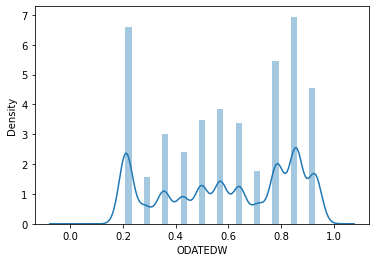

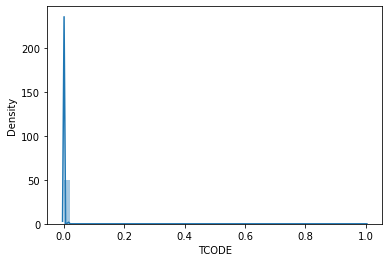

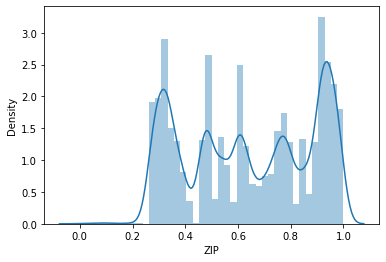

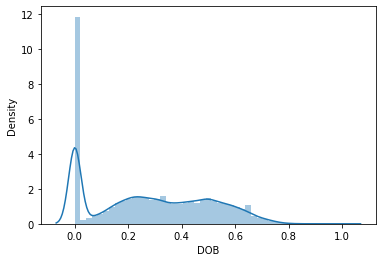

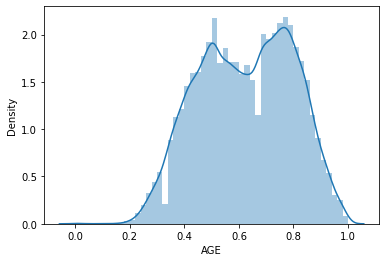

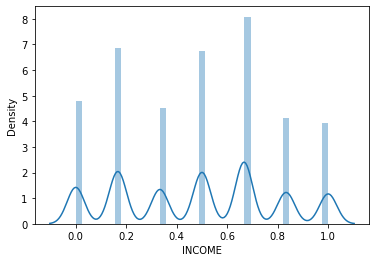

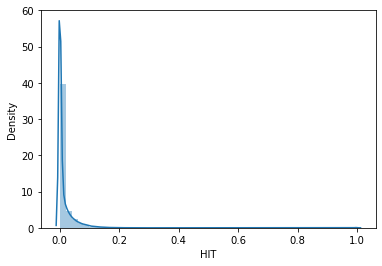

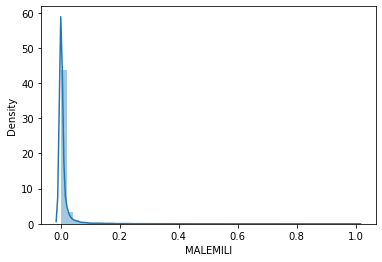

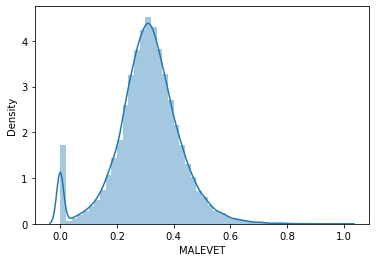

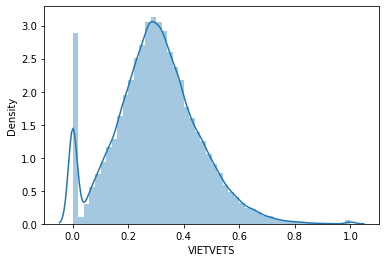

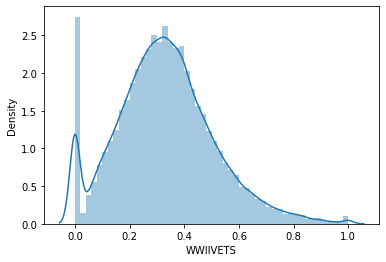

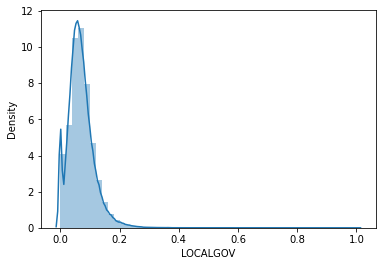

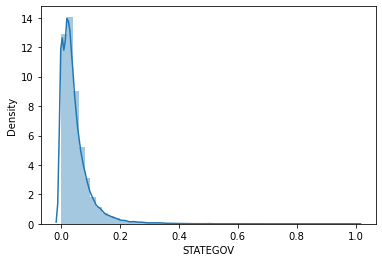

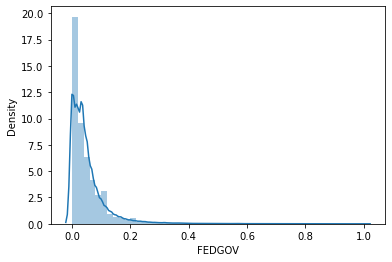

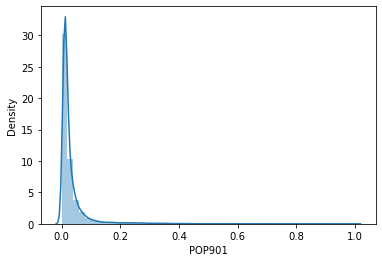

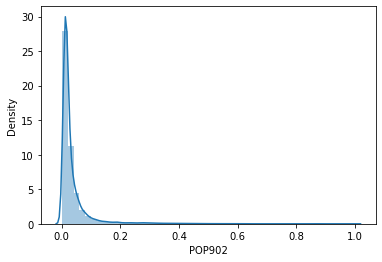

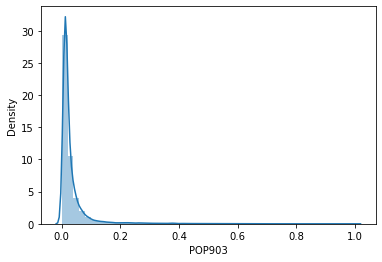

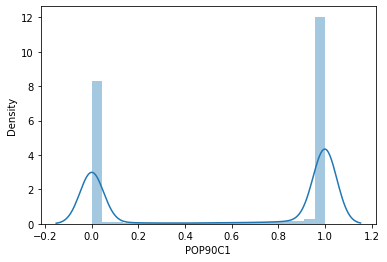

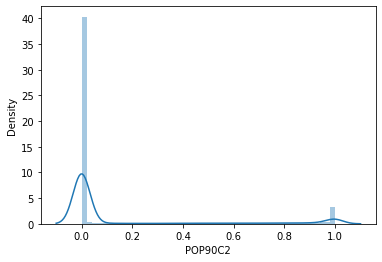

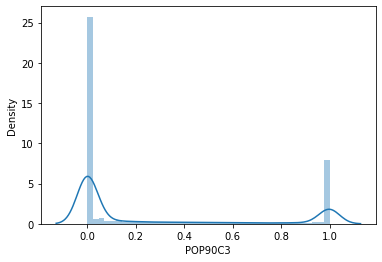

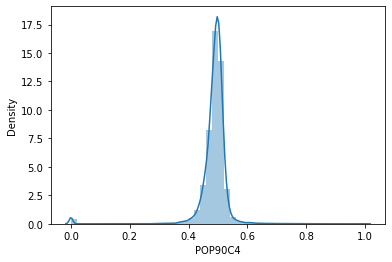

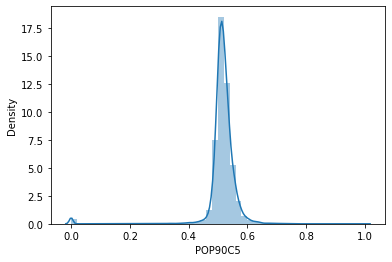

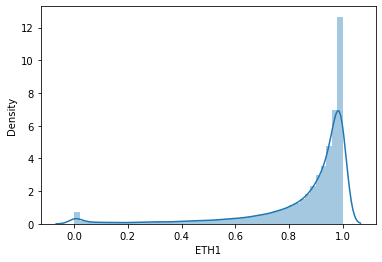

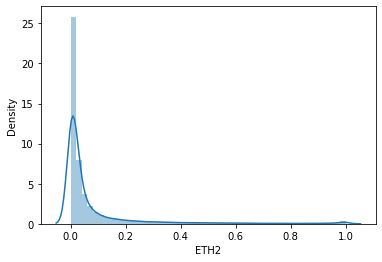

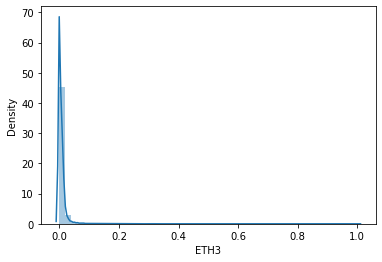

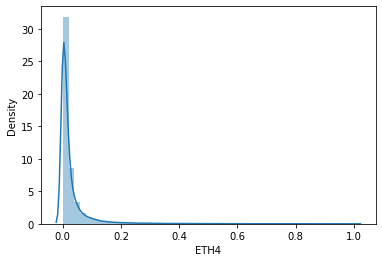

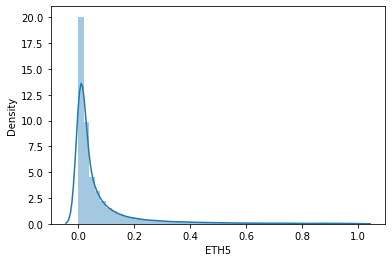

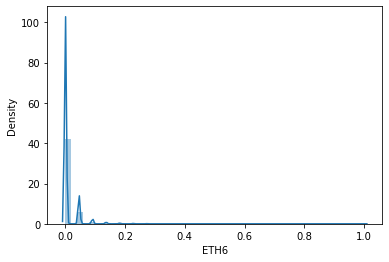

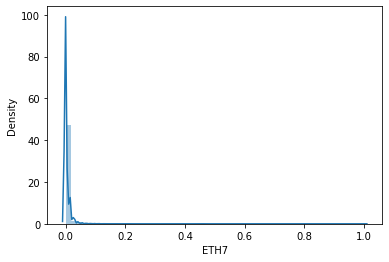

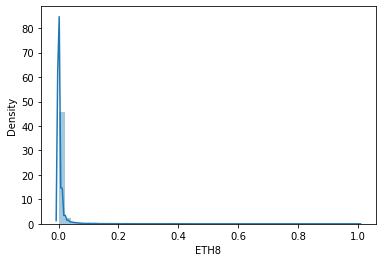

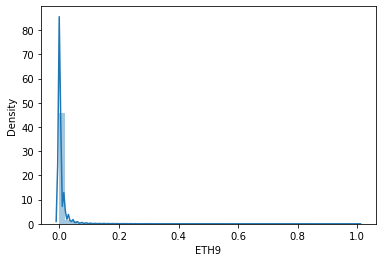

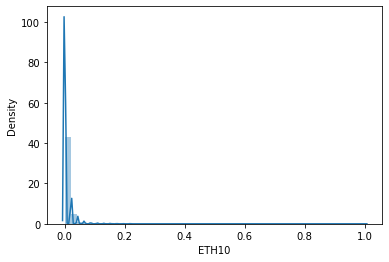

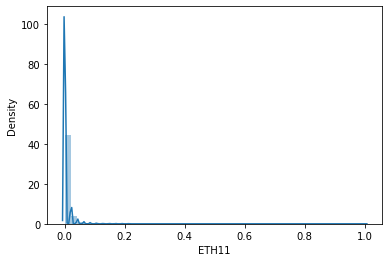

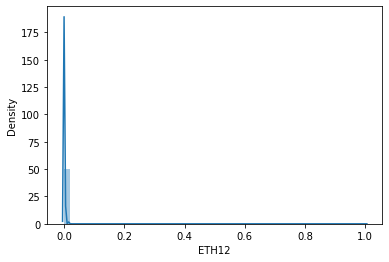

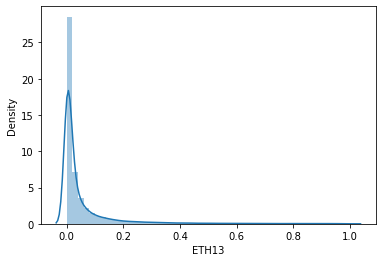

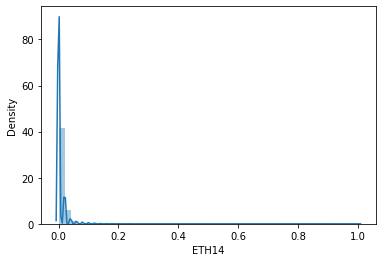

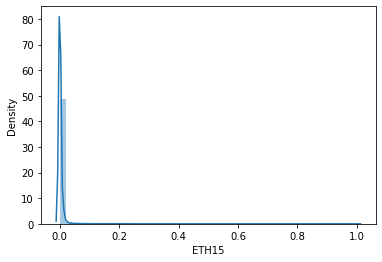

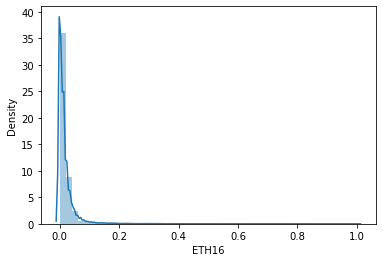

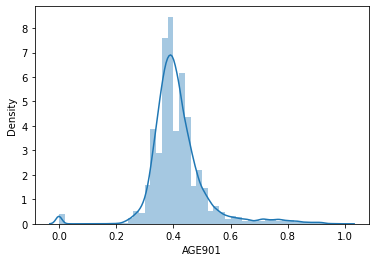

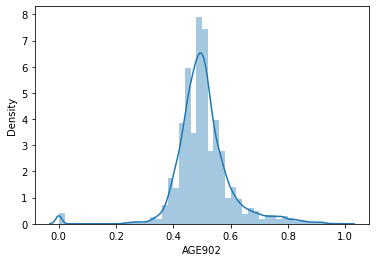

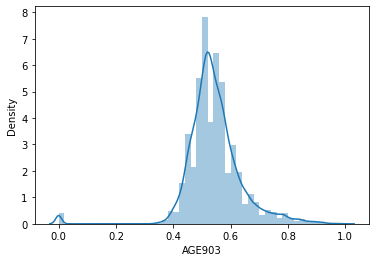

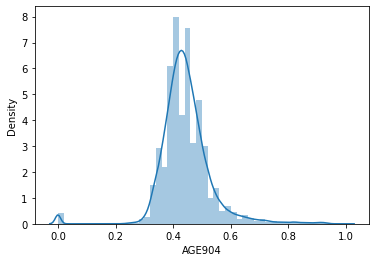

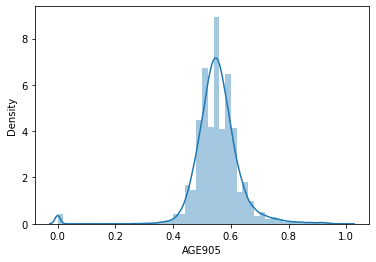

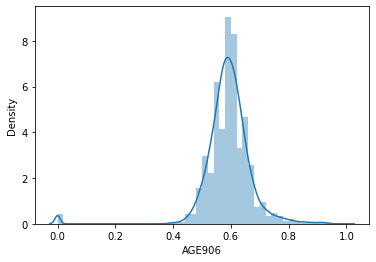

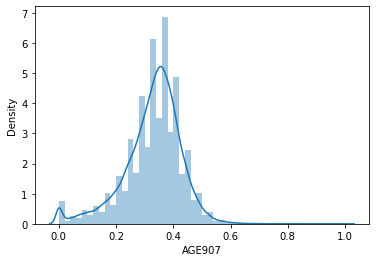

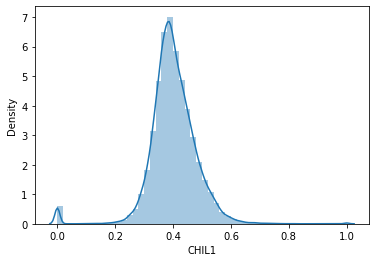

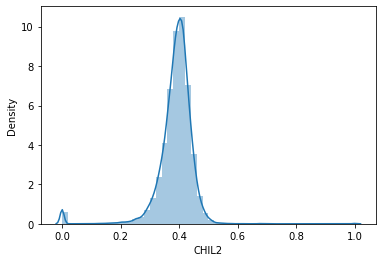

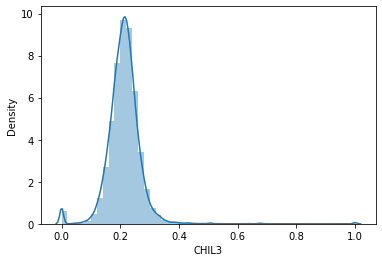

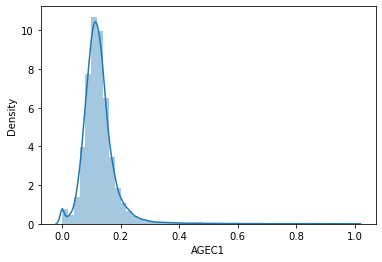

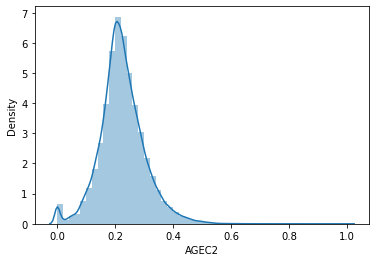

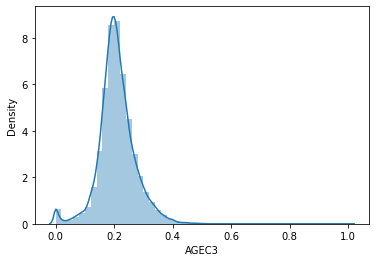

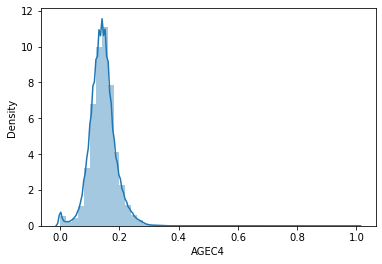

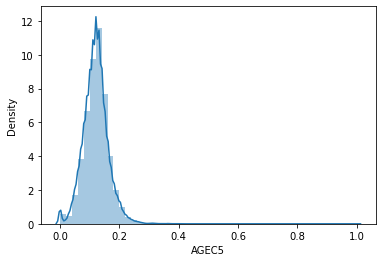

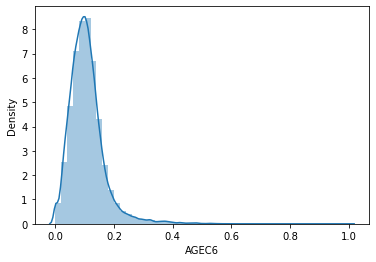

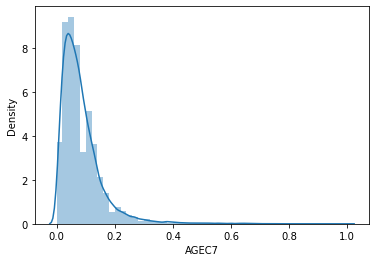

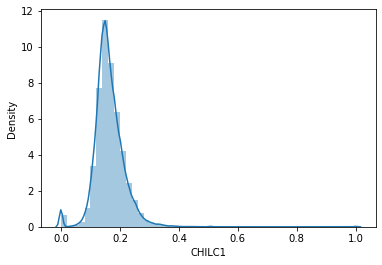

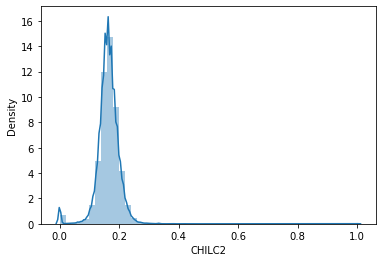

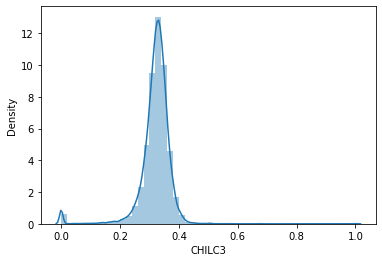

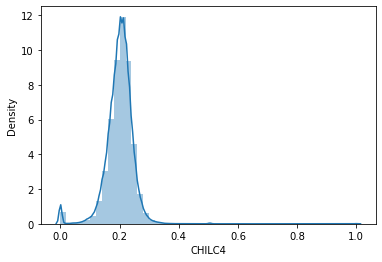

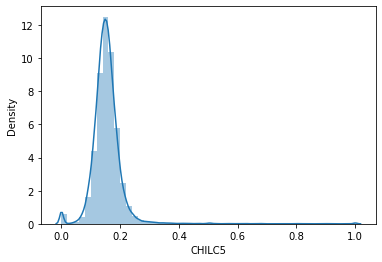

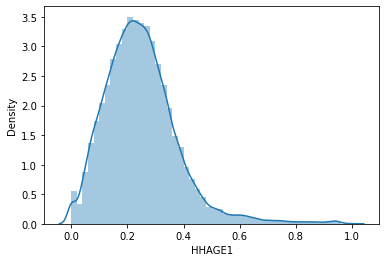

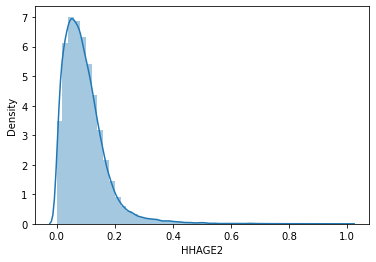

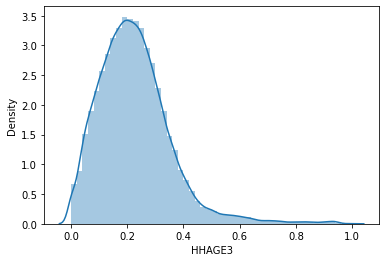

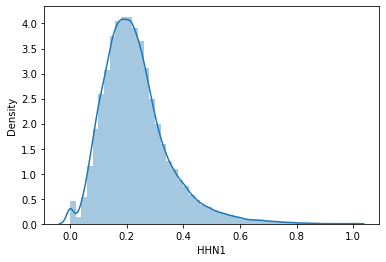

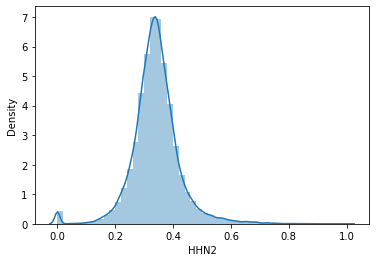

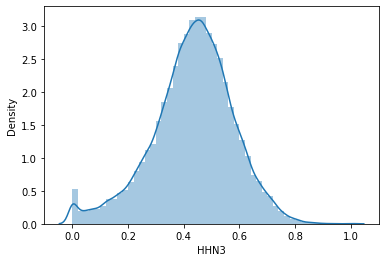

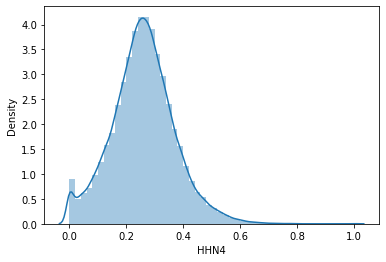

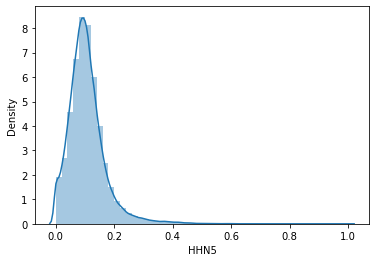

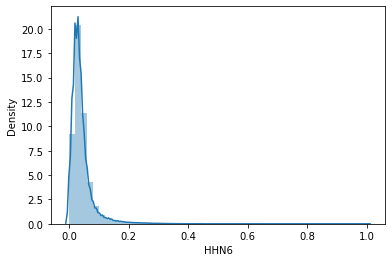

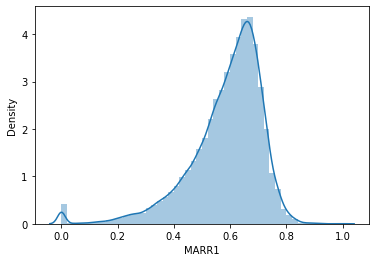

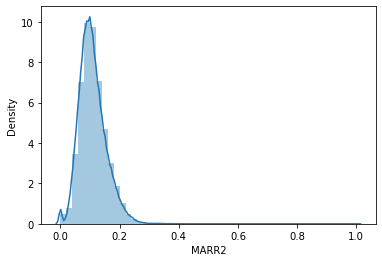

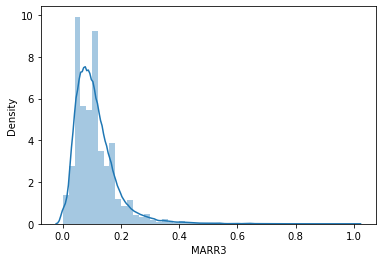

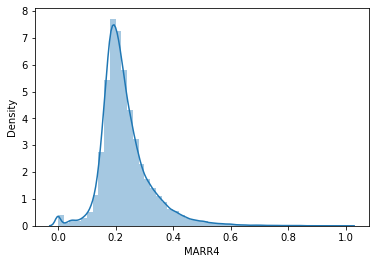

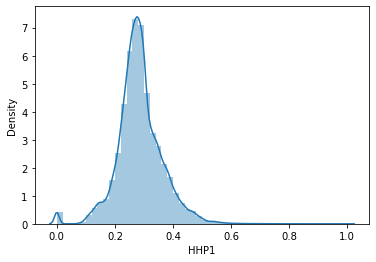

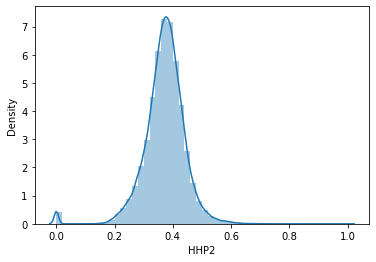

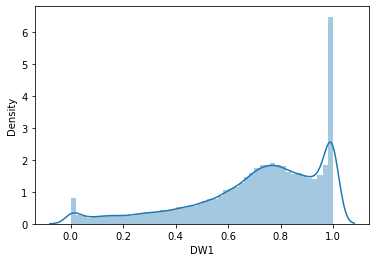

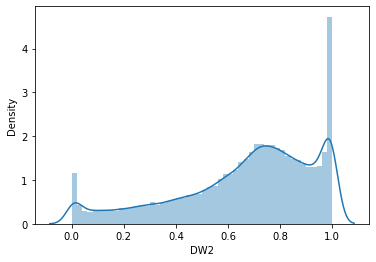

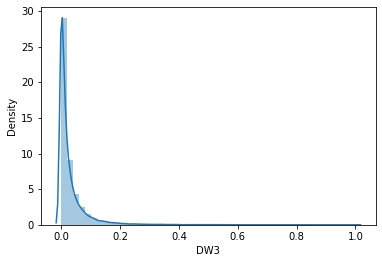

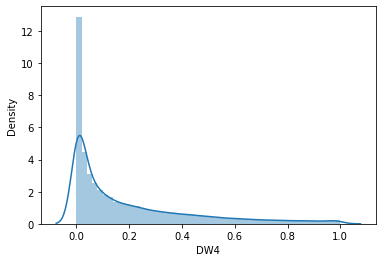

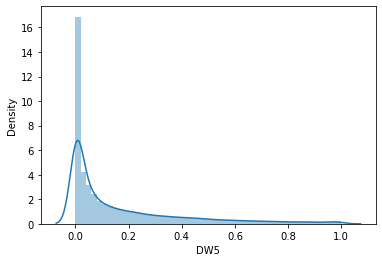

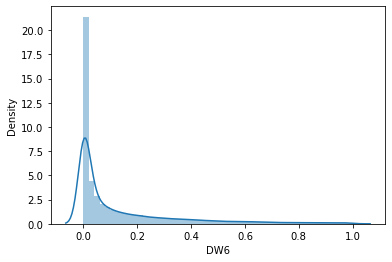

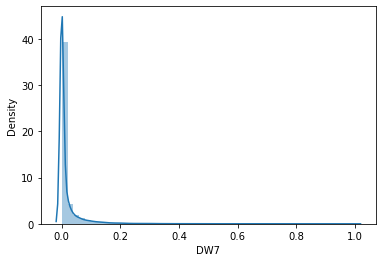

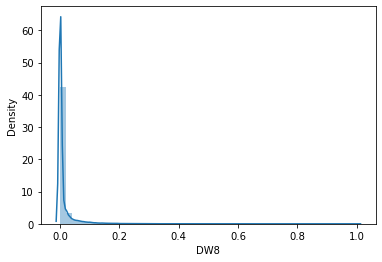

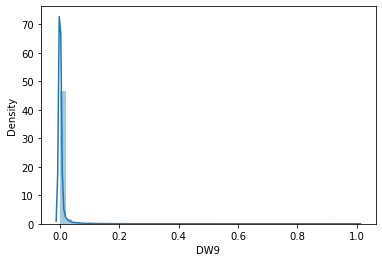

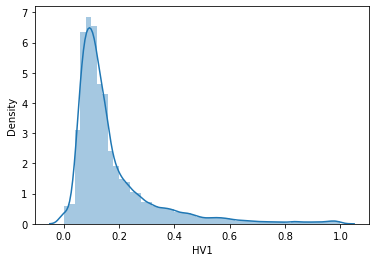

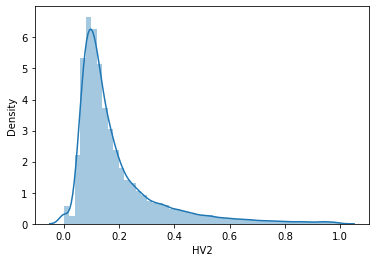

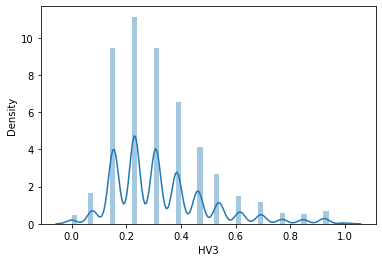

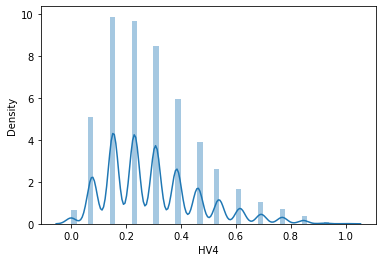

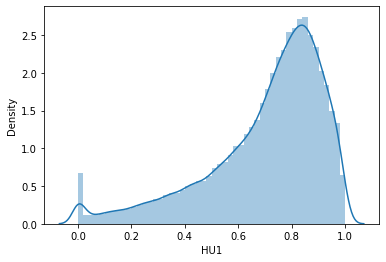

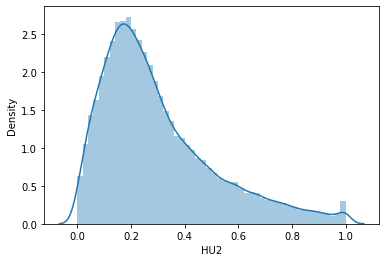

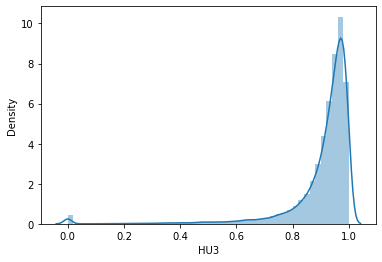

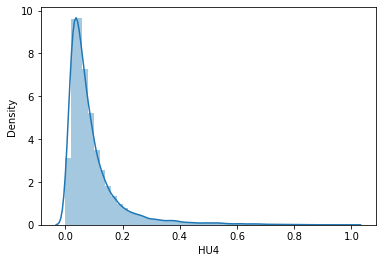

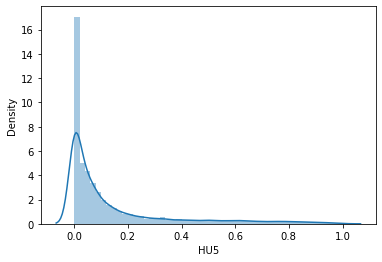

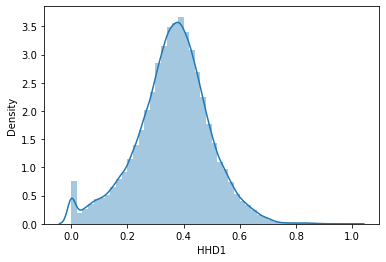

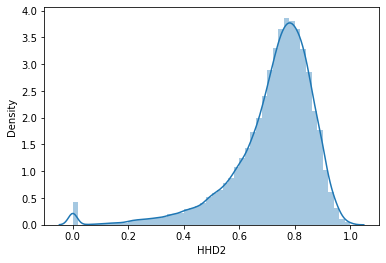

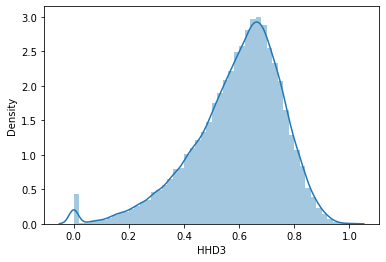

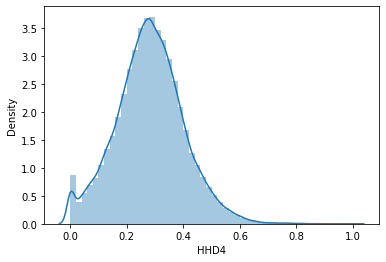

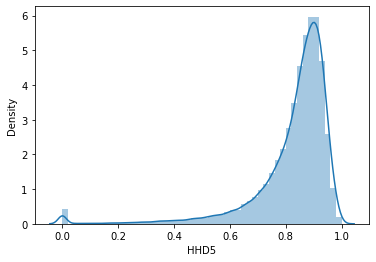

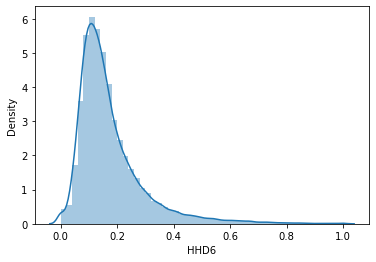

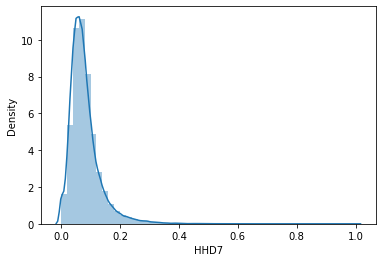

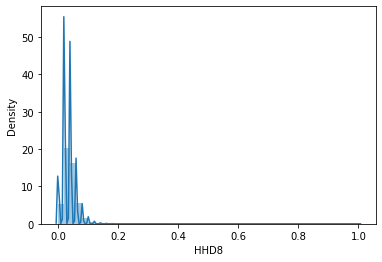

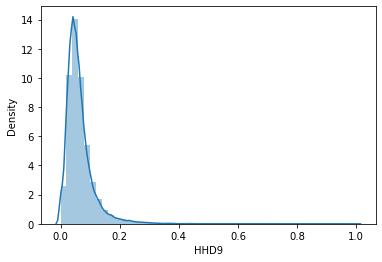

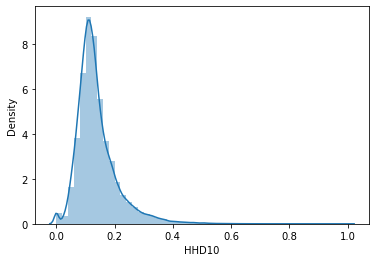

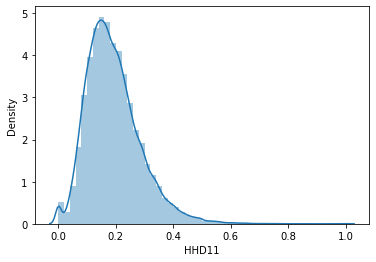

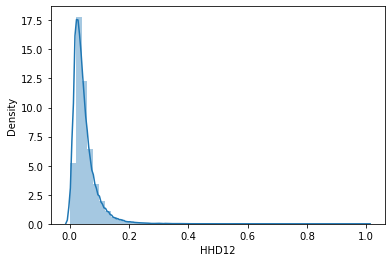

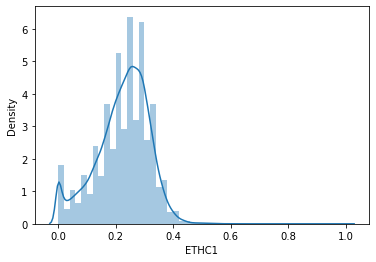

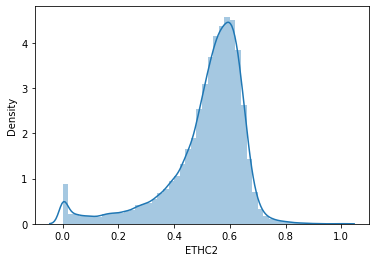

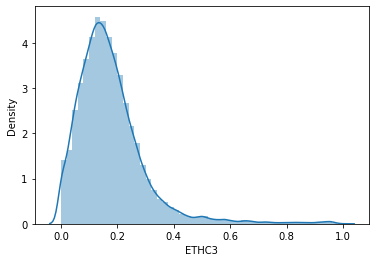

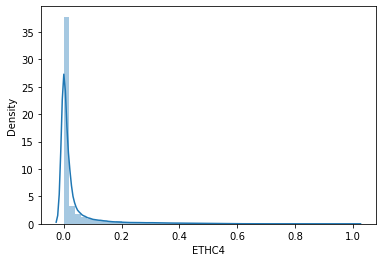

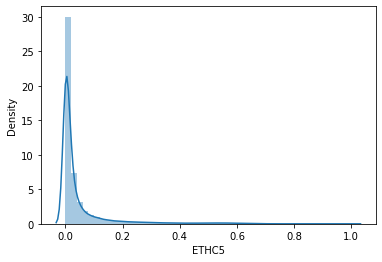

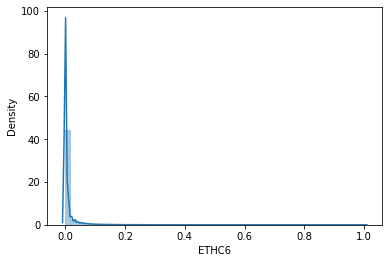

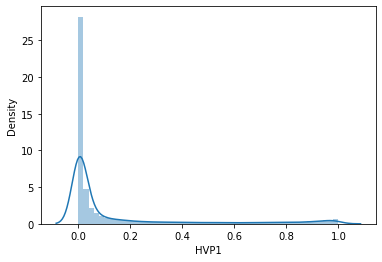

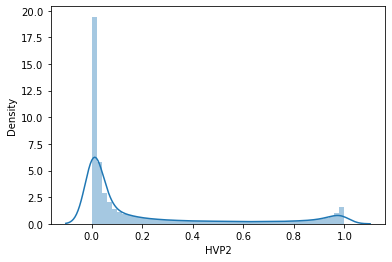

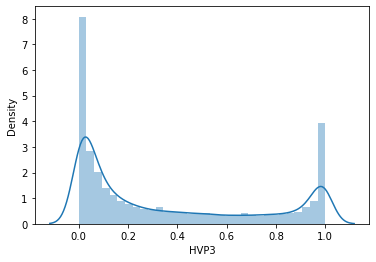

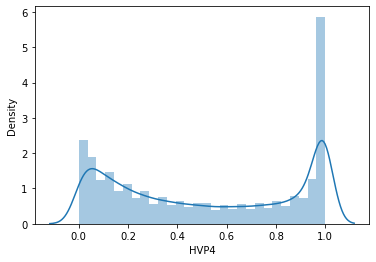

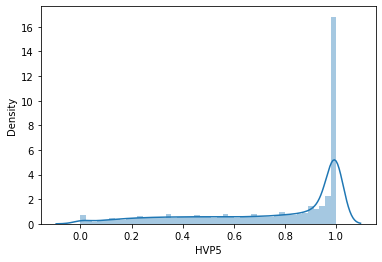

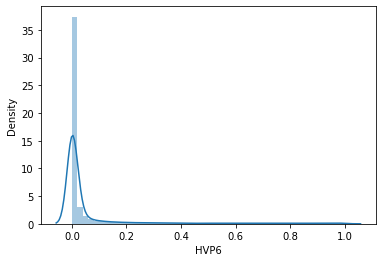

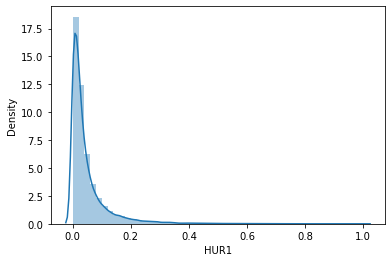

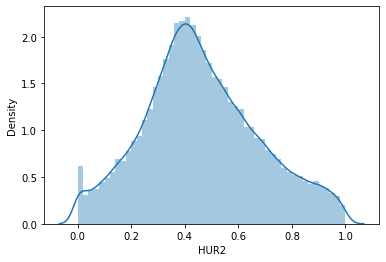

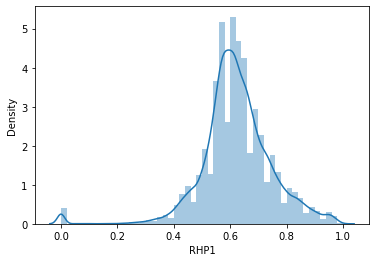

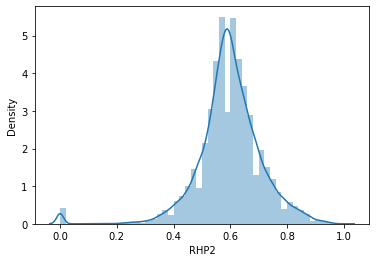

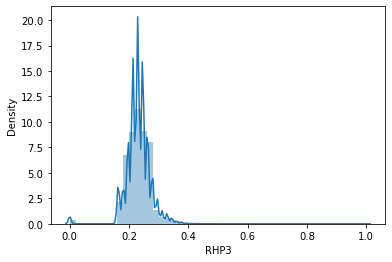

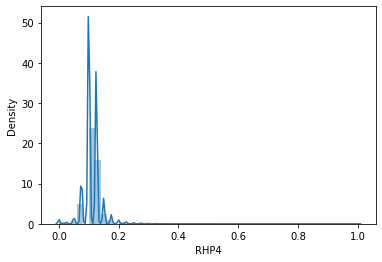

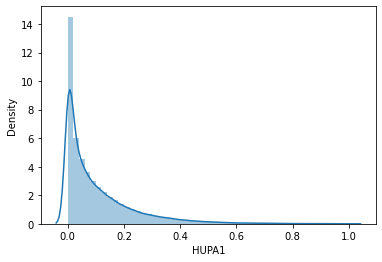

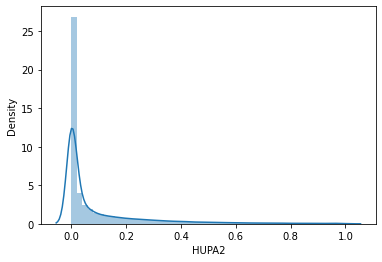

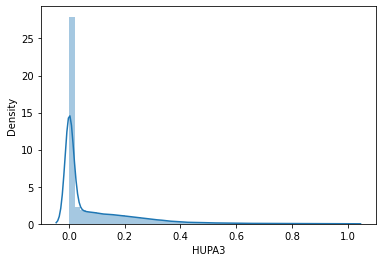

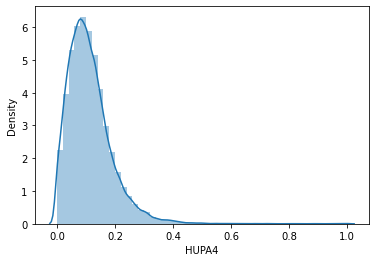

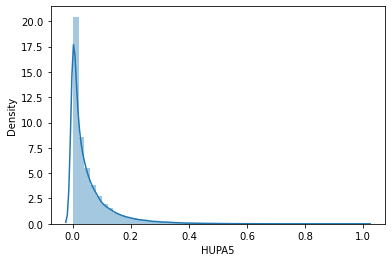

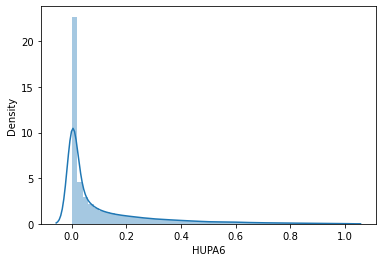

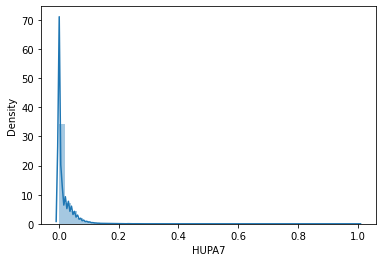

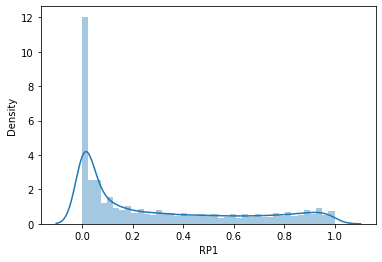

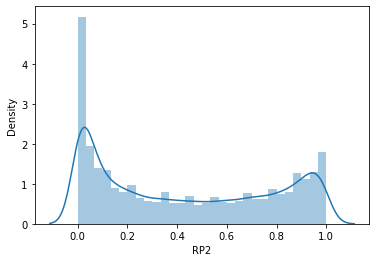

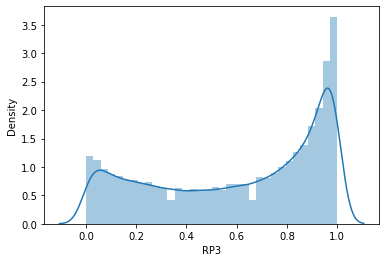

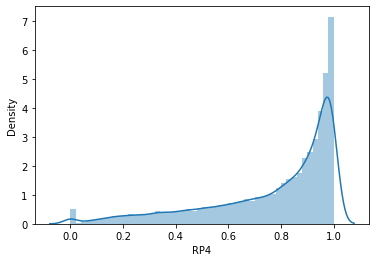

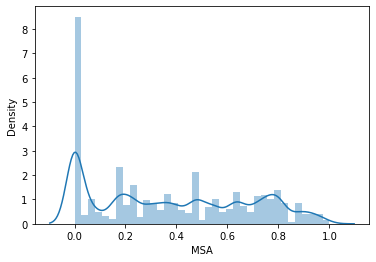

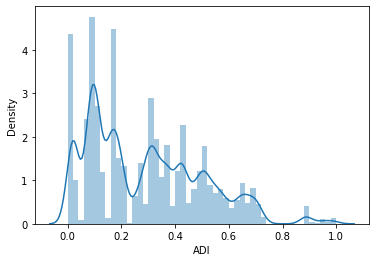

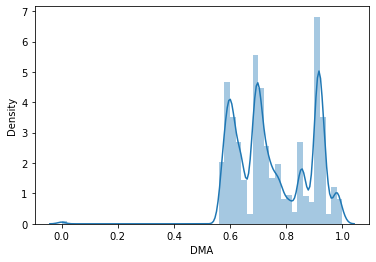

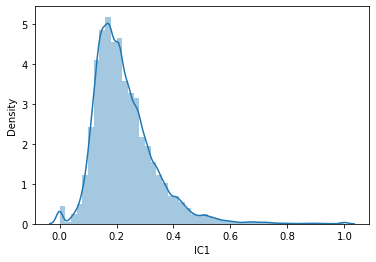

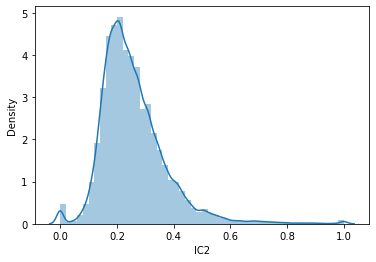

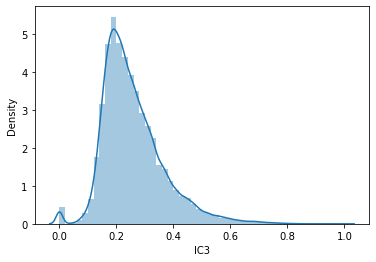

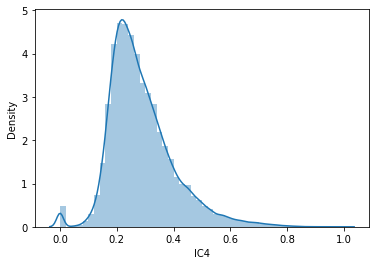

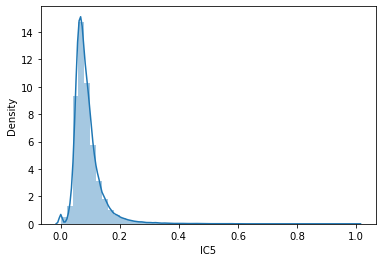

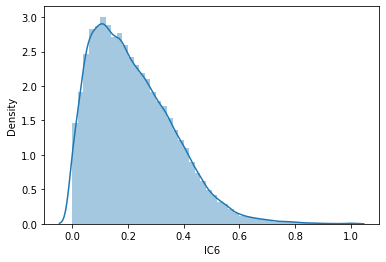

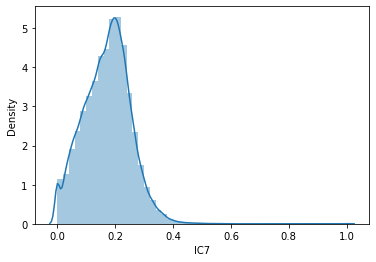

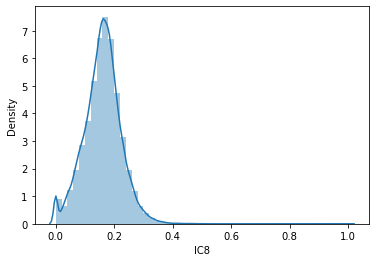

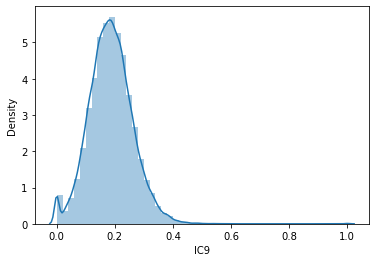

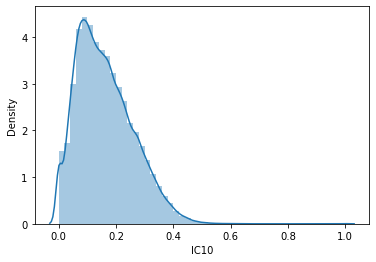

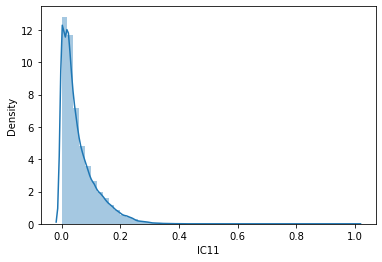

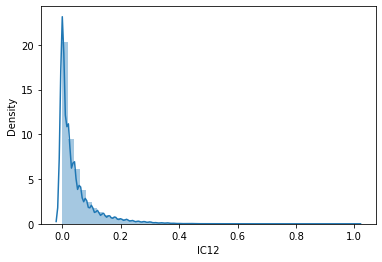

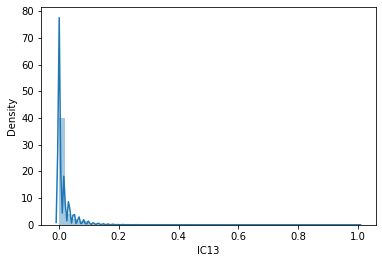

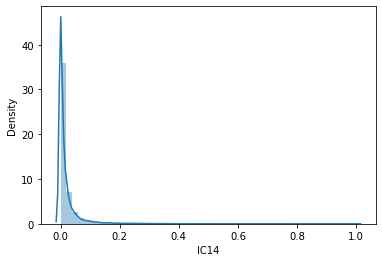

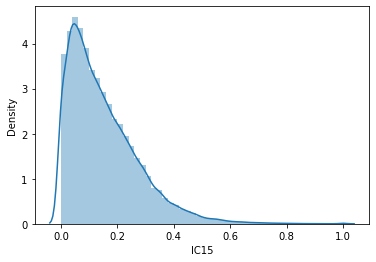

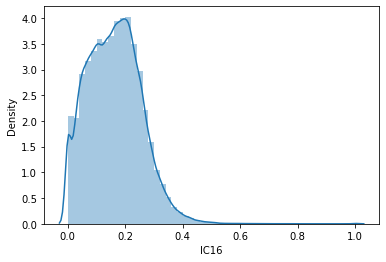

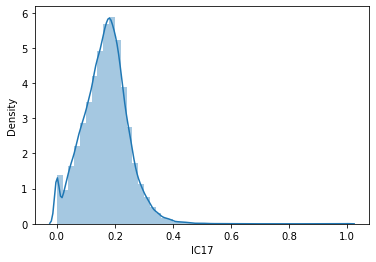

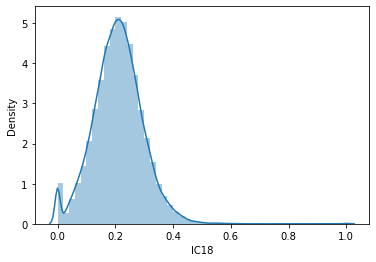

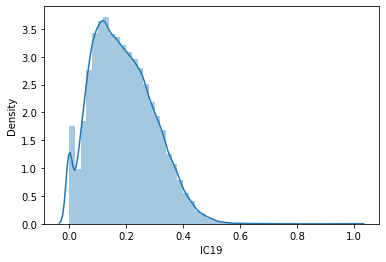

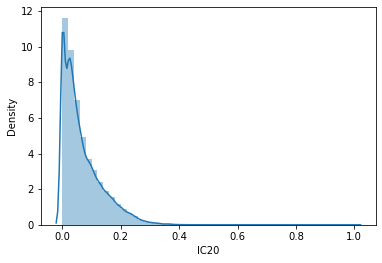

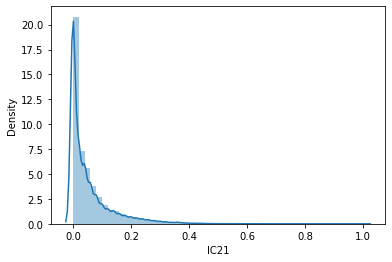

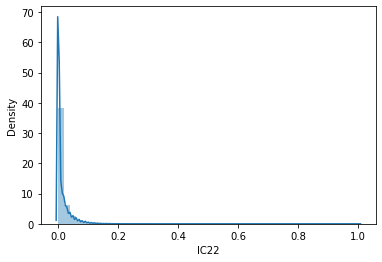

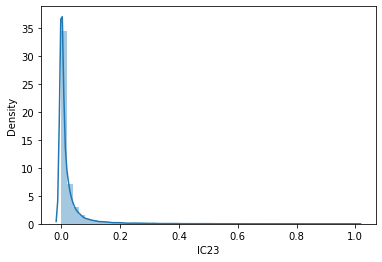

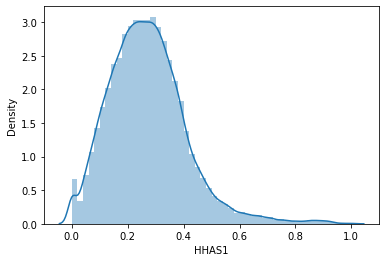

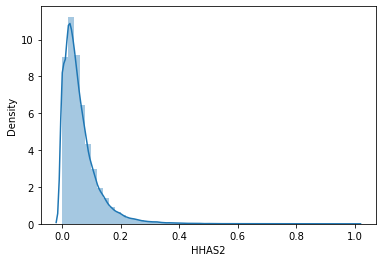

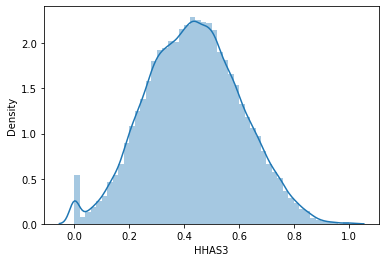

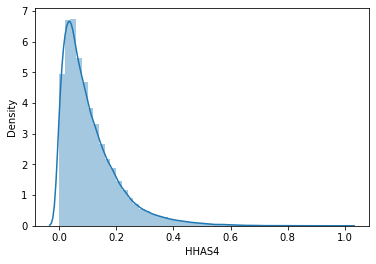

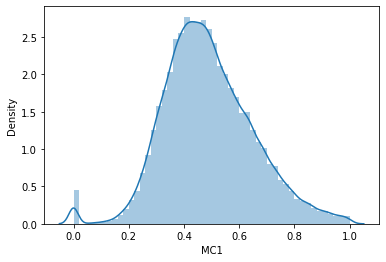

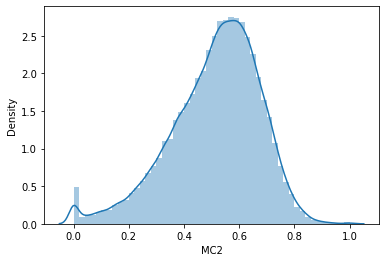

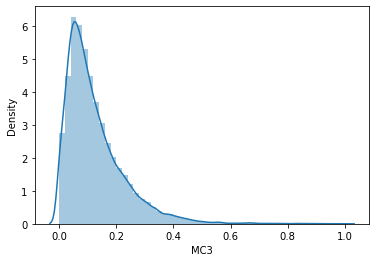

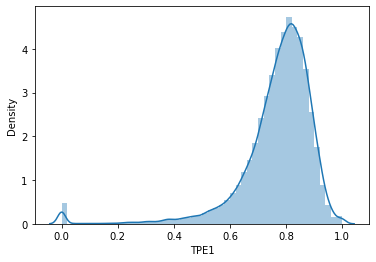

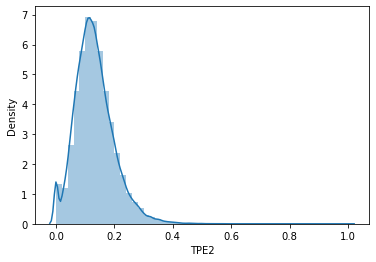

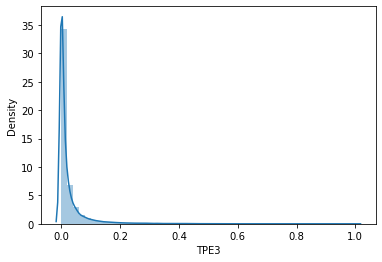

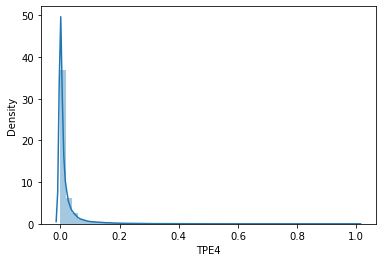

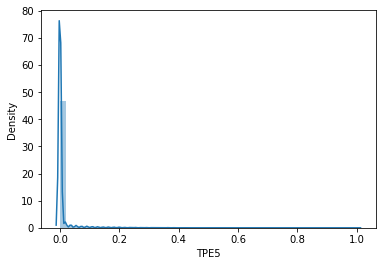

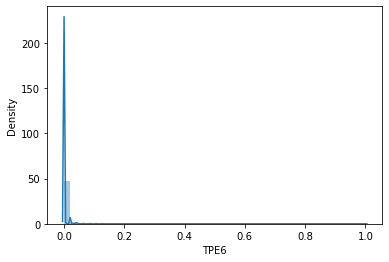

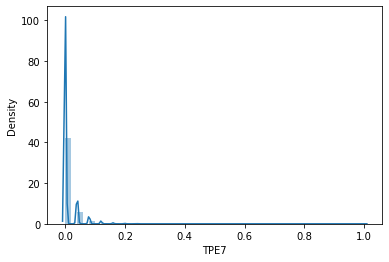

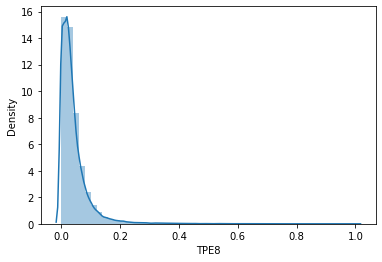

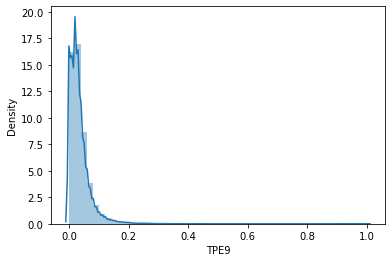

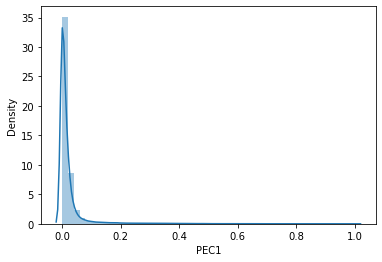

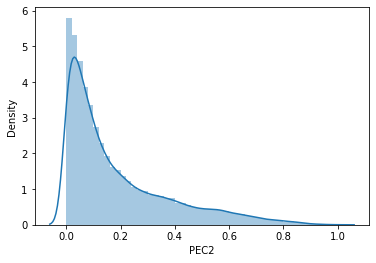

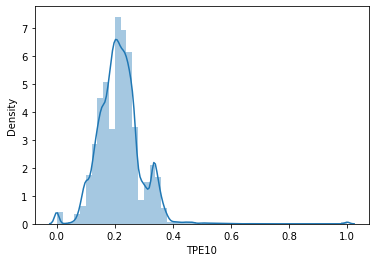

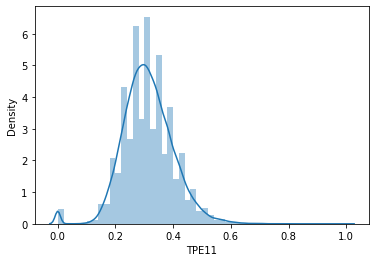

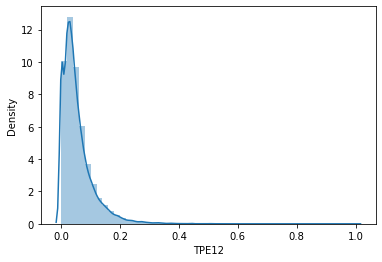

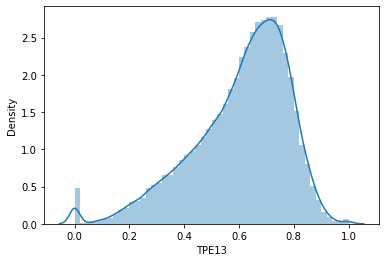

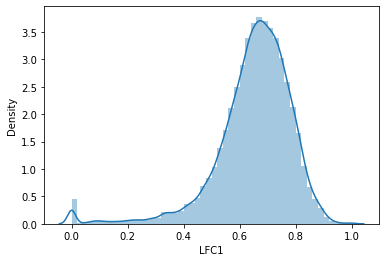

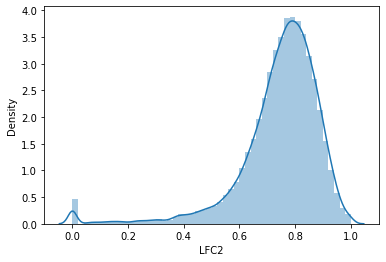

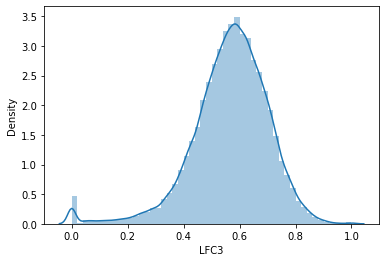

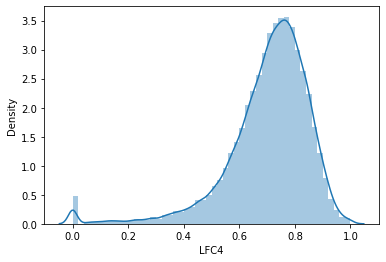

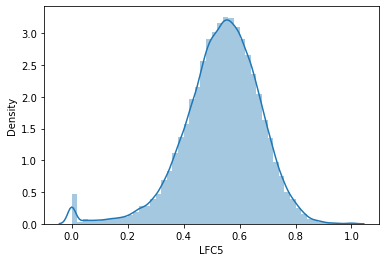

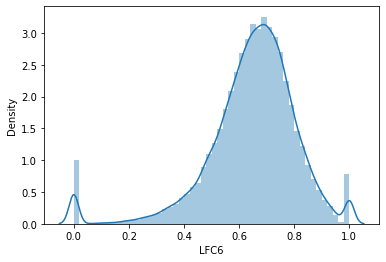

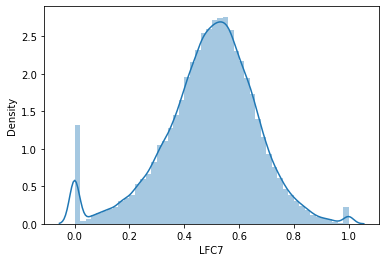

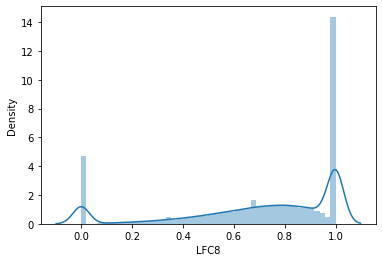

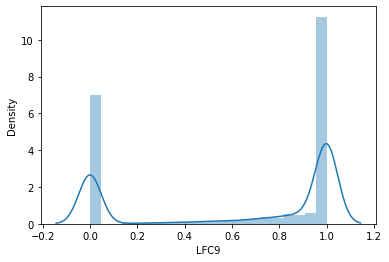

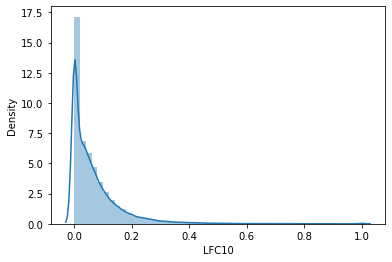

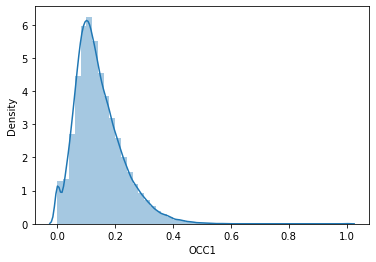

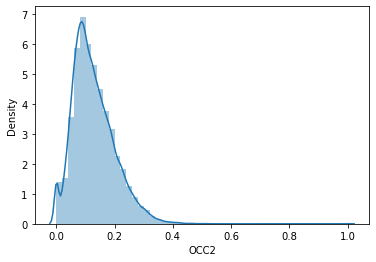

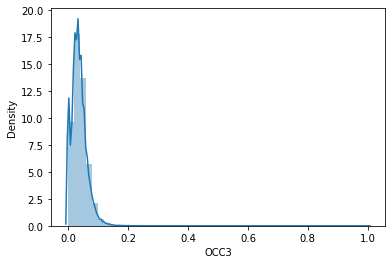

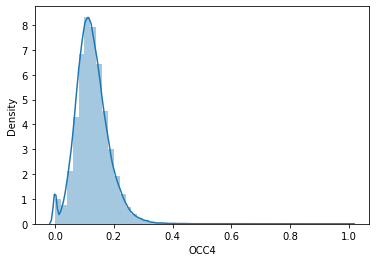

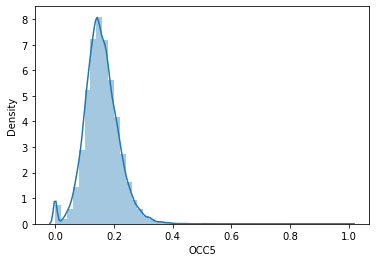

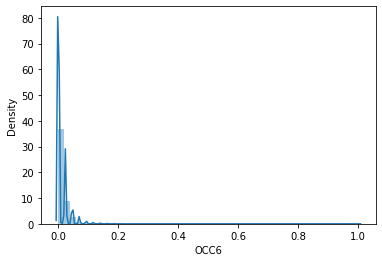

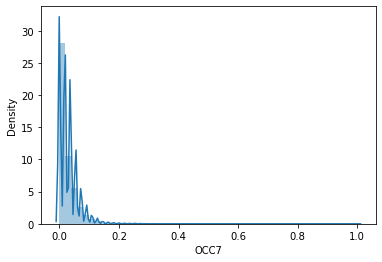

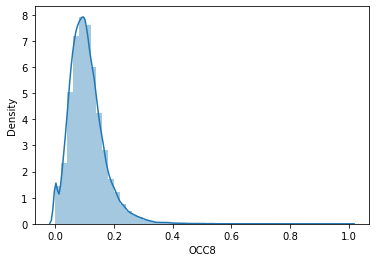

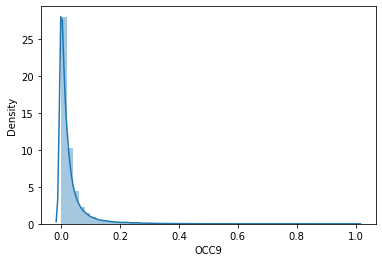

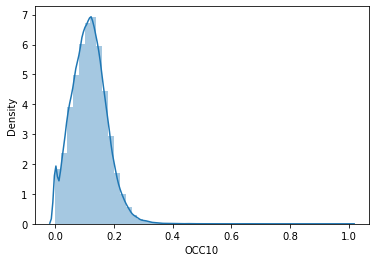

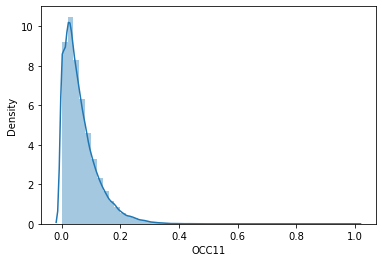

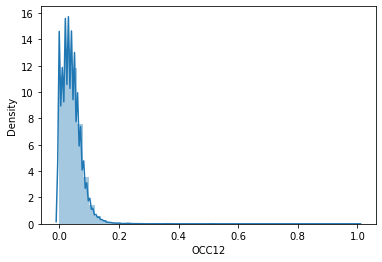

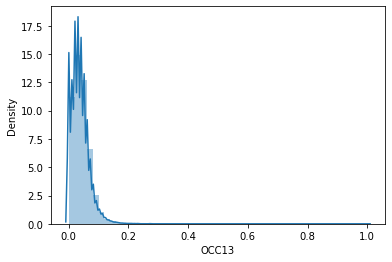

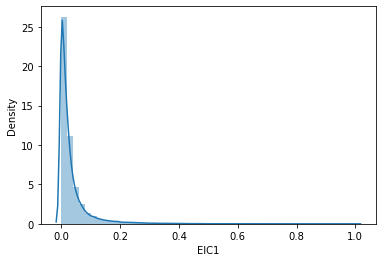

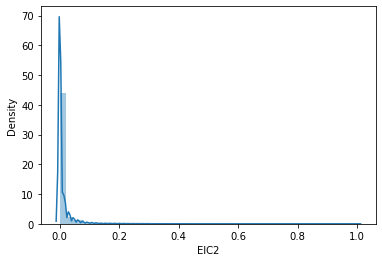

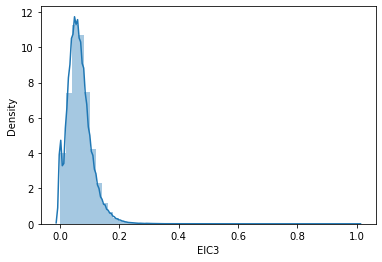

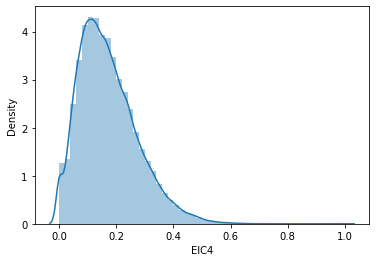

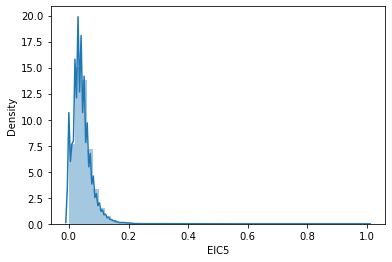

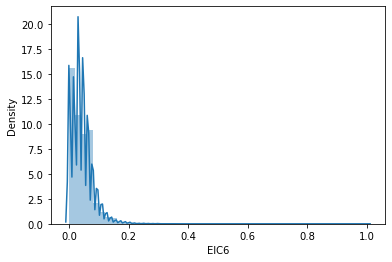

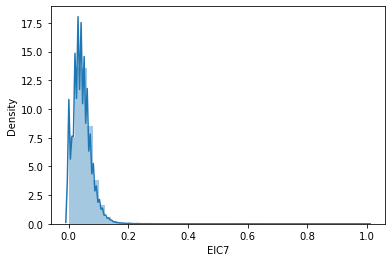

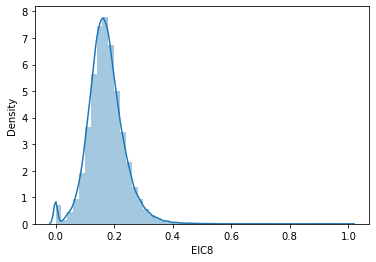

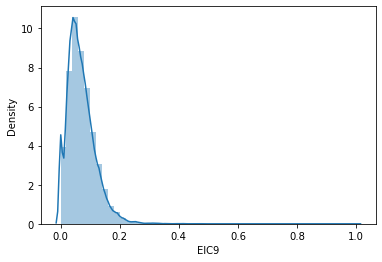

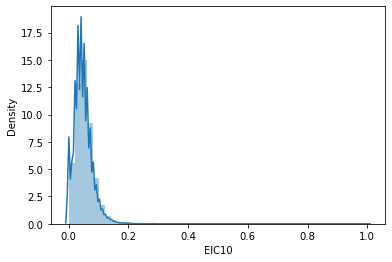

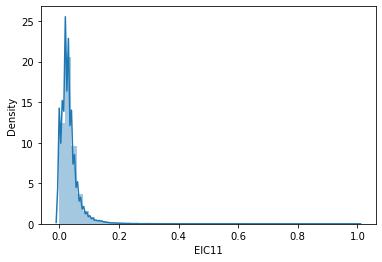

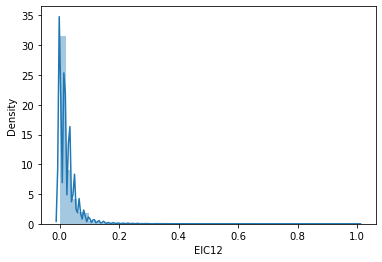

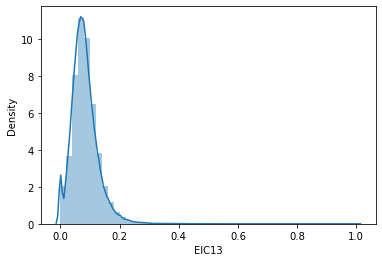

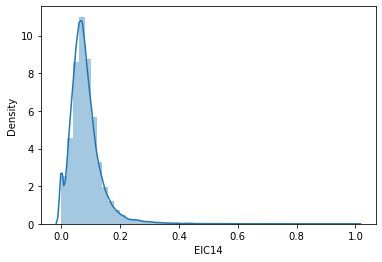

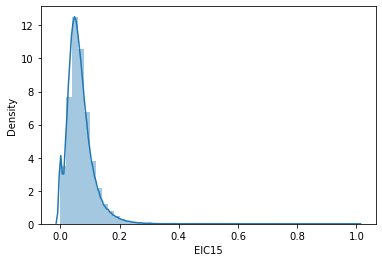

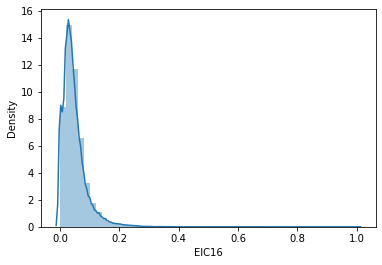

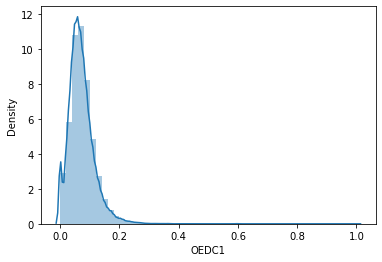

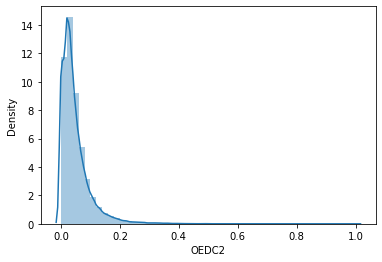

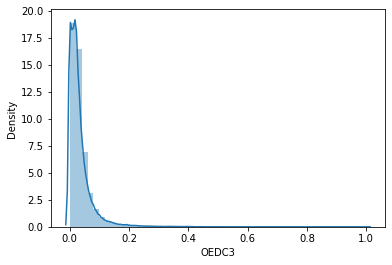

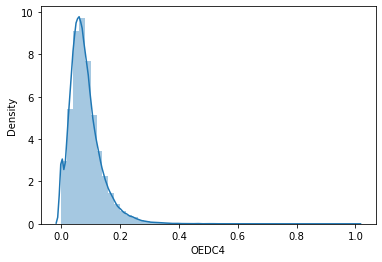

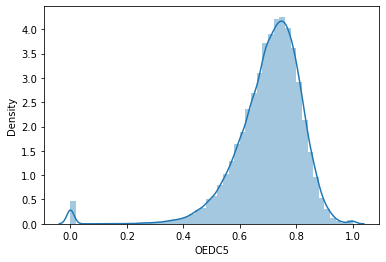

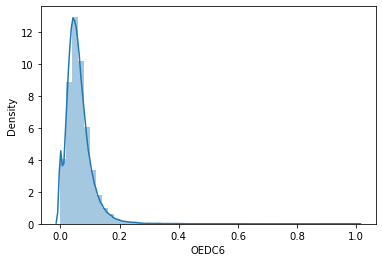

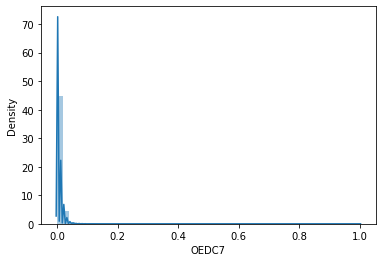

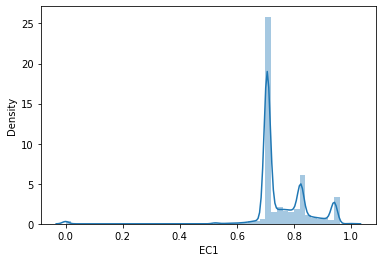

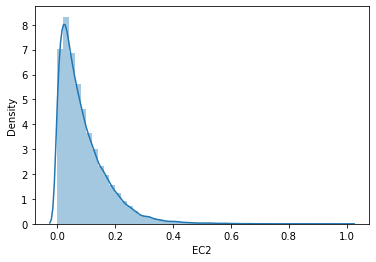

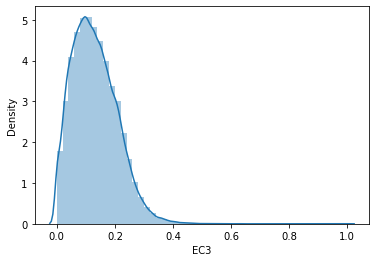

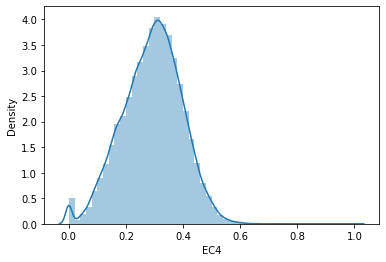

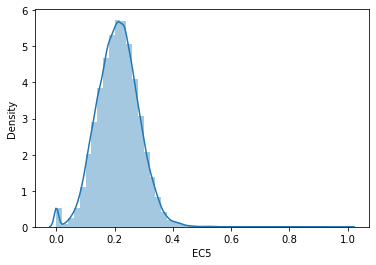

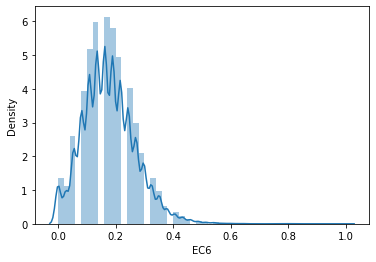

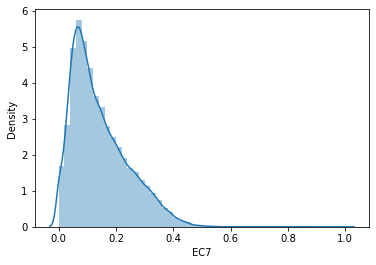

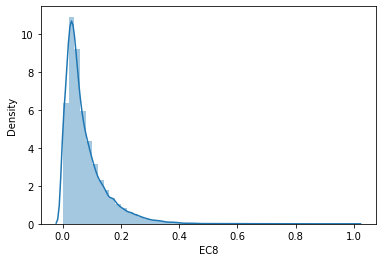

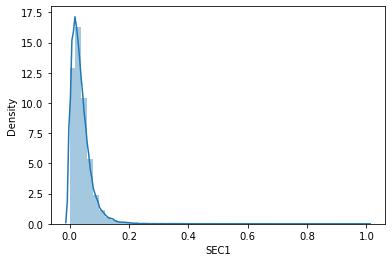

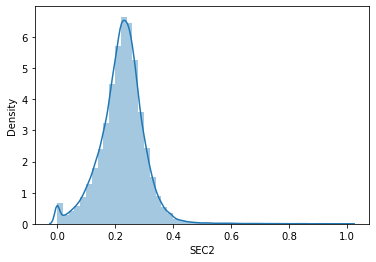

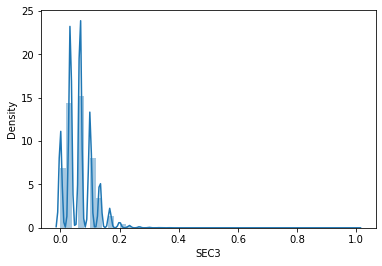

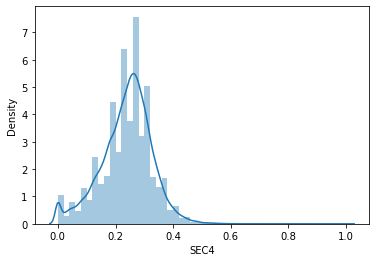

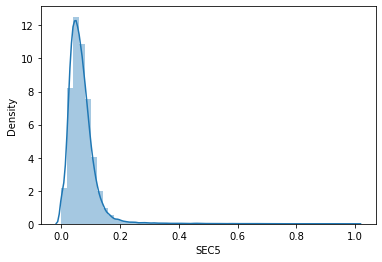

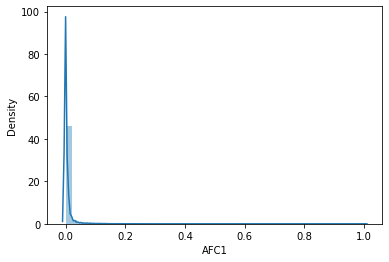

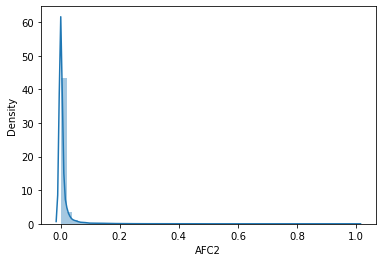

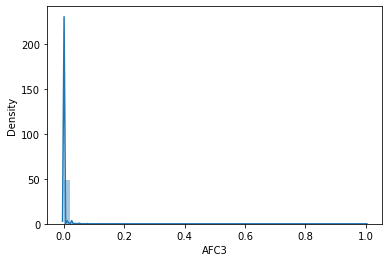

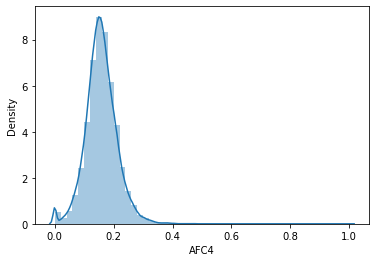

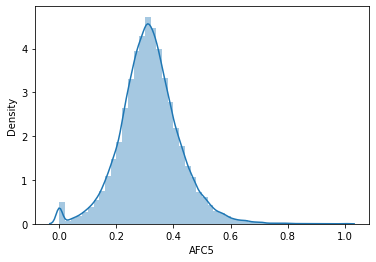

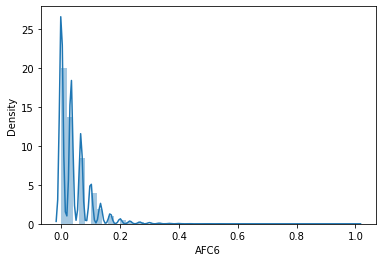

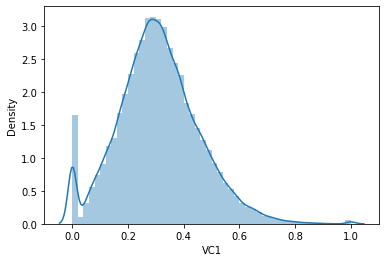

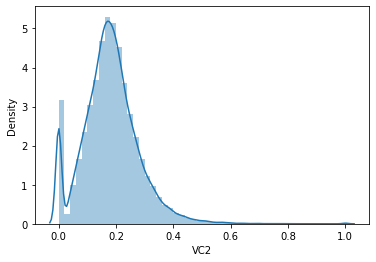

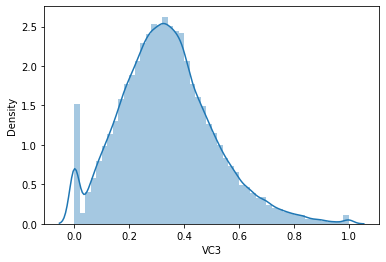

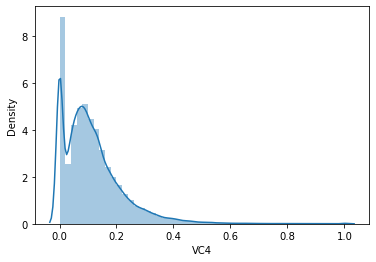

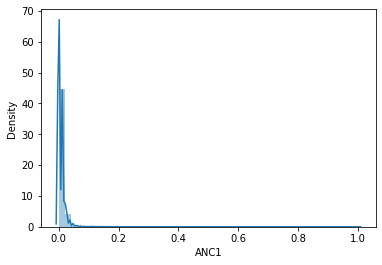

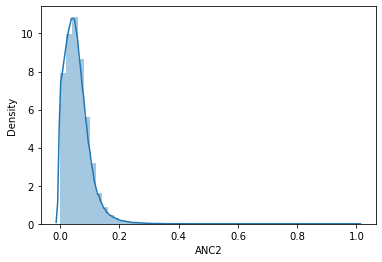

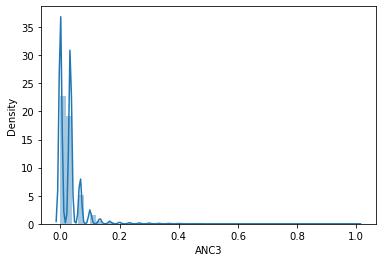

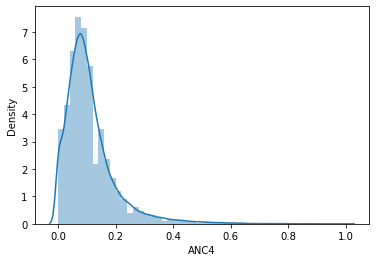

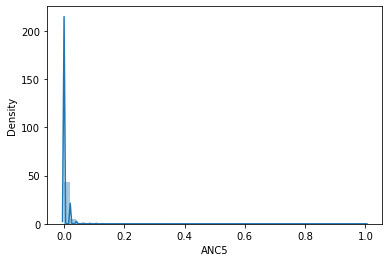

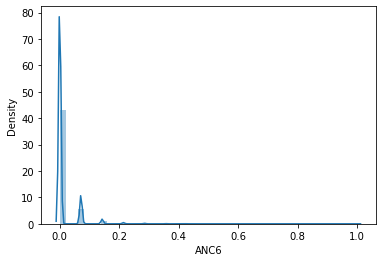

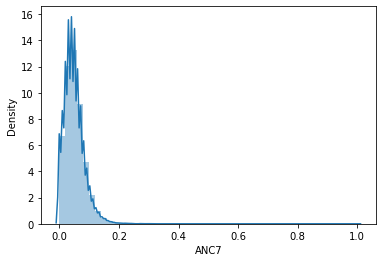

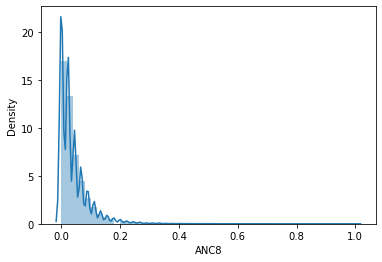

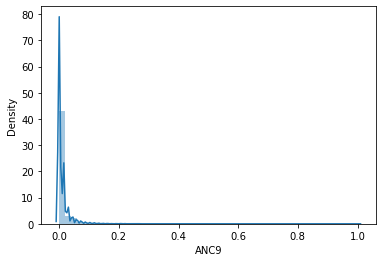

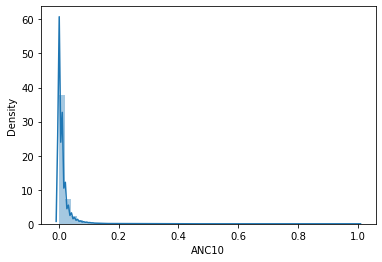

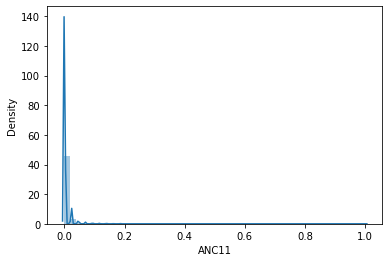

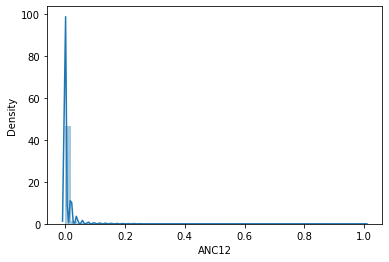

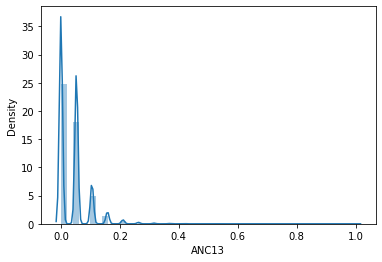

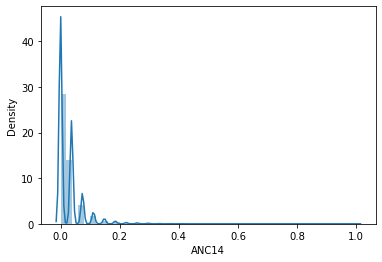

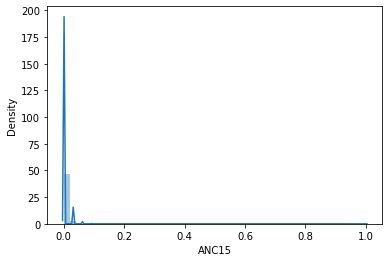

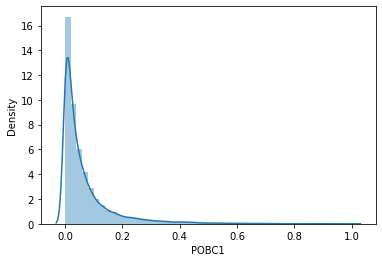

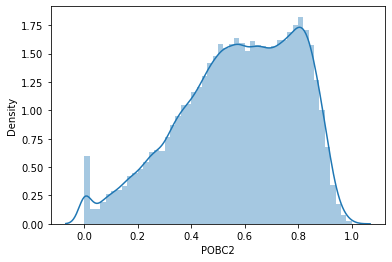

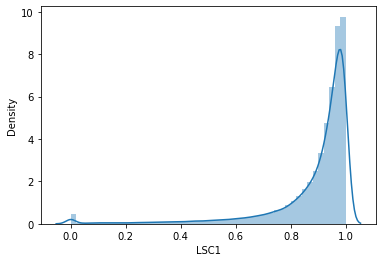

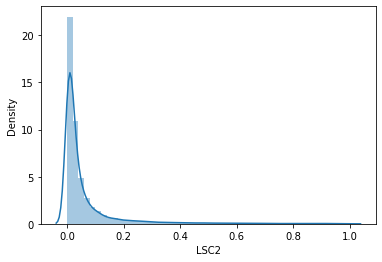

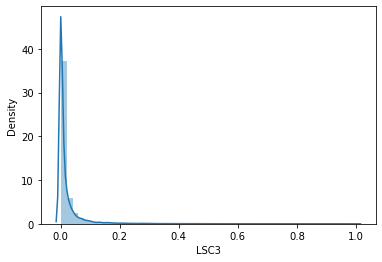

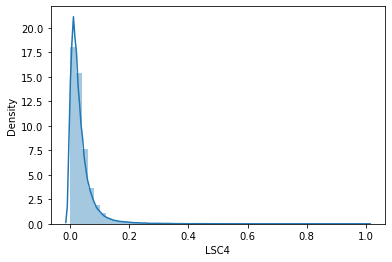

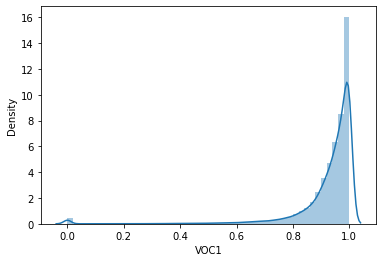

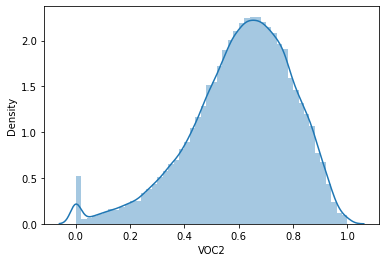

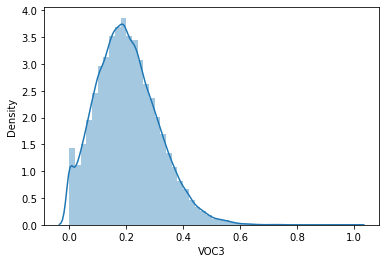

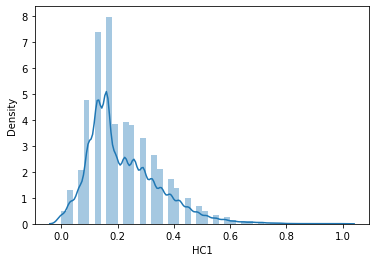

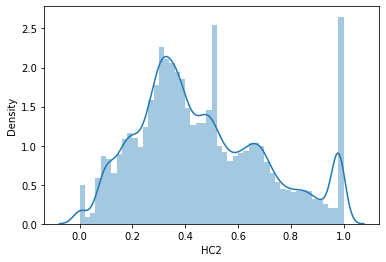

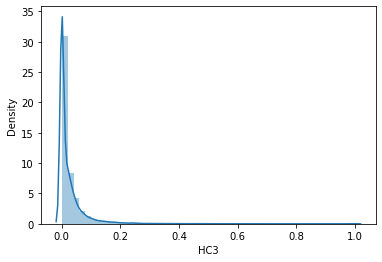

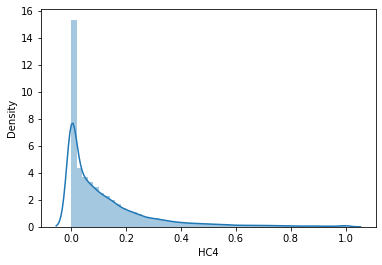

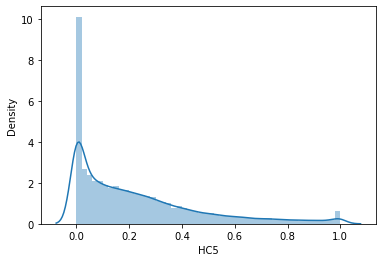

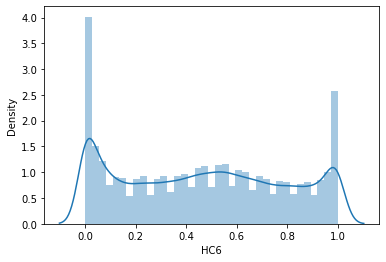

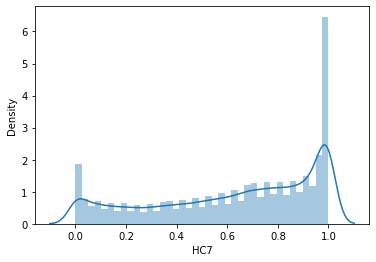

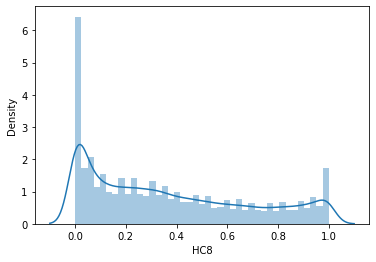

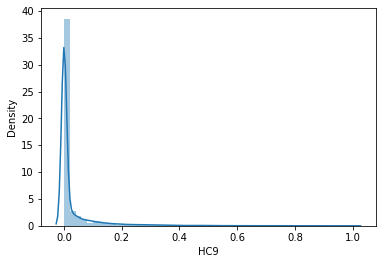

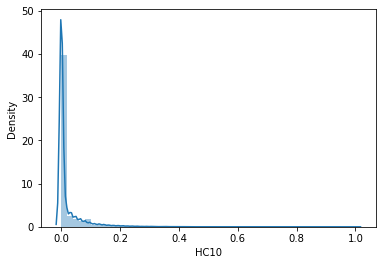

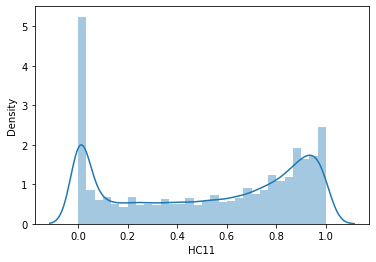

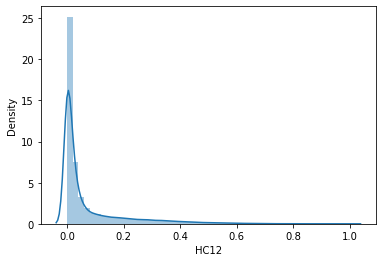

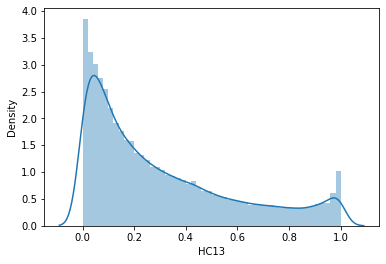

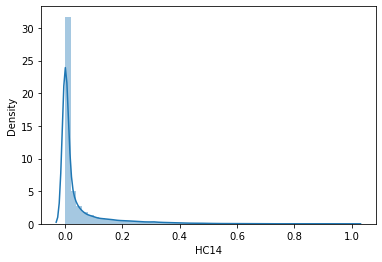

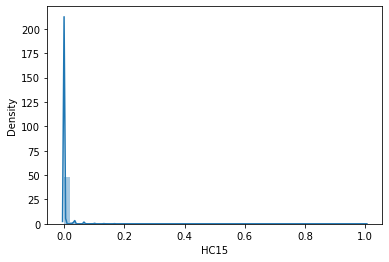

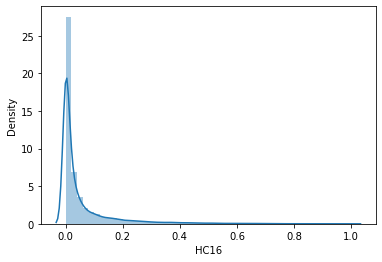

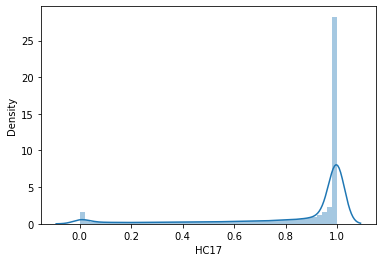

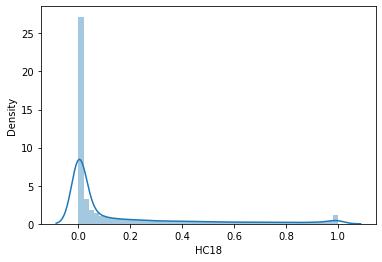

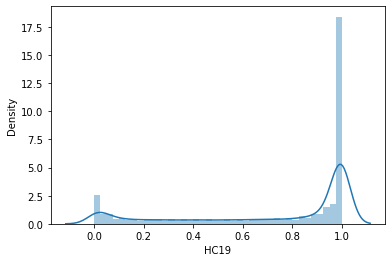

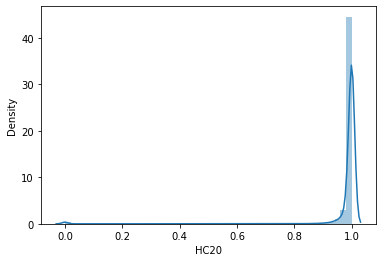

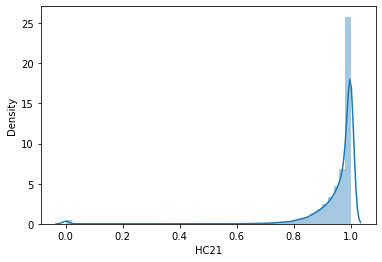

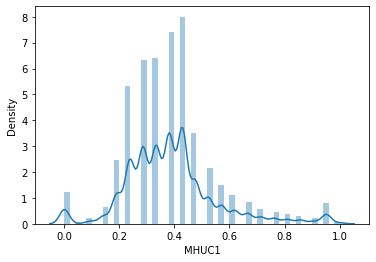

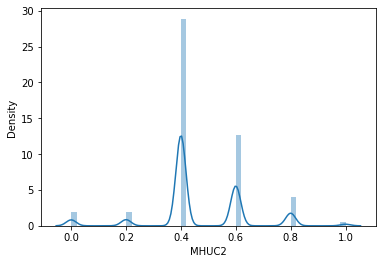

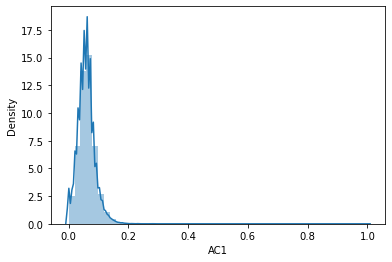

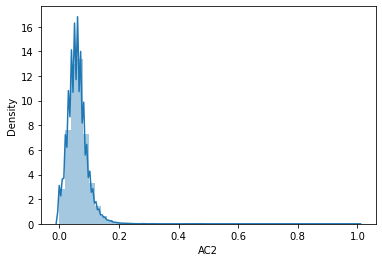

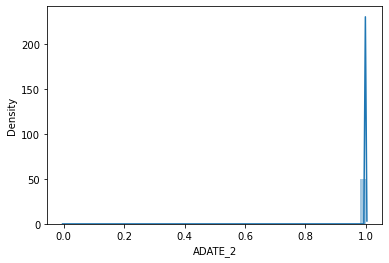

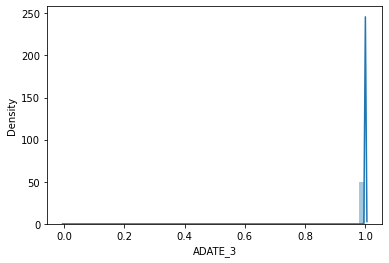

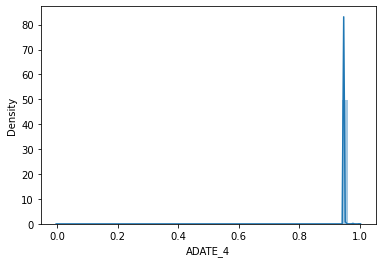

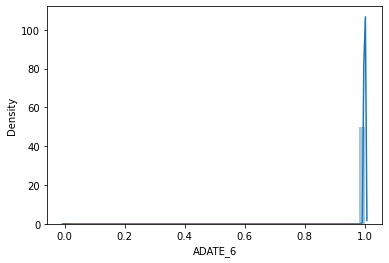

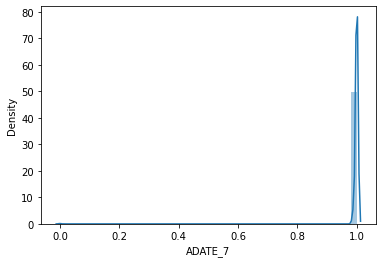

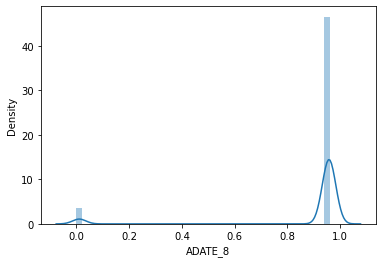

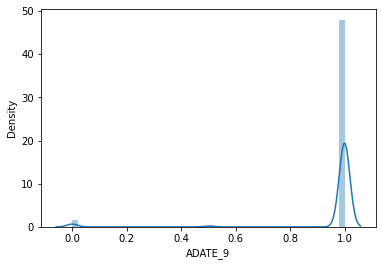

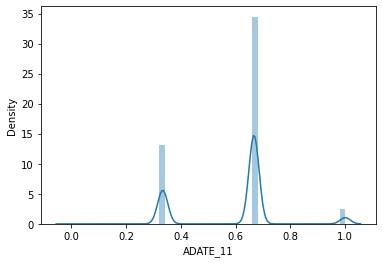

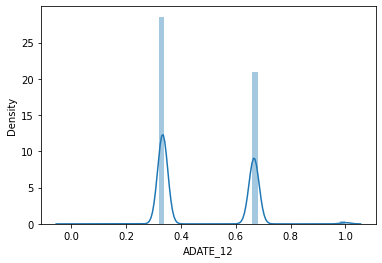

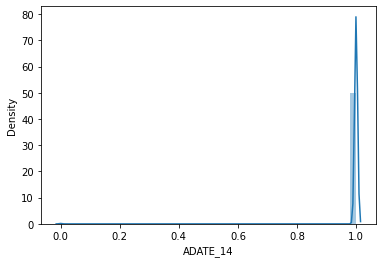

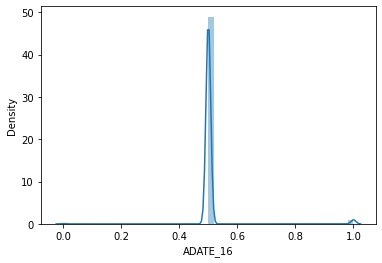

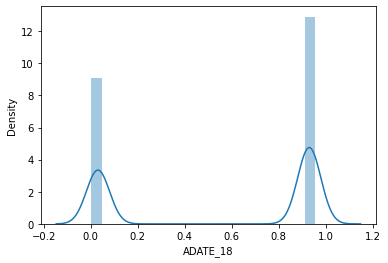

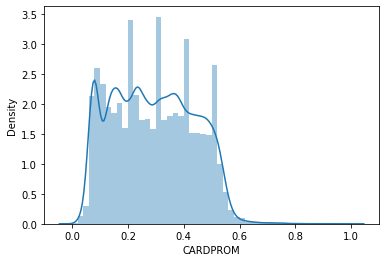

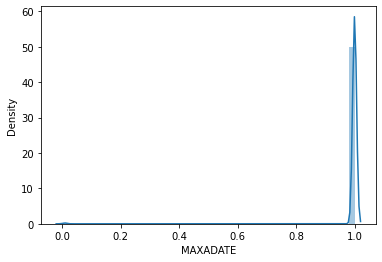

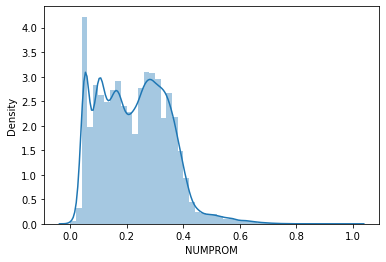

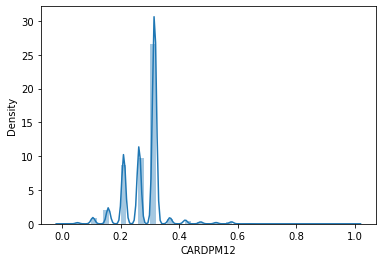

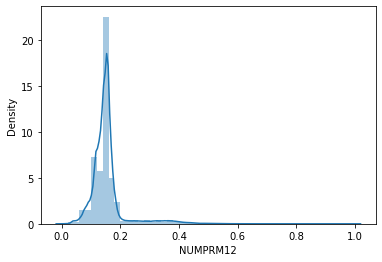

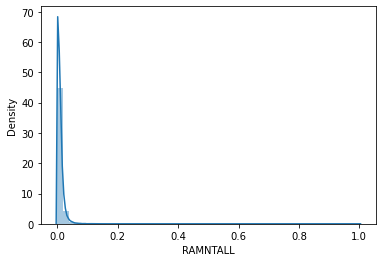

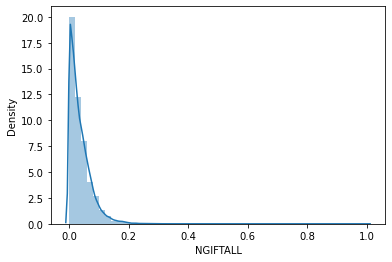

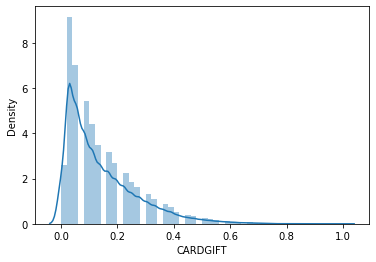

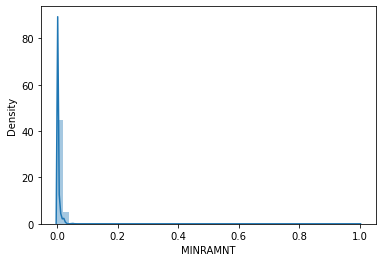

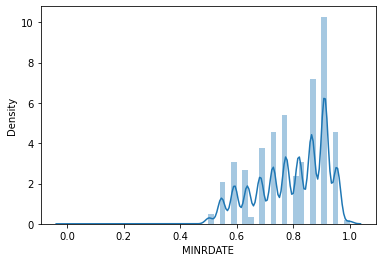

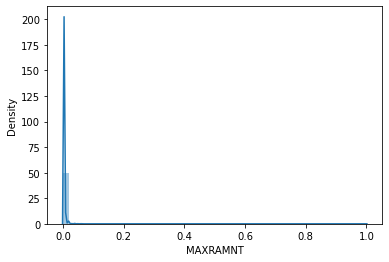

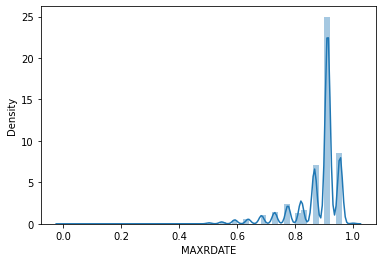

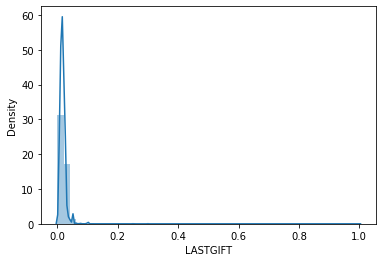

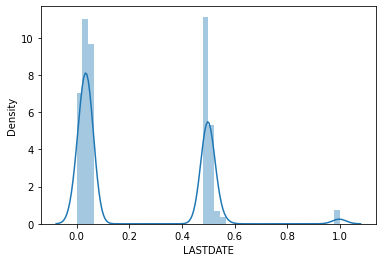

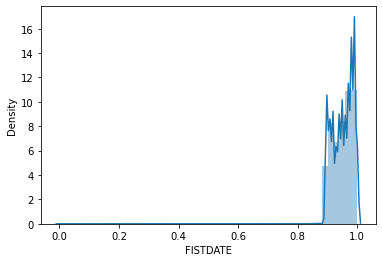

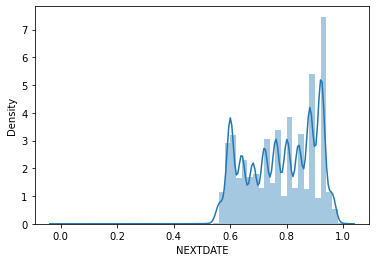

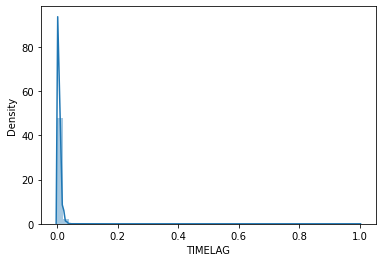

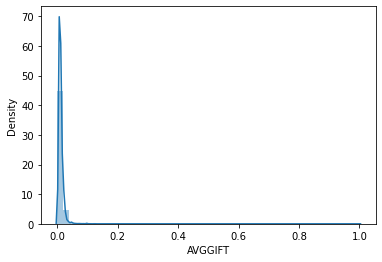

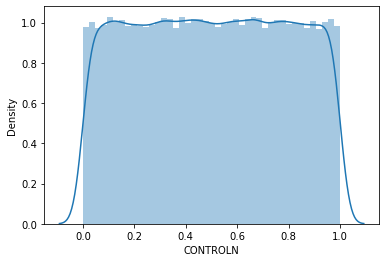

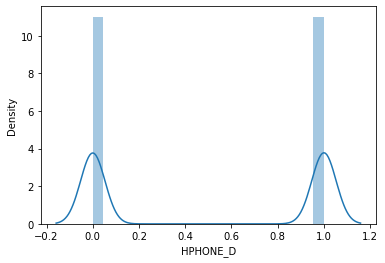

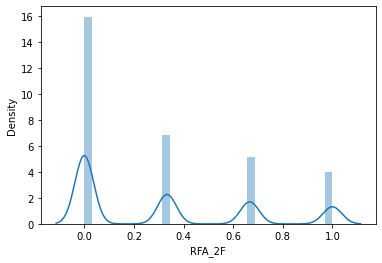

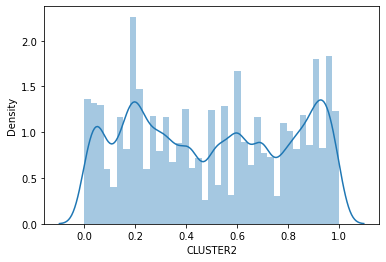

In [11]:
# normalization for train_num data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(train_num)
normalized_data = pd.DataFrame(normalized_data, columns=train_num.columns)

#plot to check 
for col in normalized_data.columns:
    sns.distplot(normalized_data[col])
    plt.show()

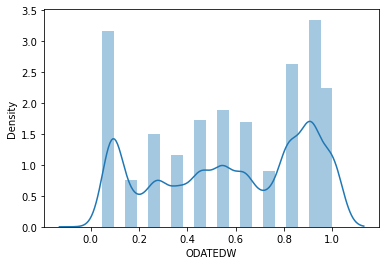

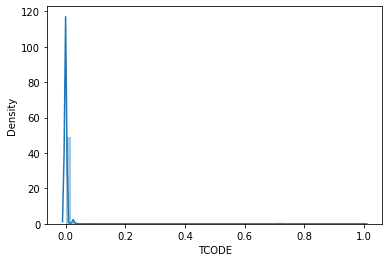

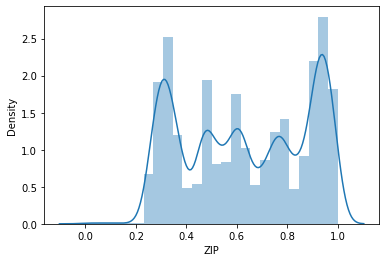

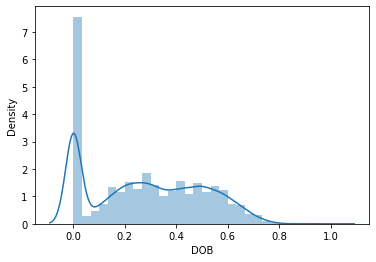

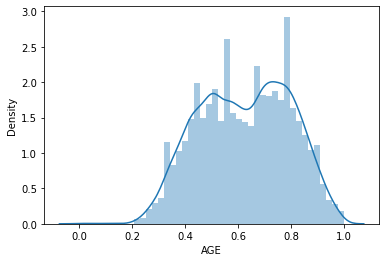

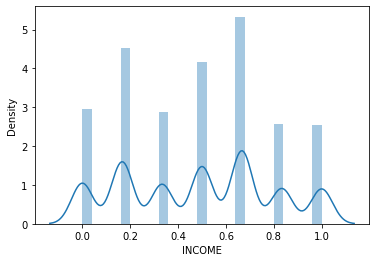

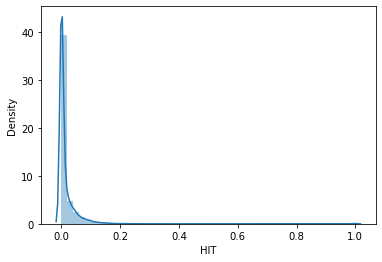

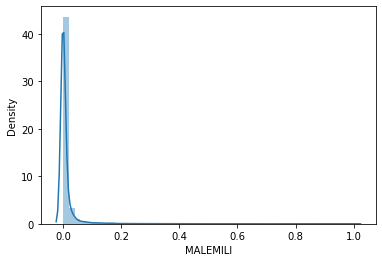

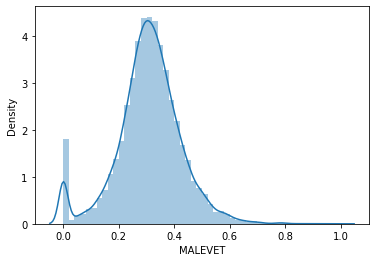

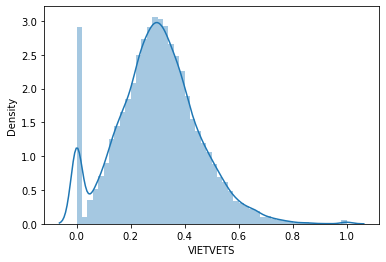

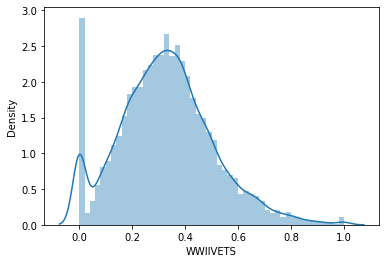

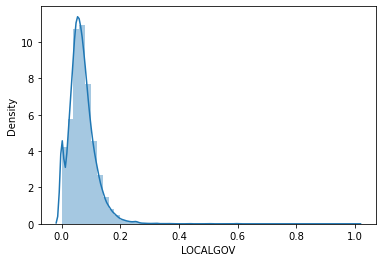

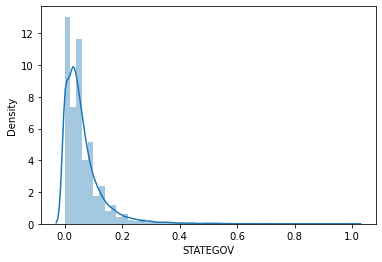

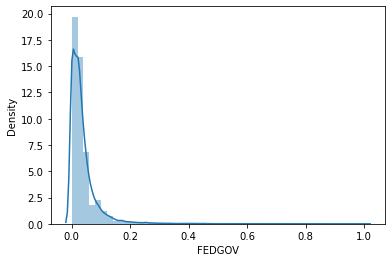

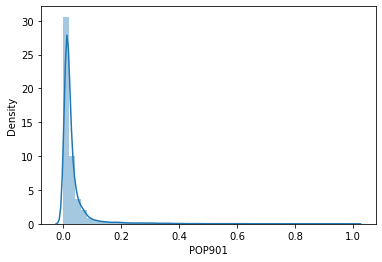

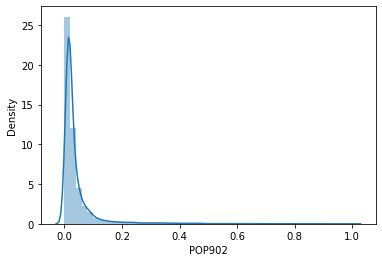

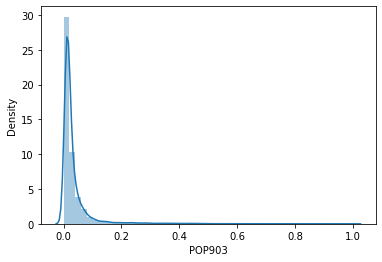

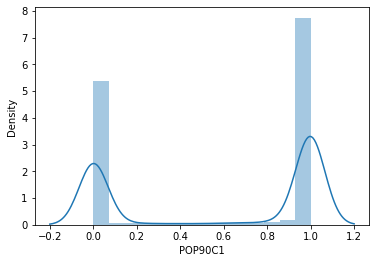

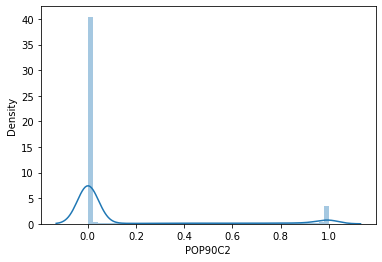

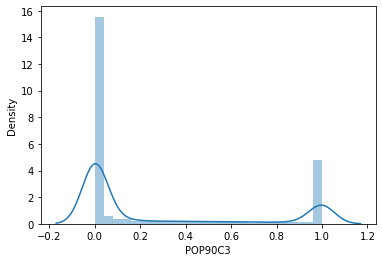

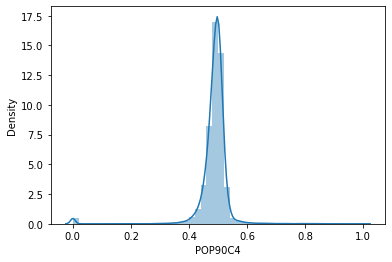

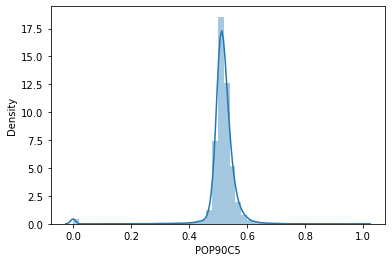

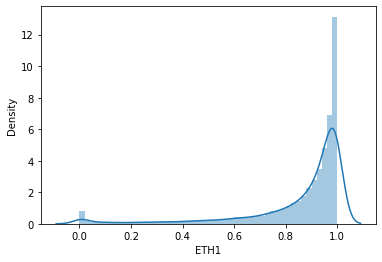

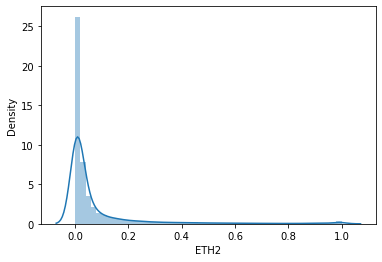

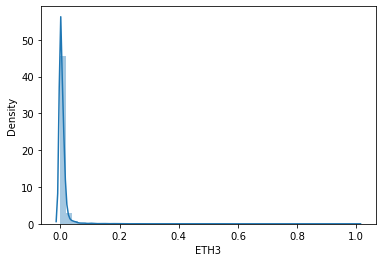

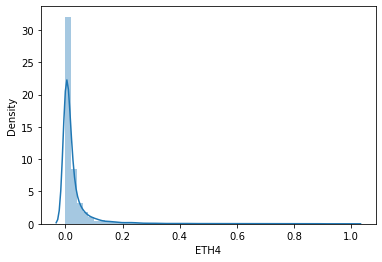

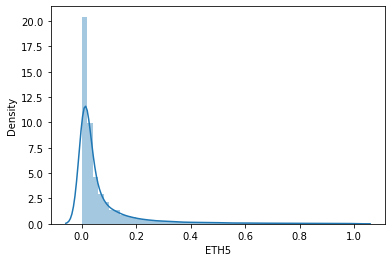

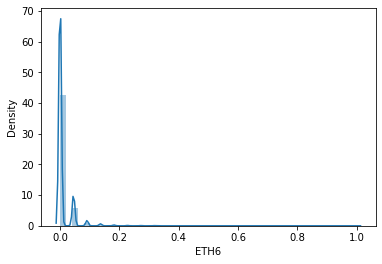

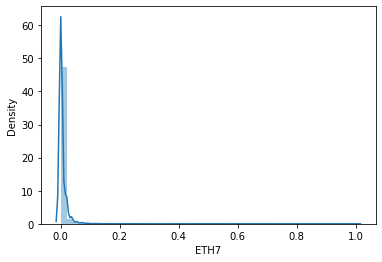

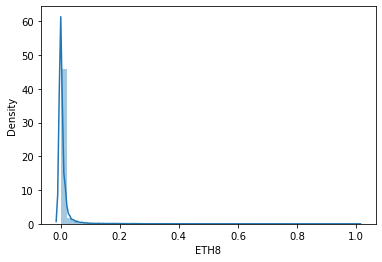

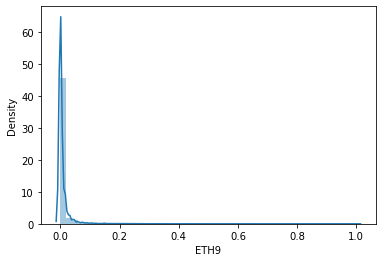

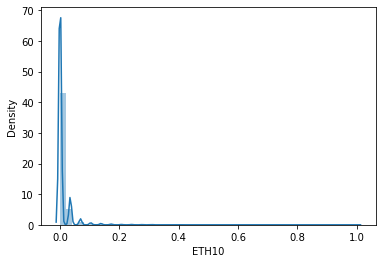

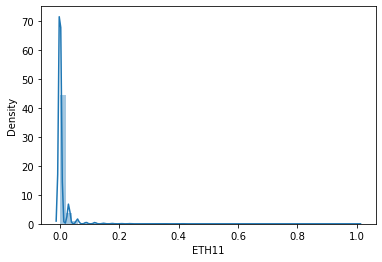

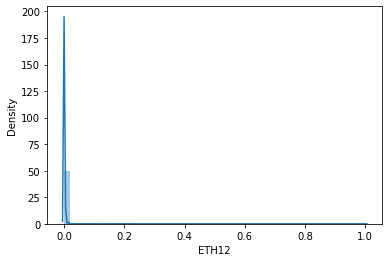

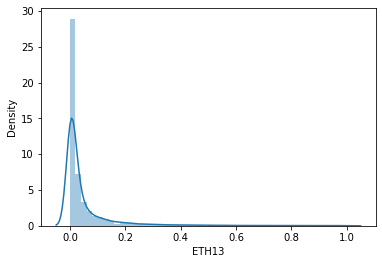

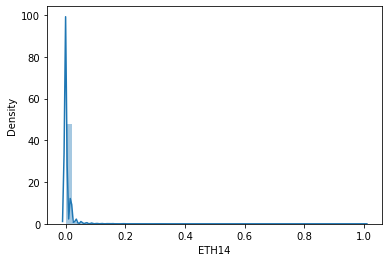

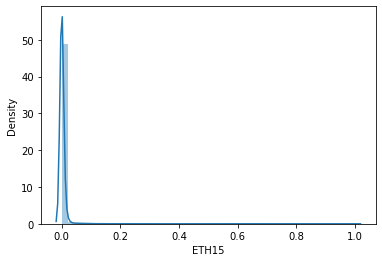

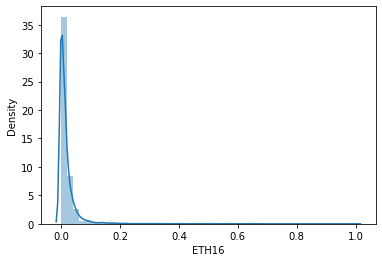

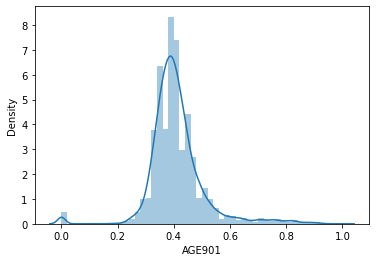

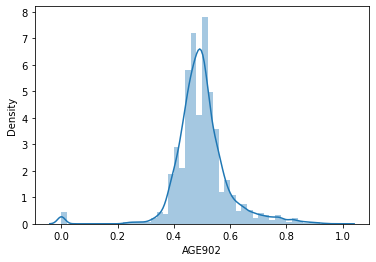

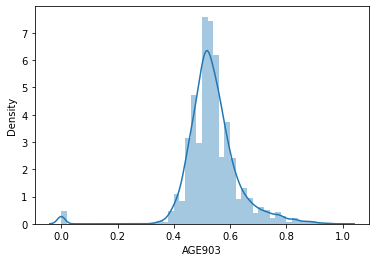

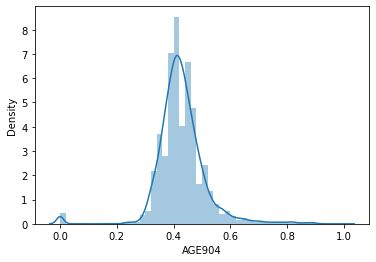

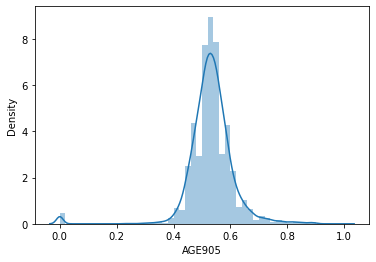

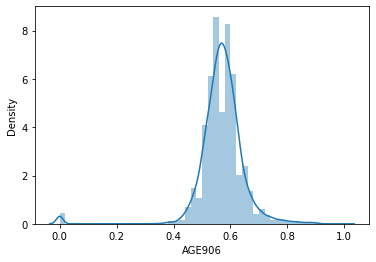

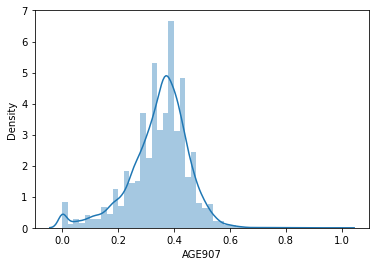

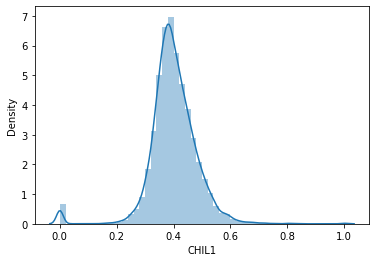

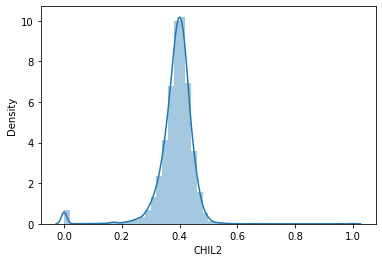

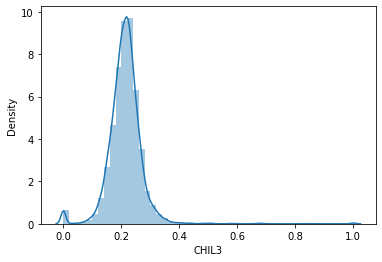

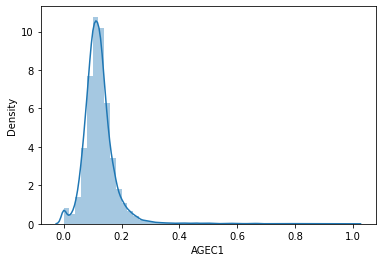

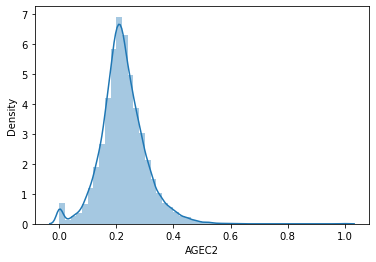

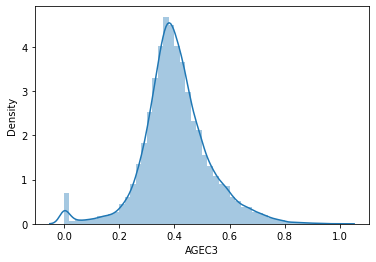

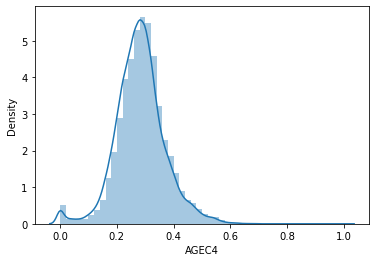

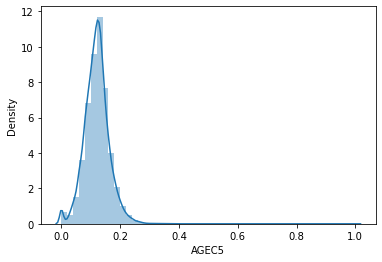

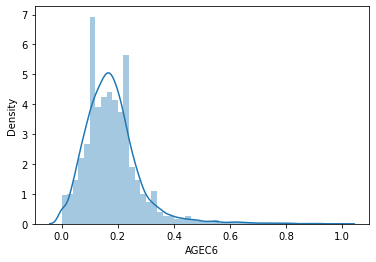

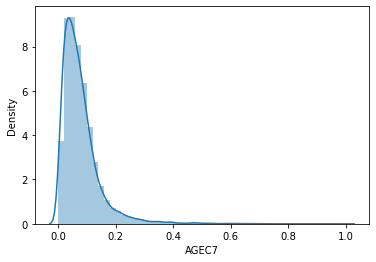

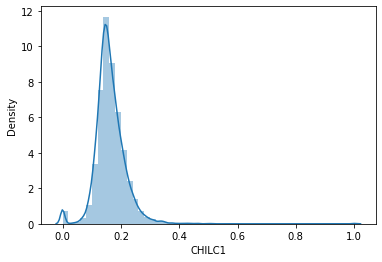

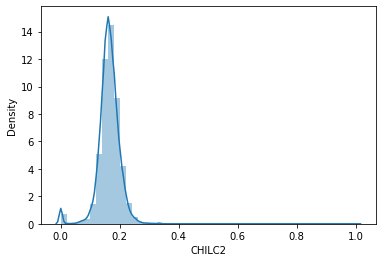

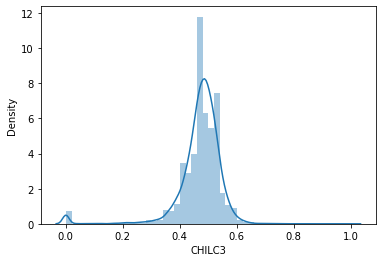

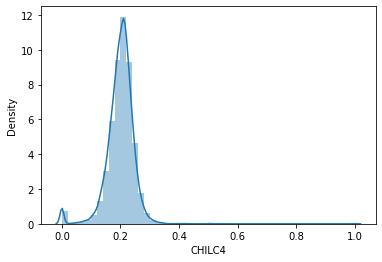

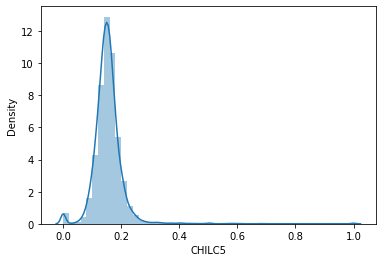

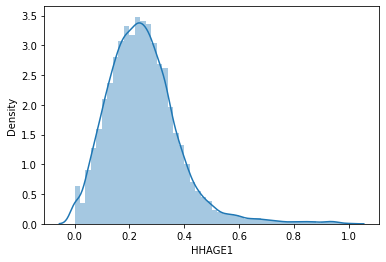

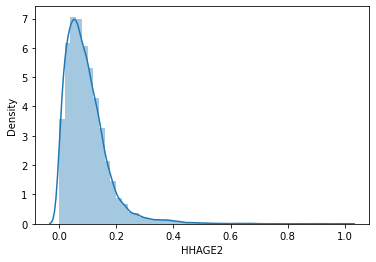

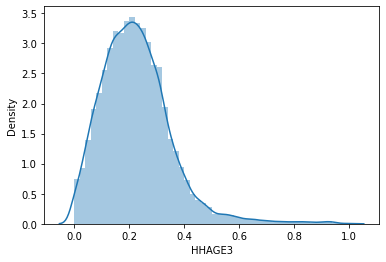

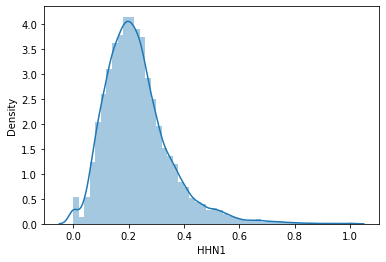

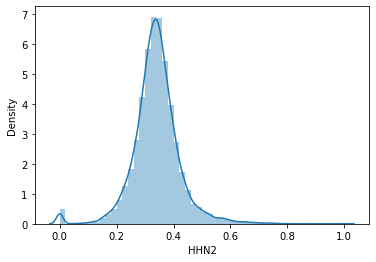

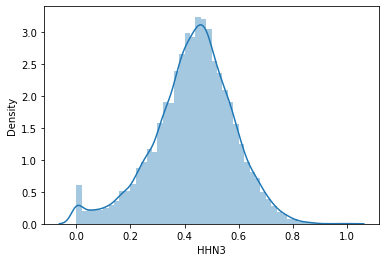

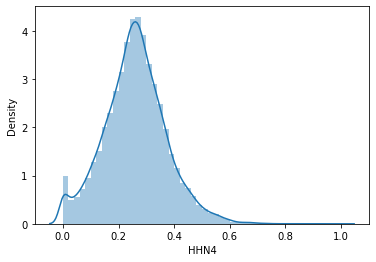

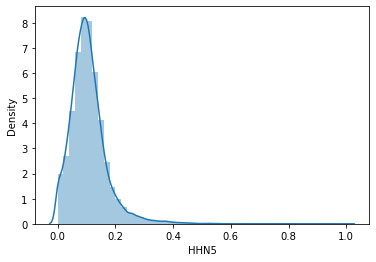

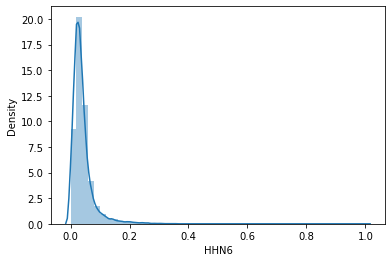

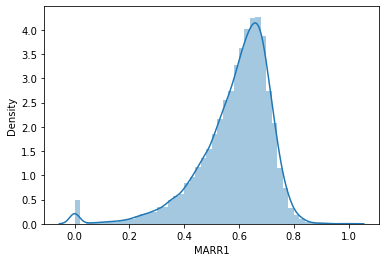

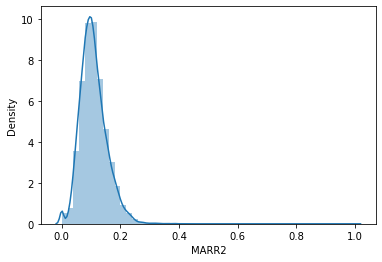

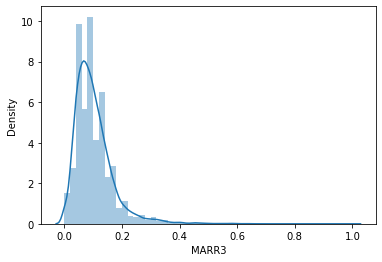

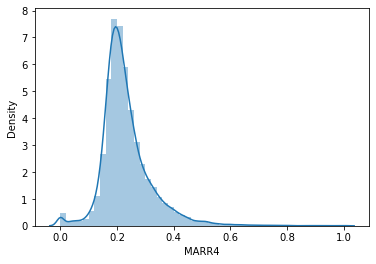

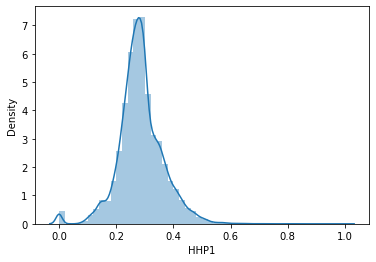

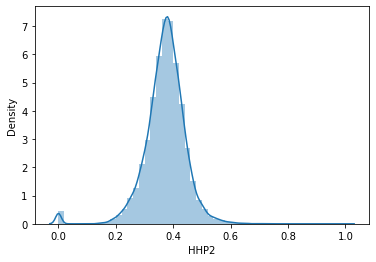

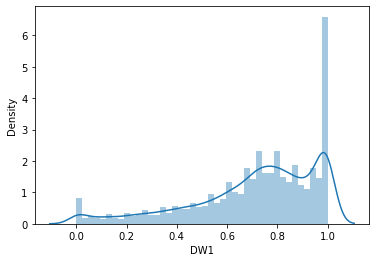

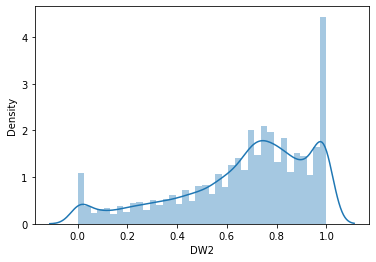

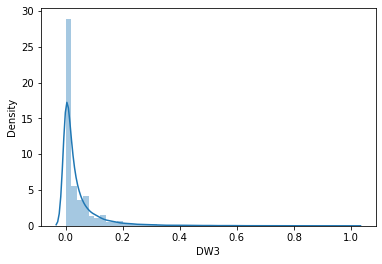

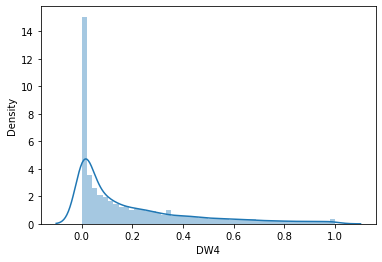

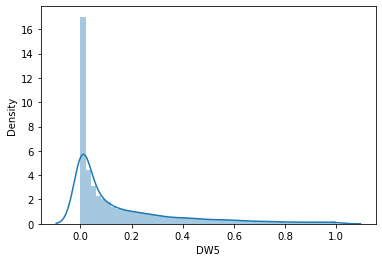

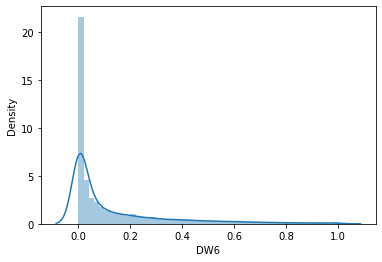

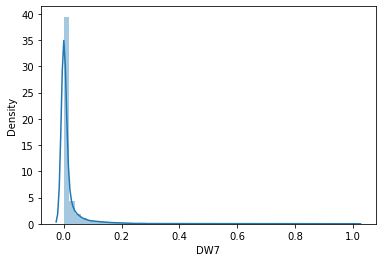

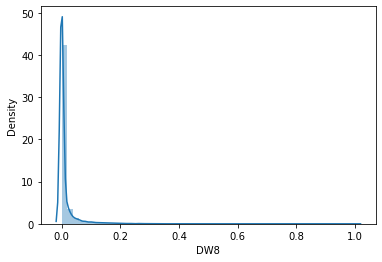

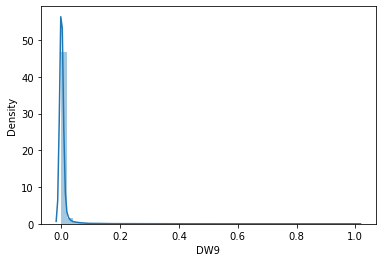

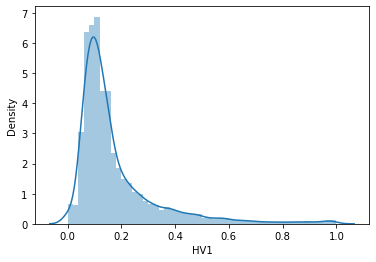

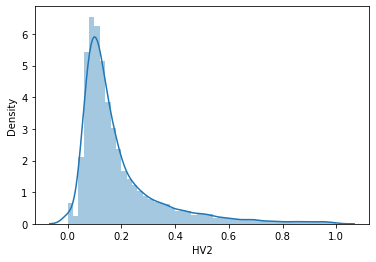

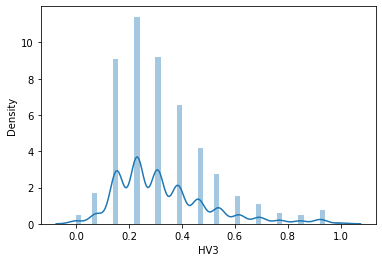

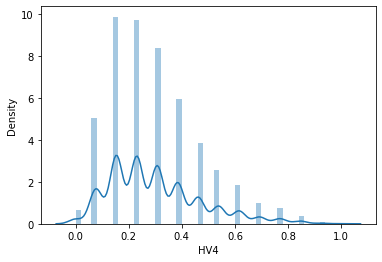

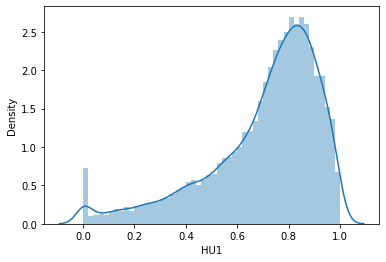

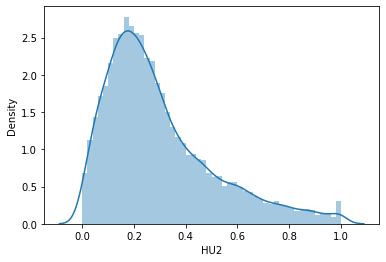

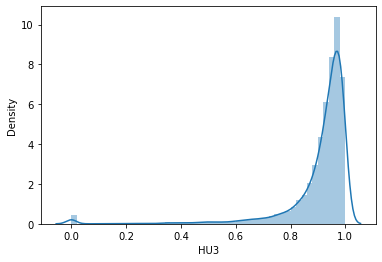

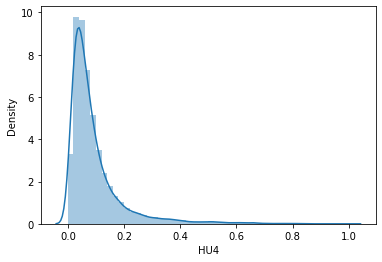

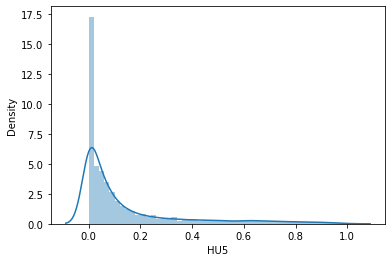

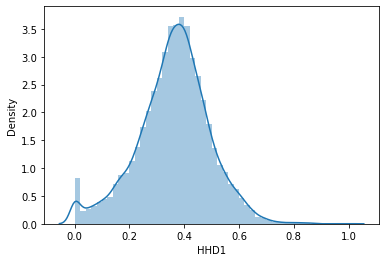

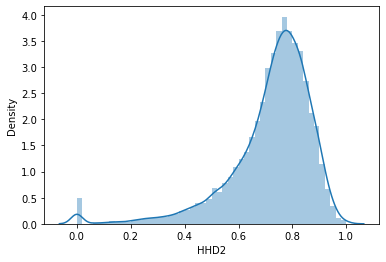

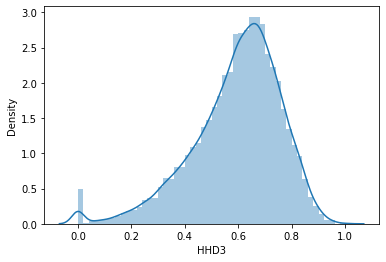

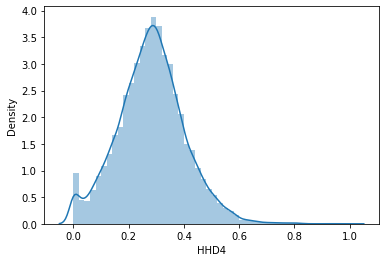

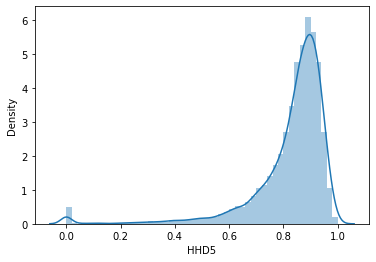

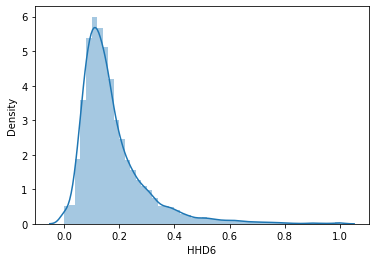

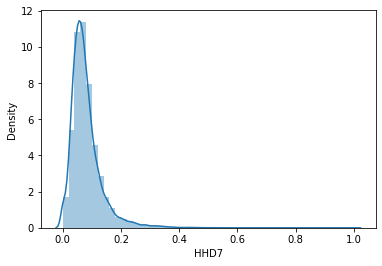

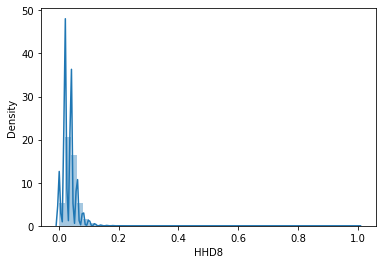

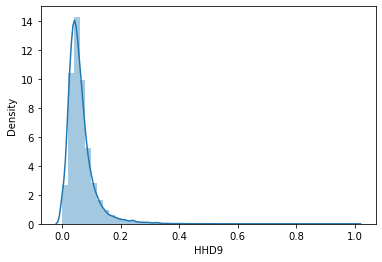

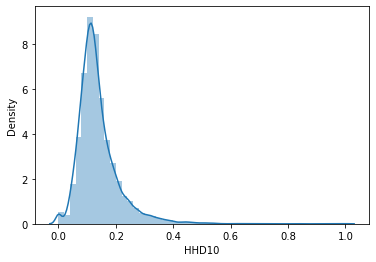

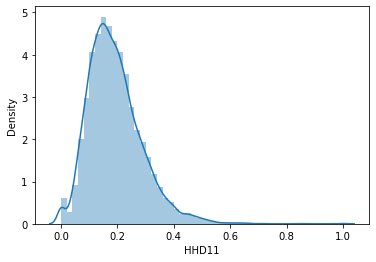

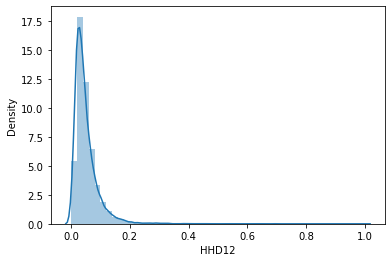

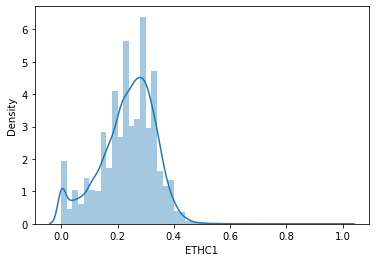

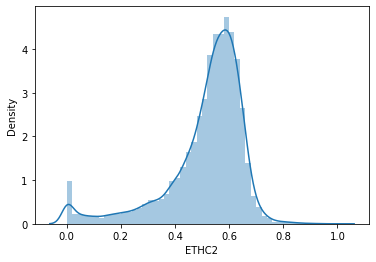

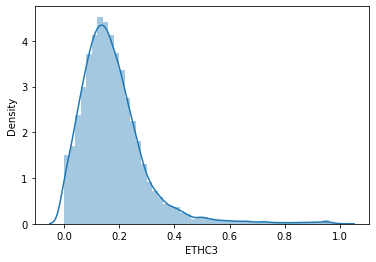

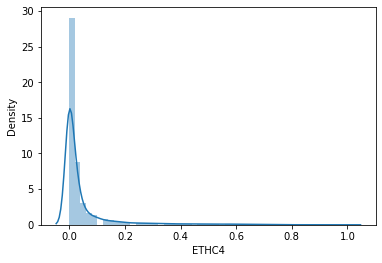

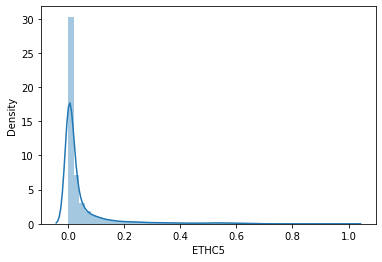

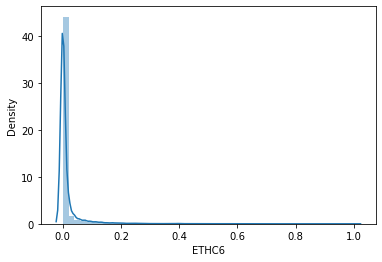

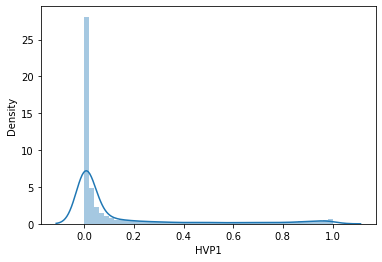

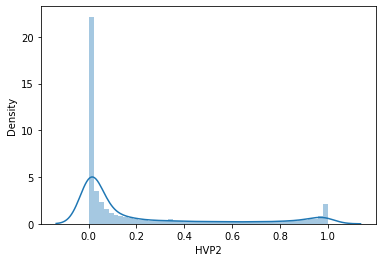

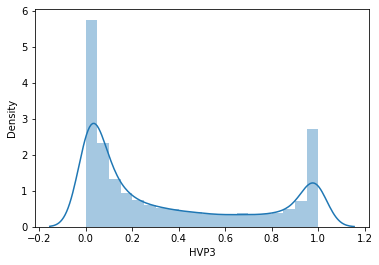

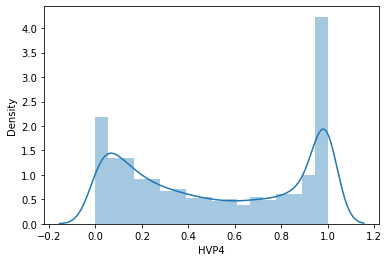

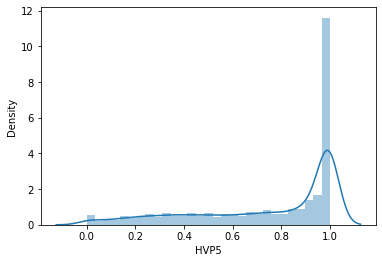

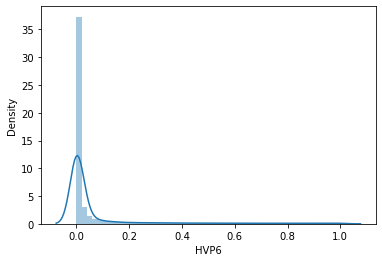

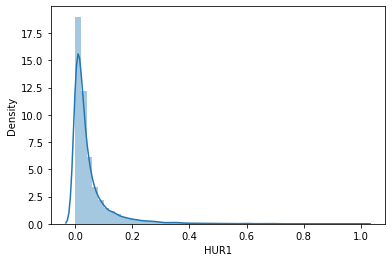

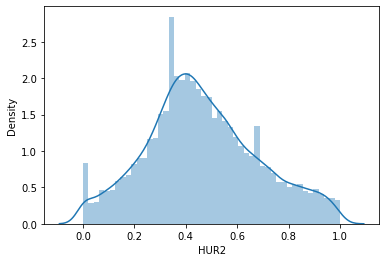

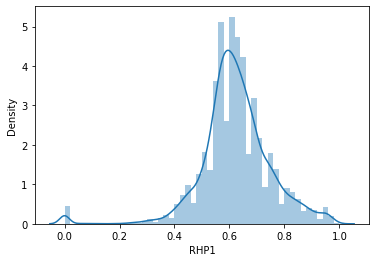

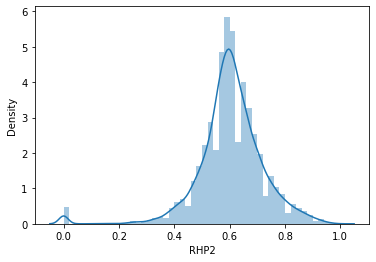

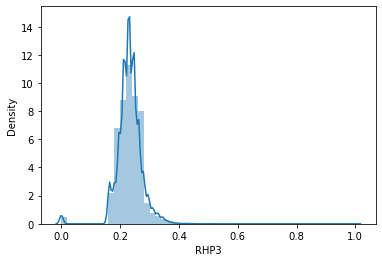

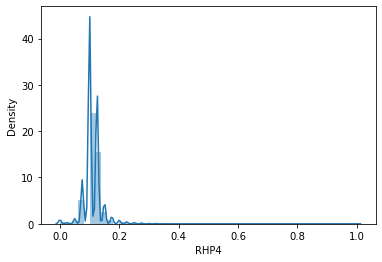

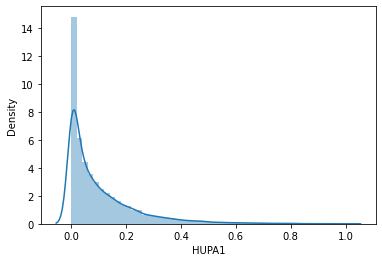

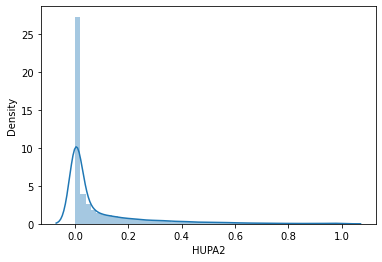

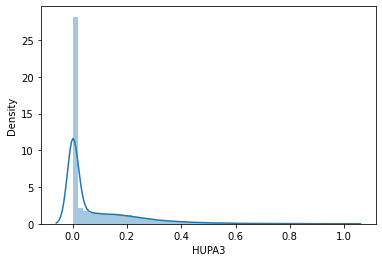

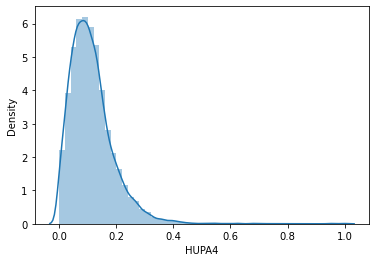

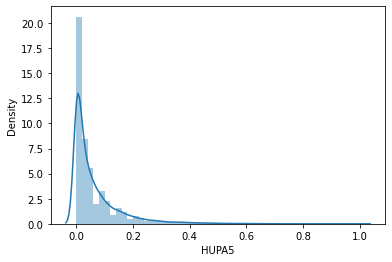

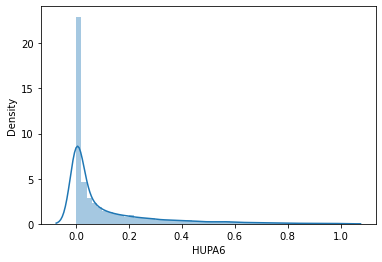

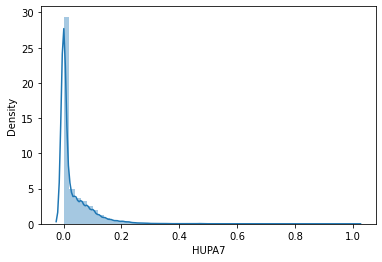

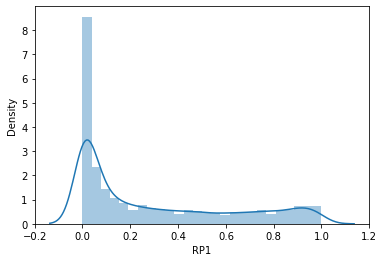

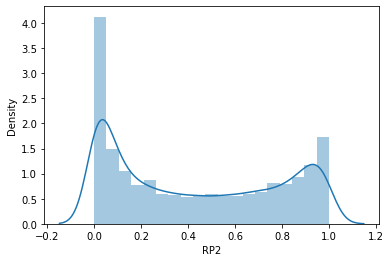

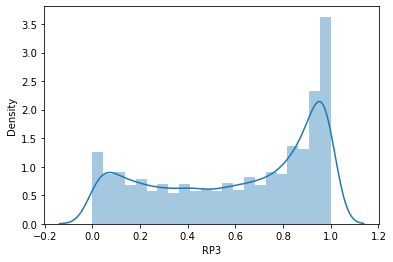

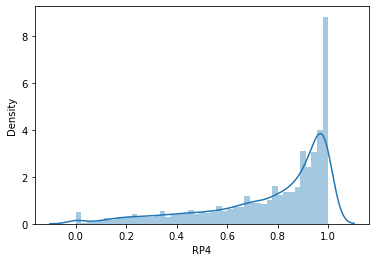

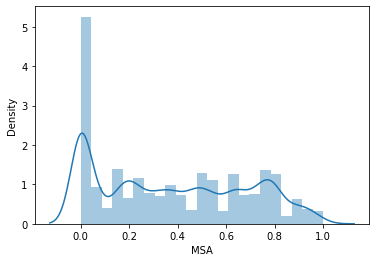

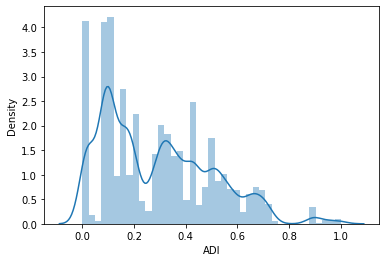

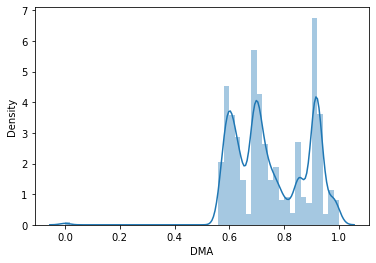

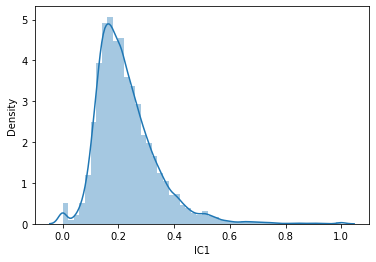

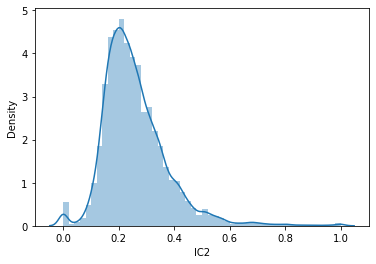

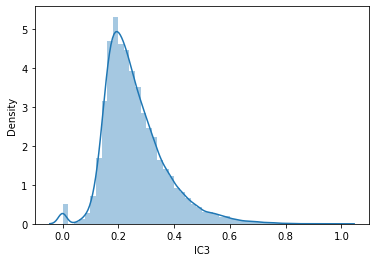

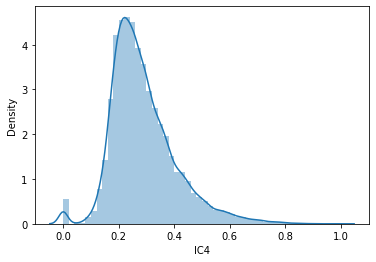

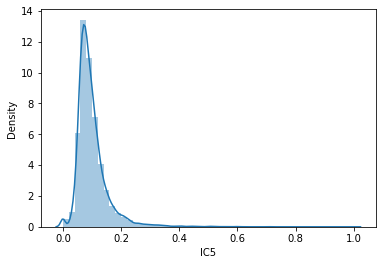

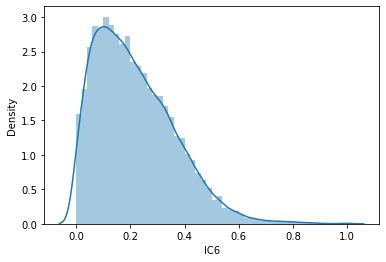

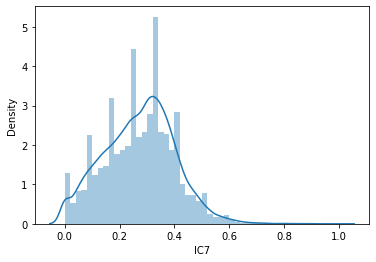

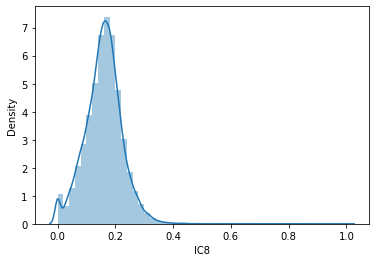

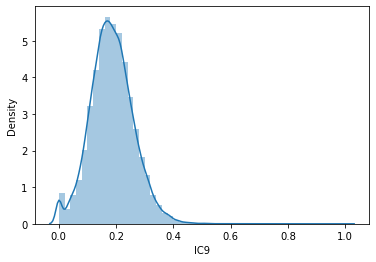

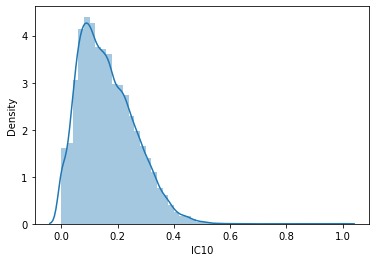

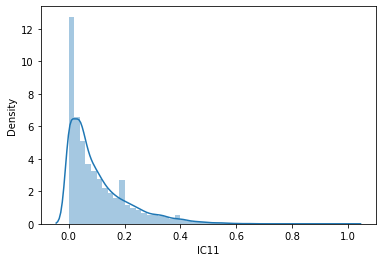

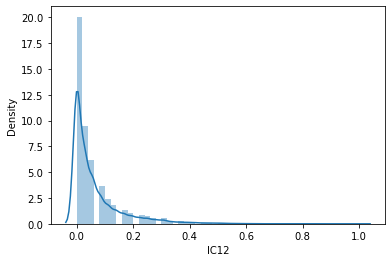

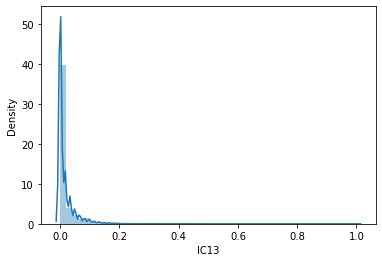

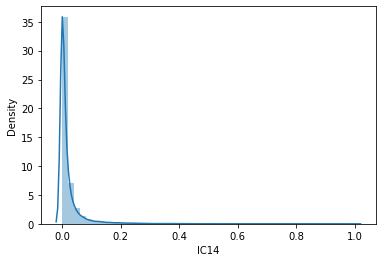

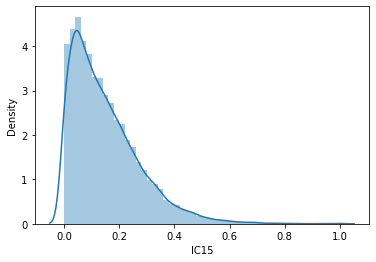

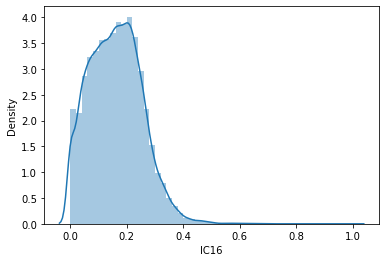

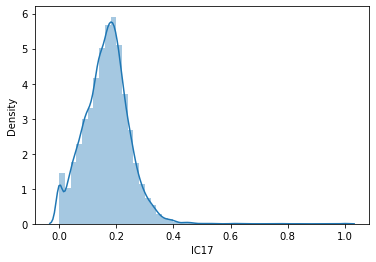

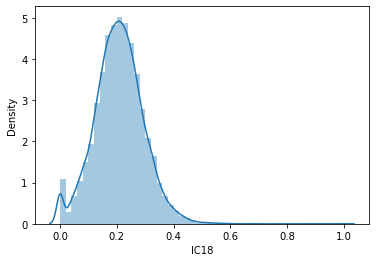

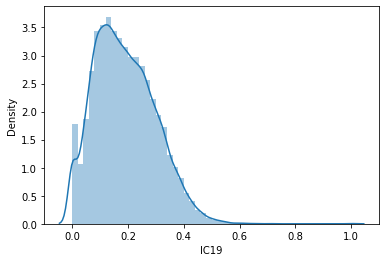

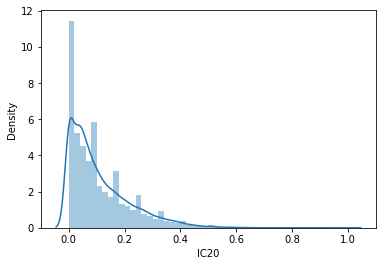

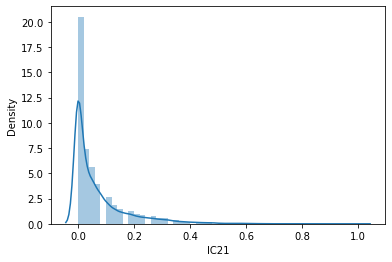

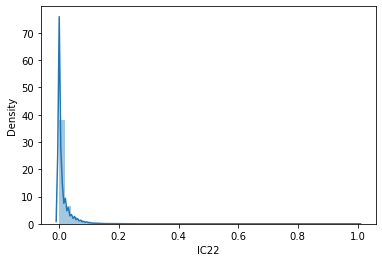

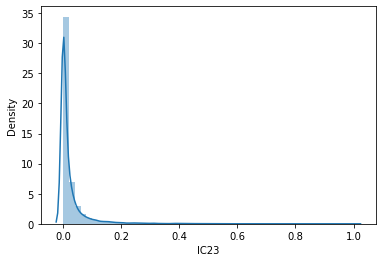

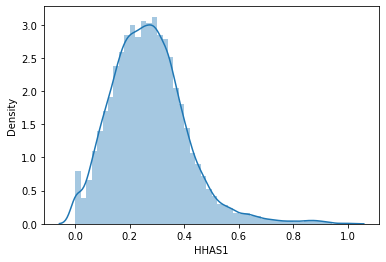

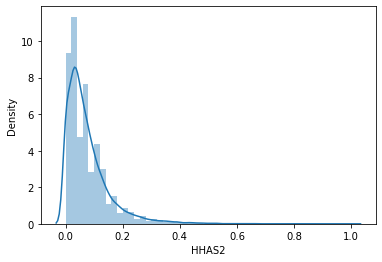

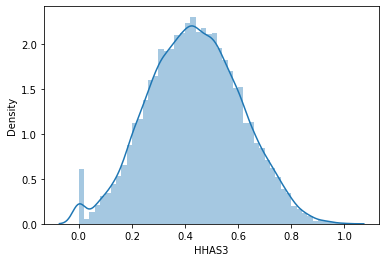

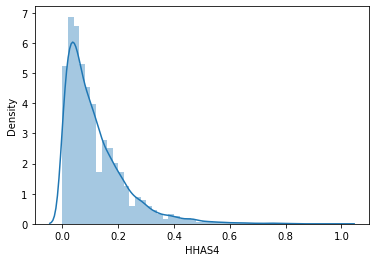

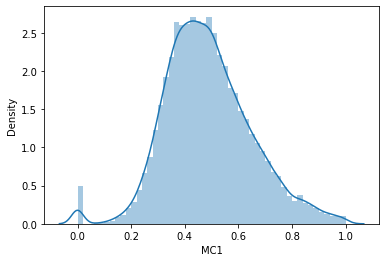

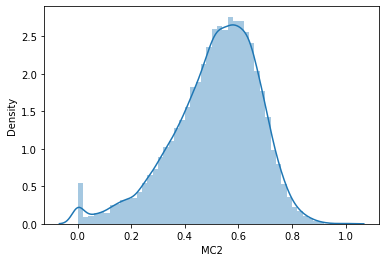

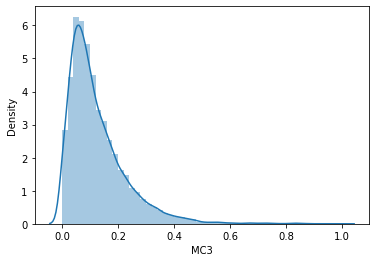

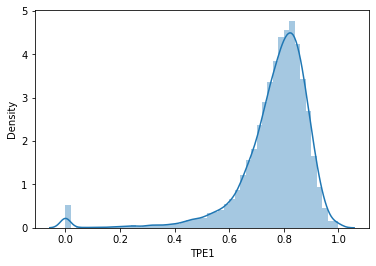

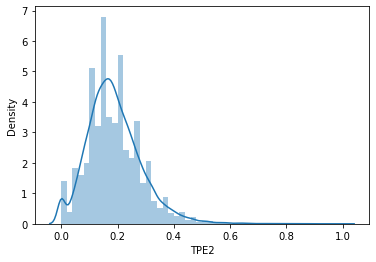

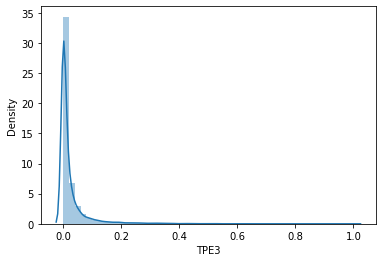

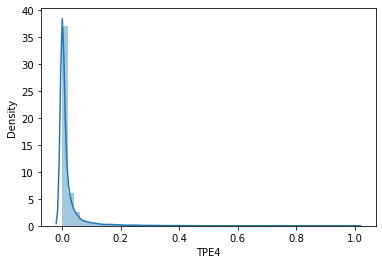

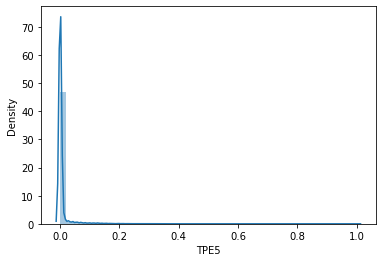

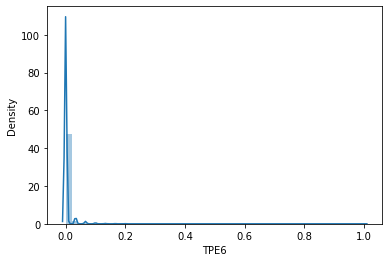

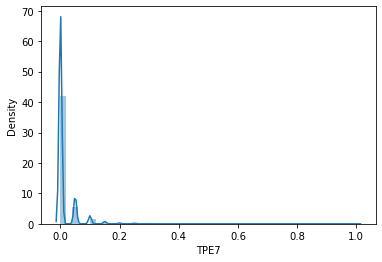

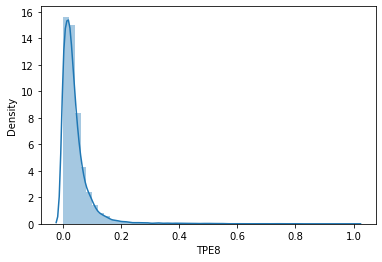

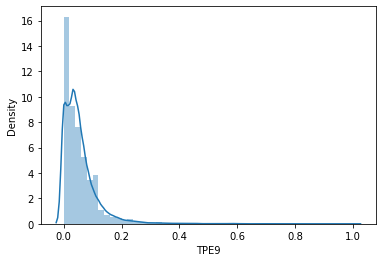

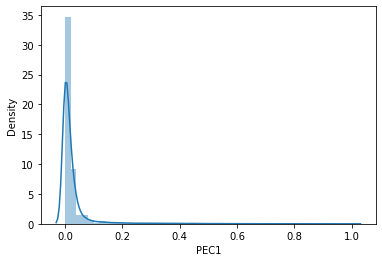

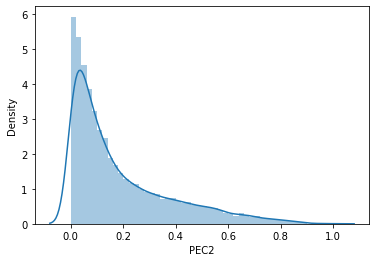

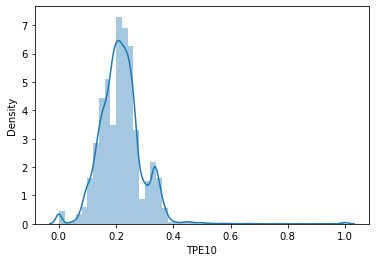

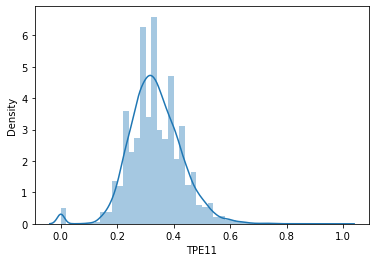

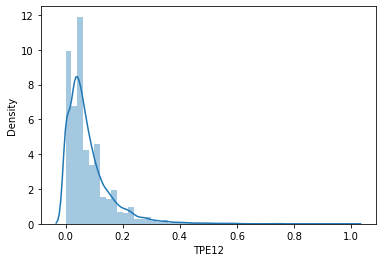

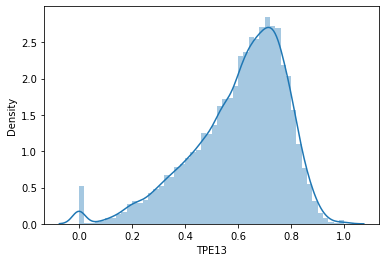

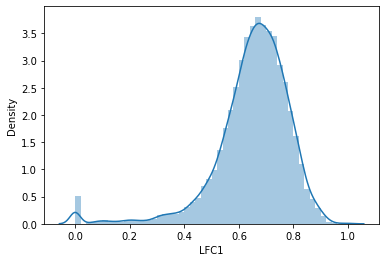

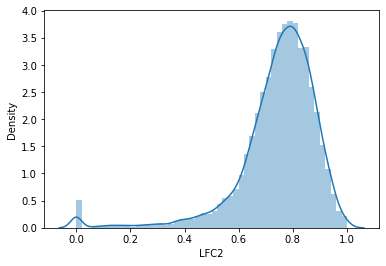

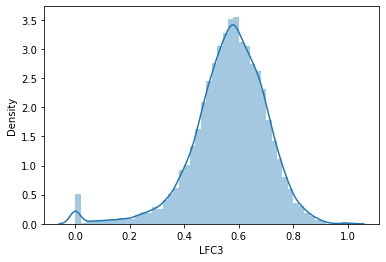

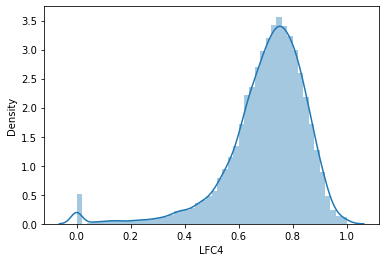

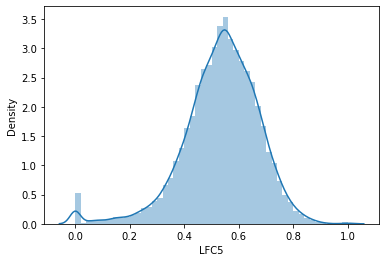

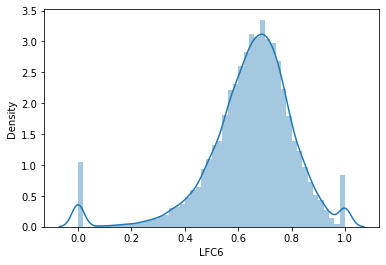

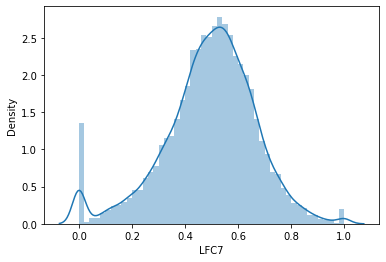

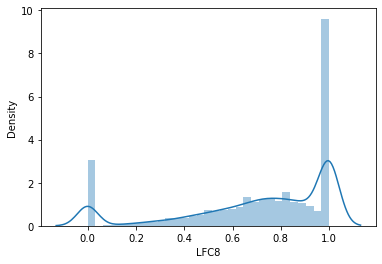

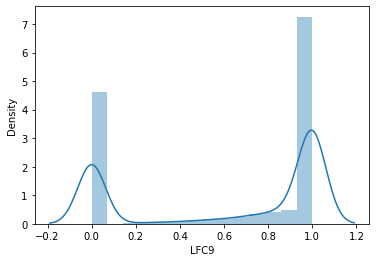

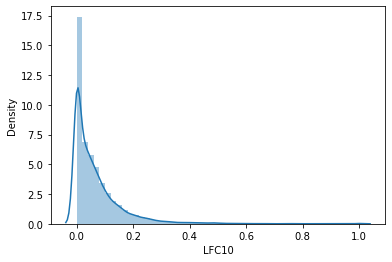

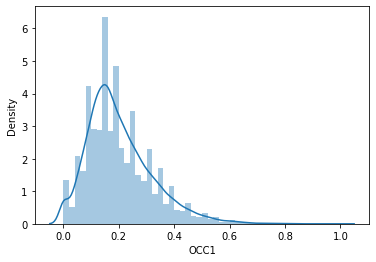

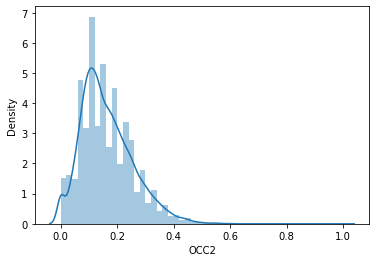

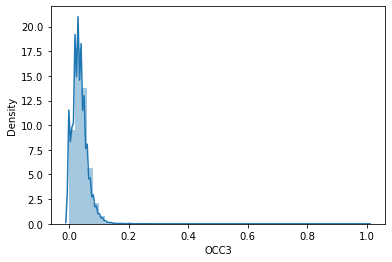

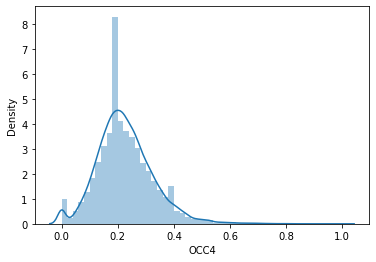

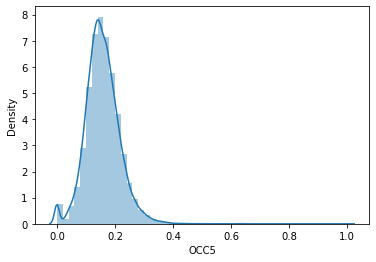

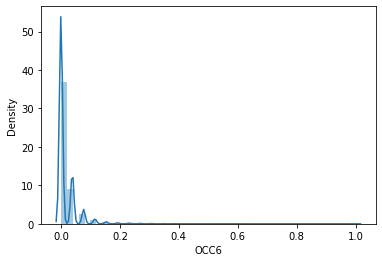

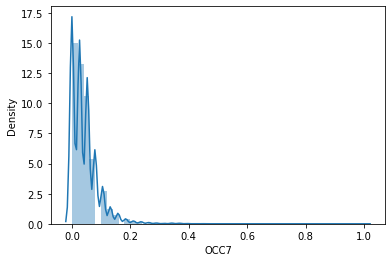

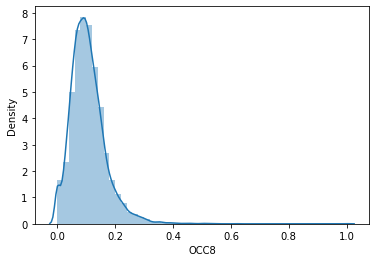

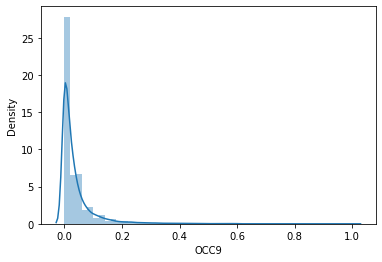

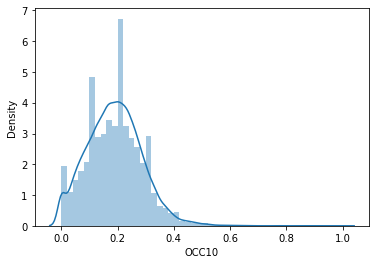

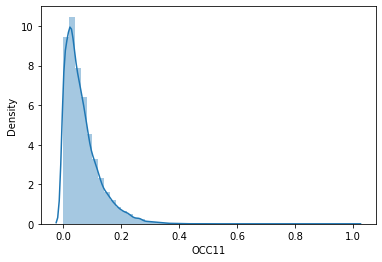

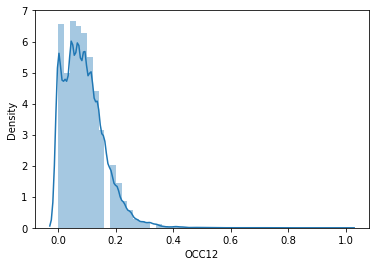

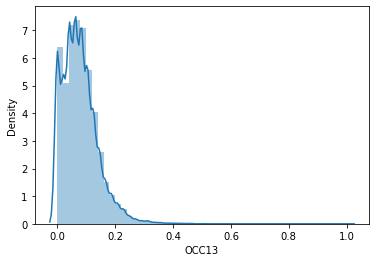

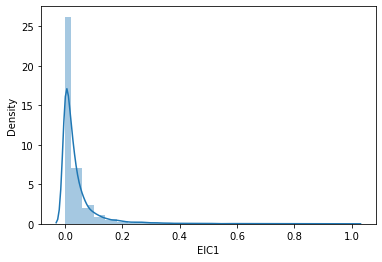

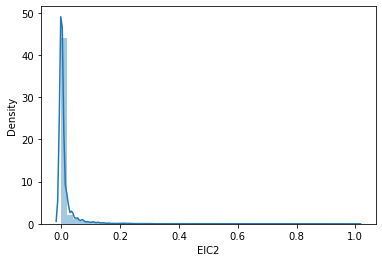

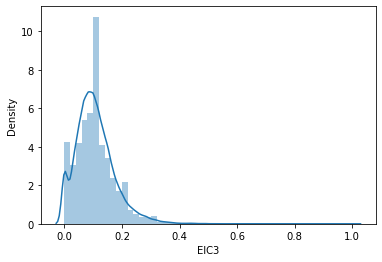

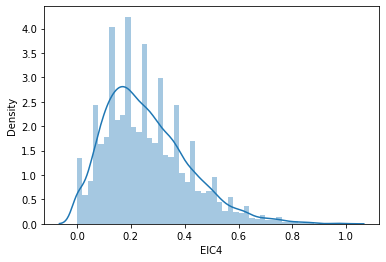

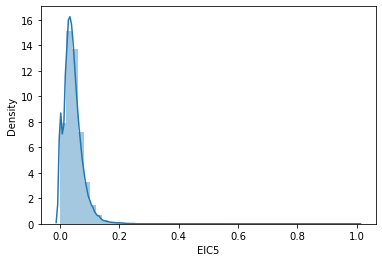

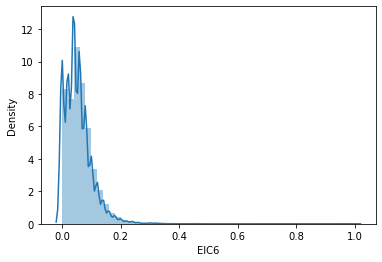

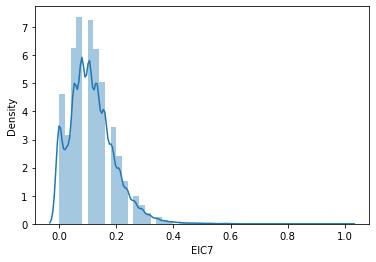

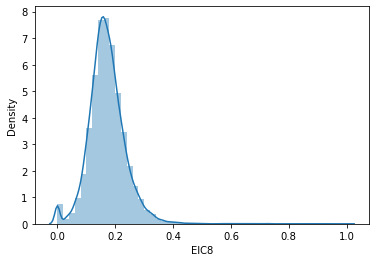

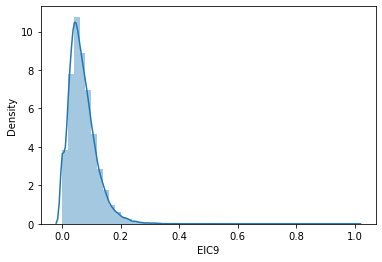

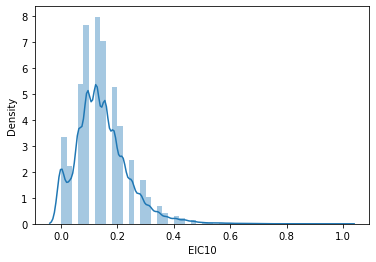

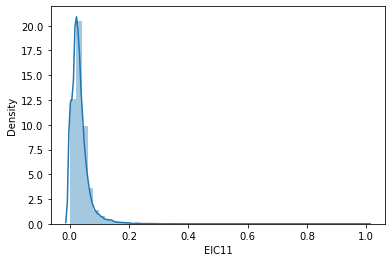

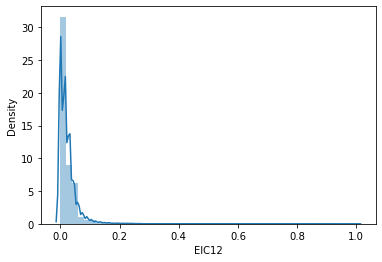

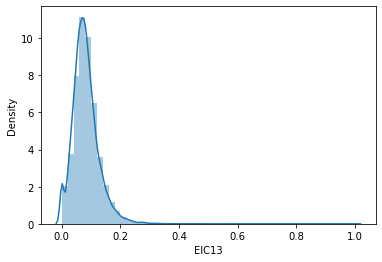

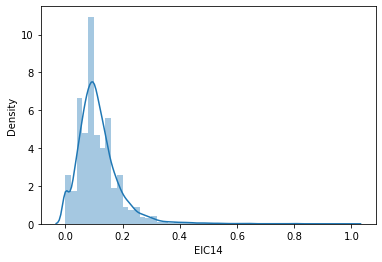

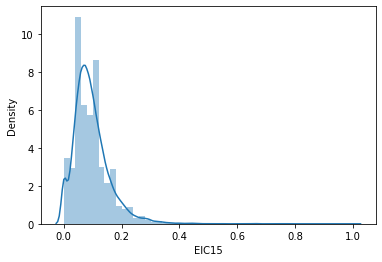

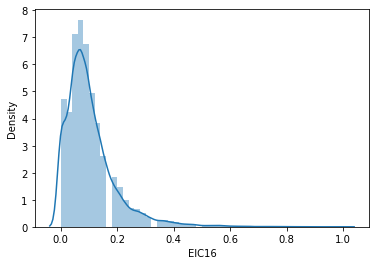

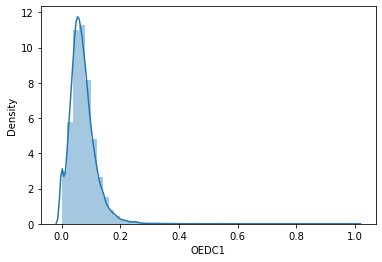

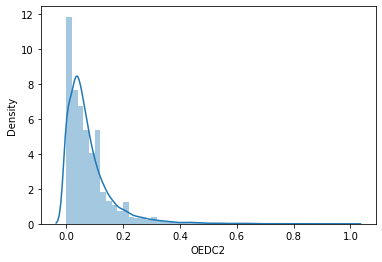

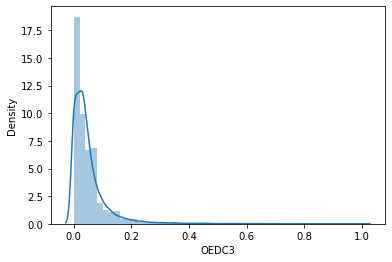

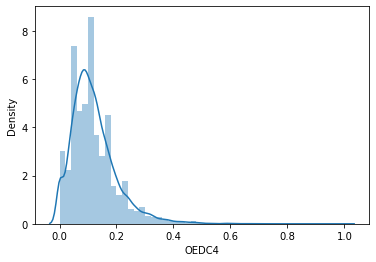

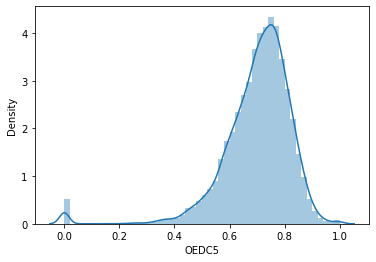

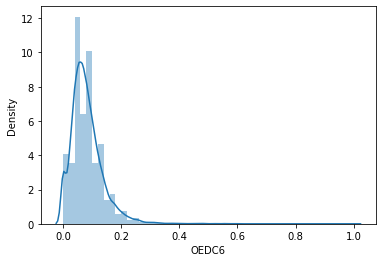

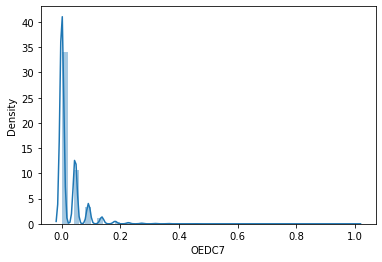

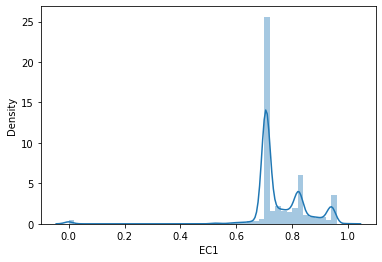

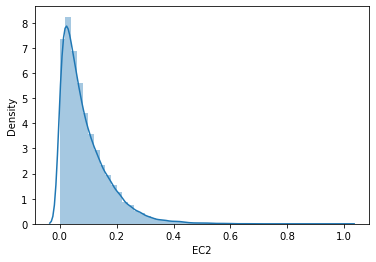

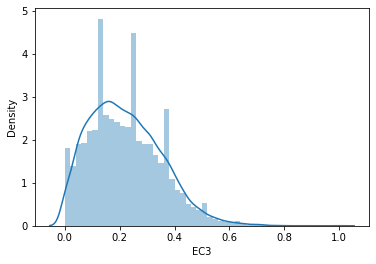

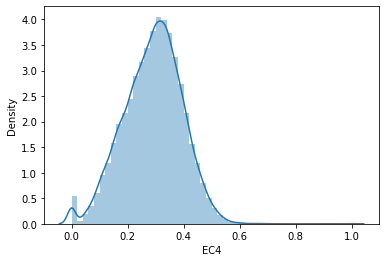

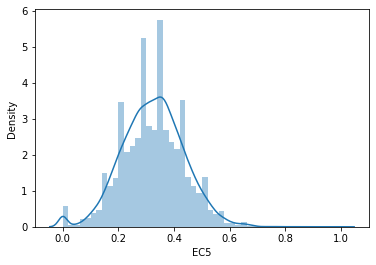

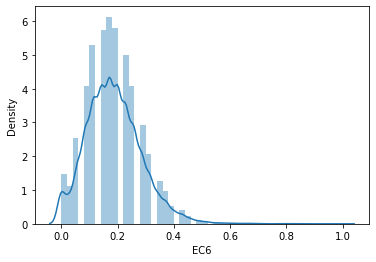

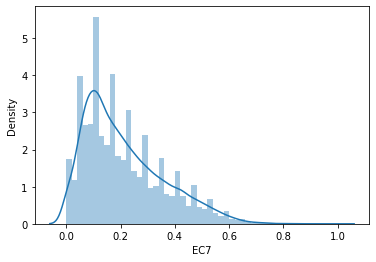

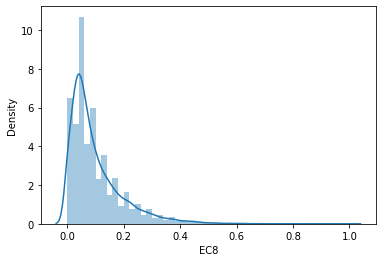

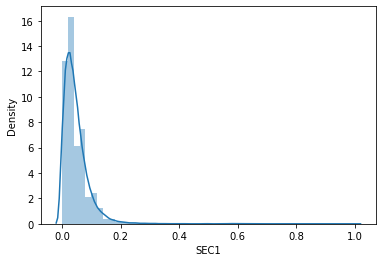

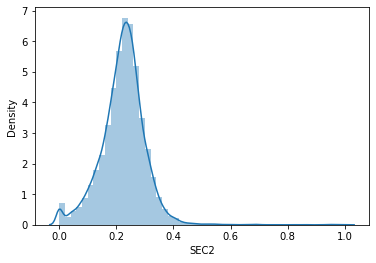

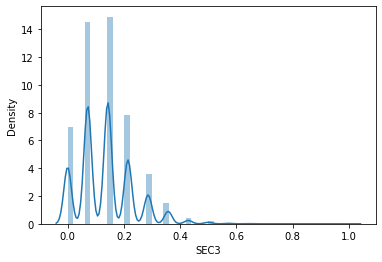

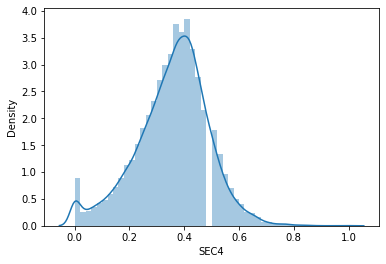

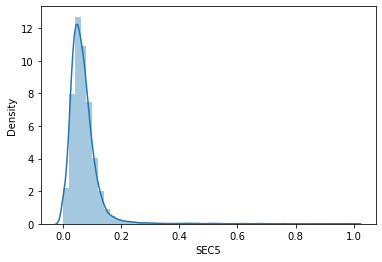

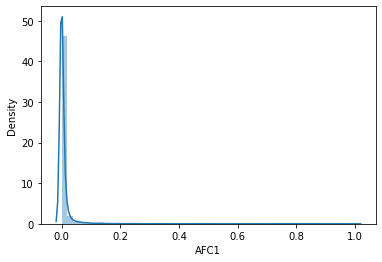

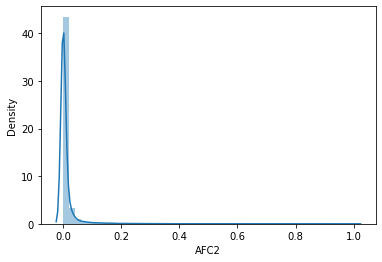

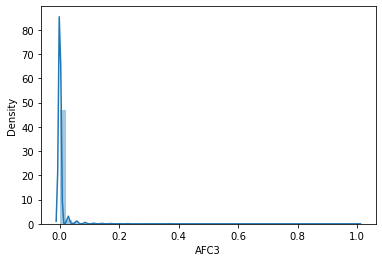

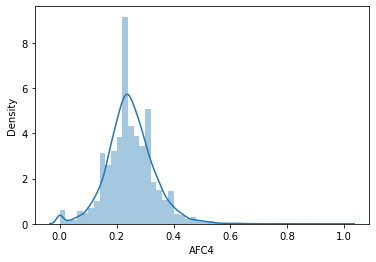

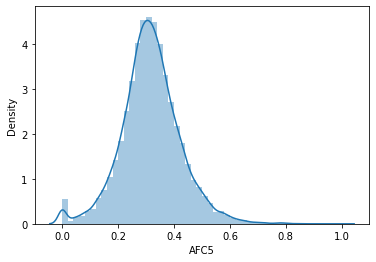

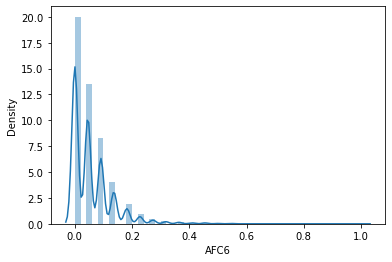

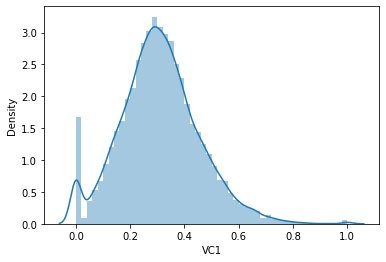

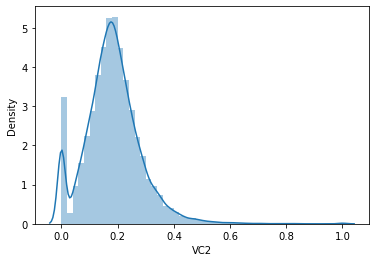

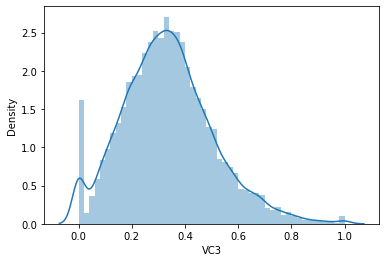

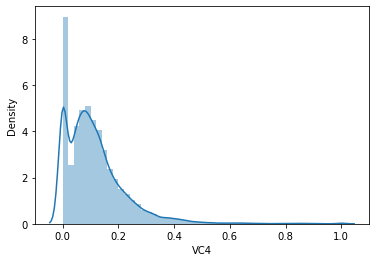

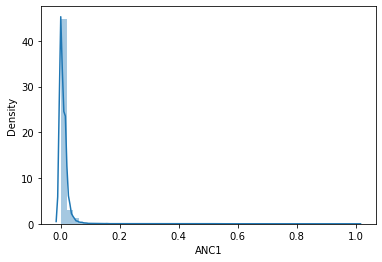

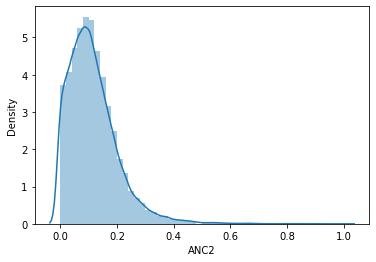

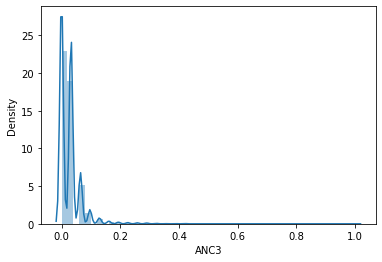

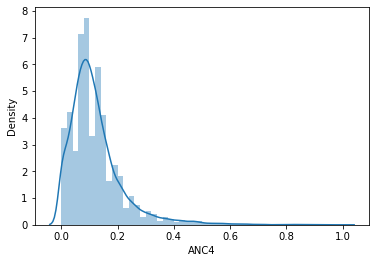

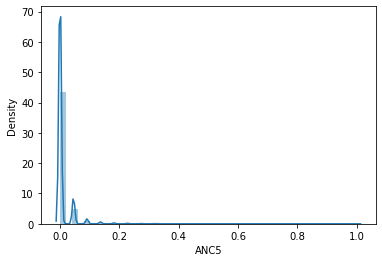

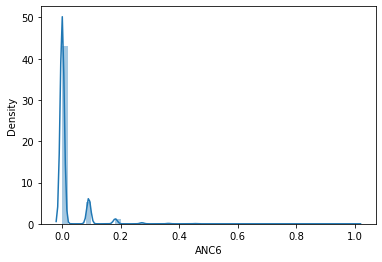

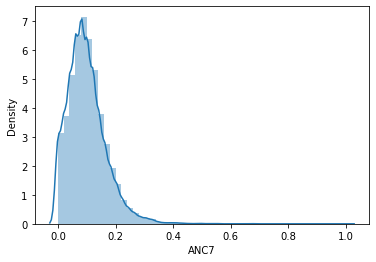

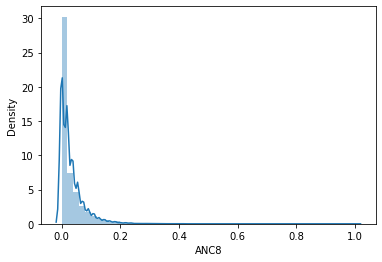

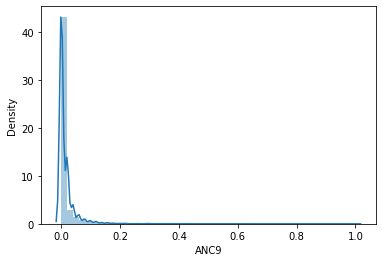

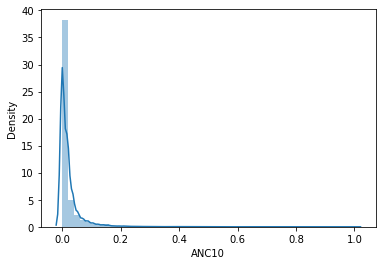

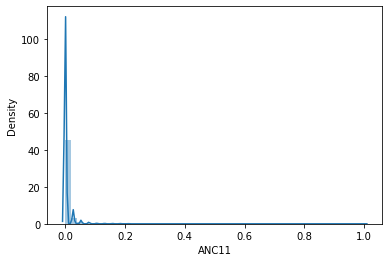

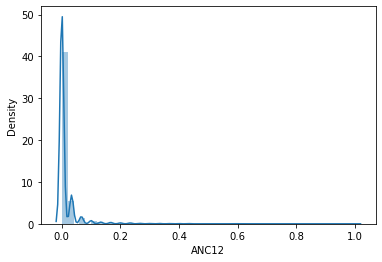

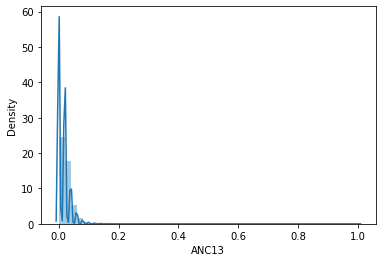

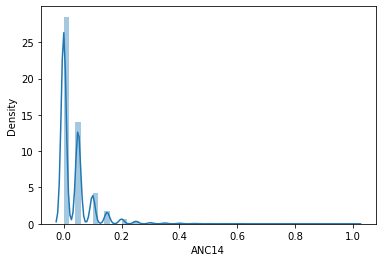

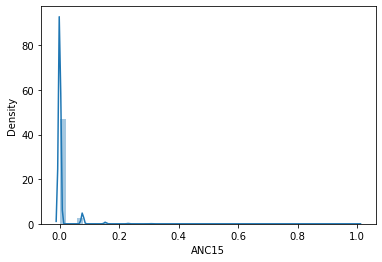

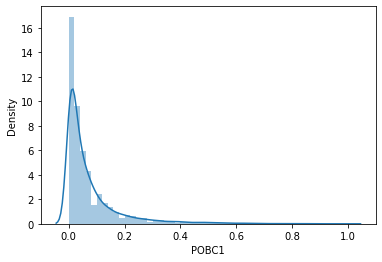

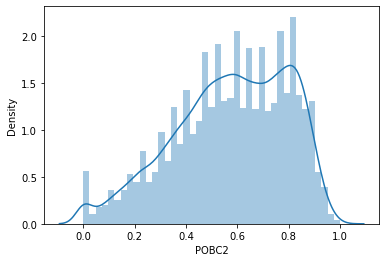

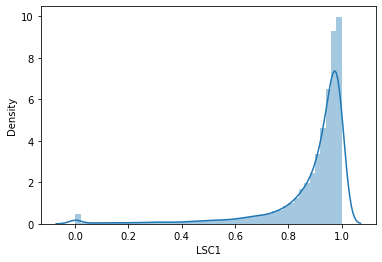

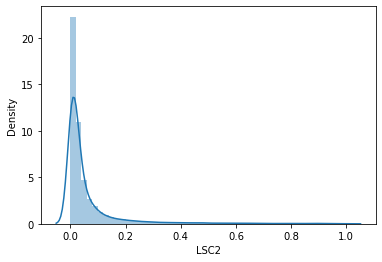

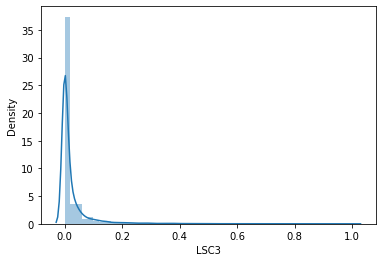

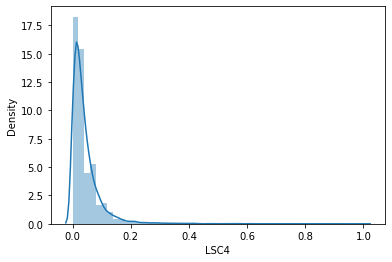

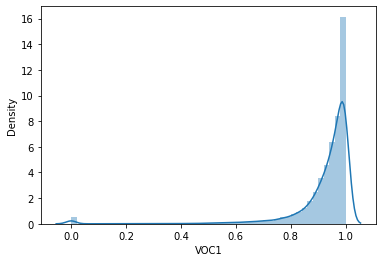

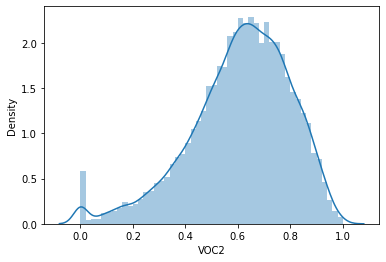

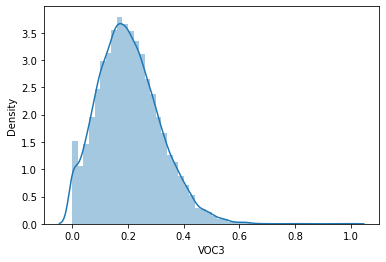

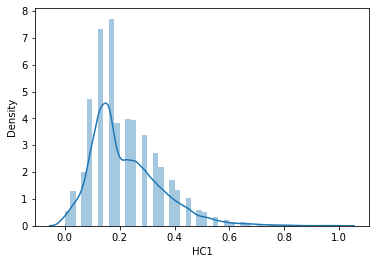

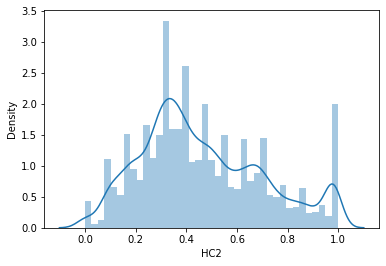

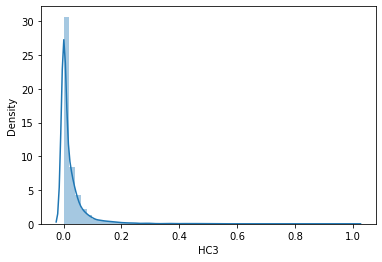

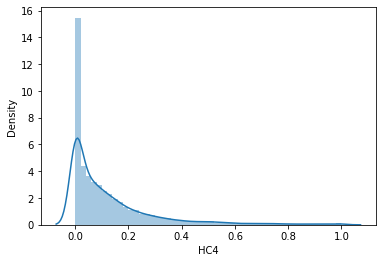

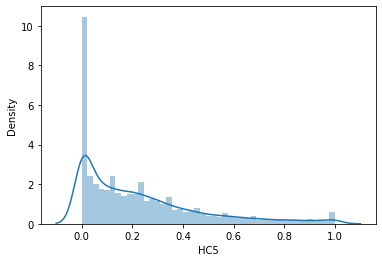

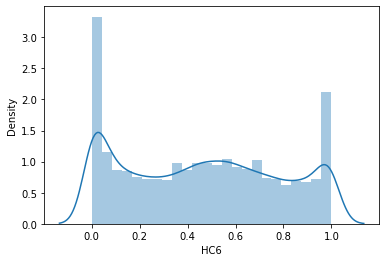

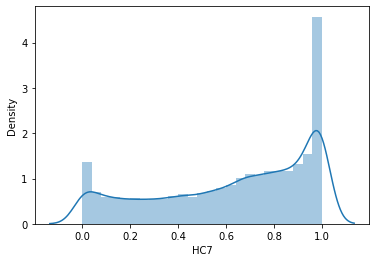

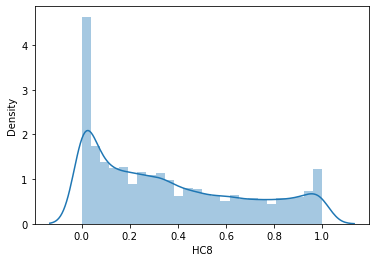

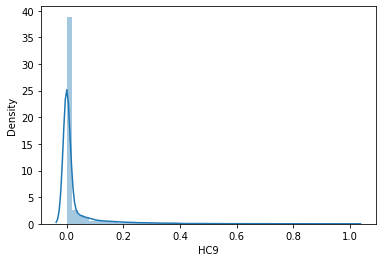

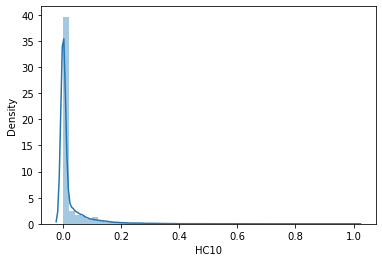

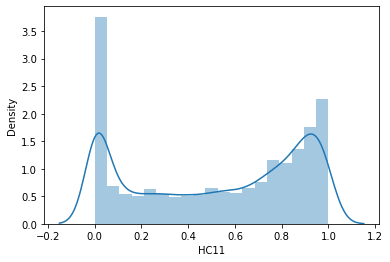

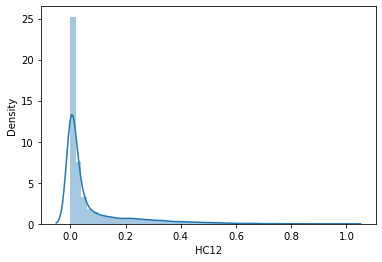

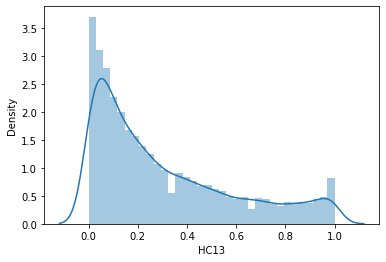

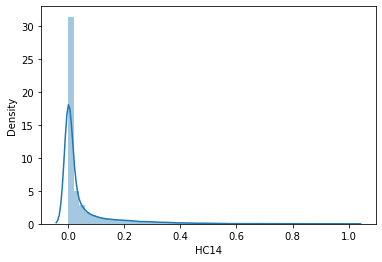

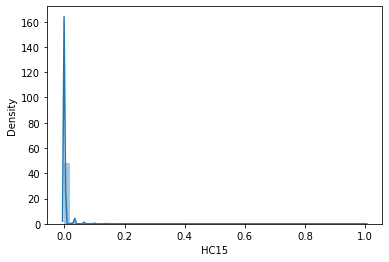

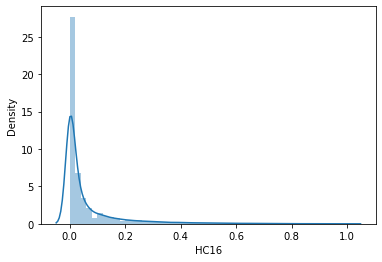

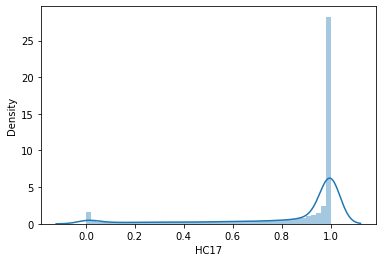

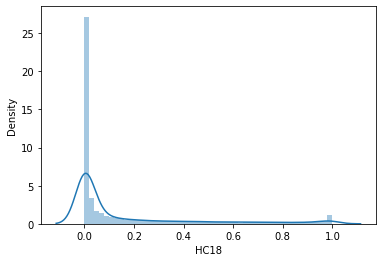

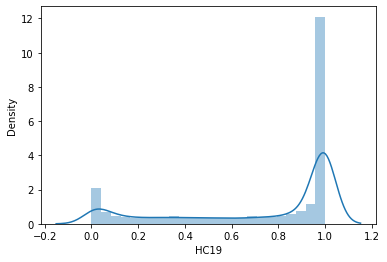

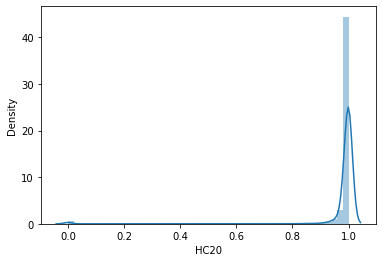

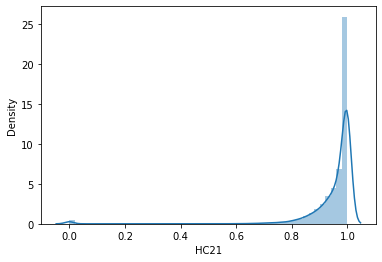

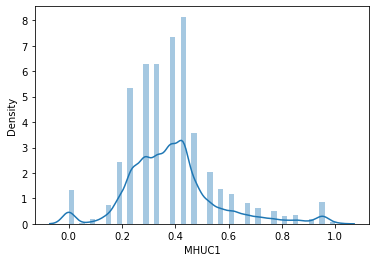

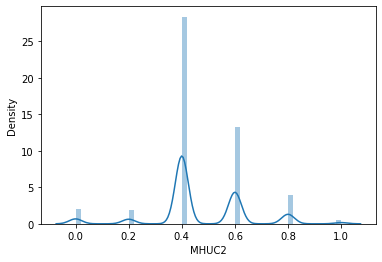

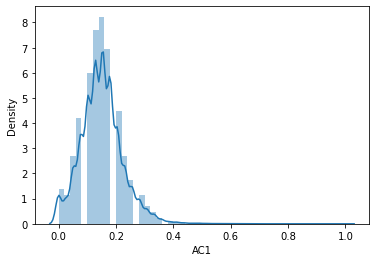

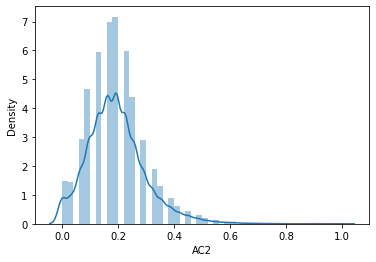

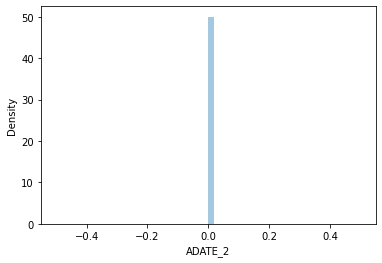

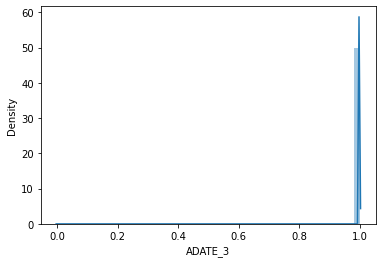

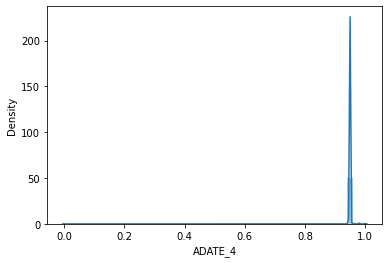

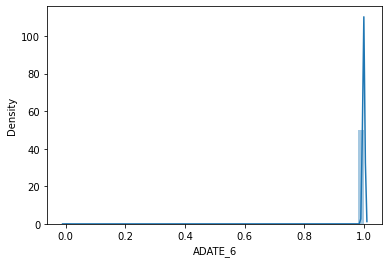

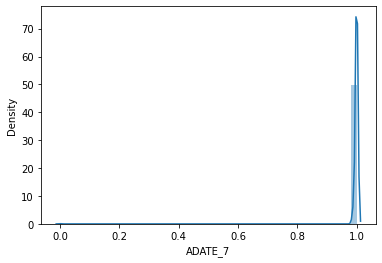

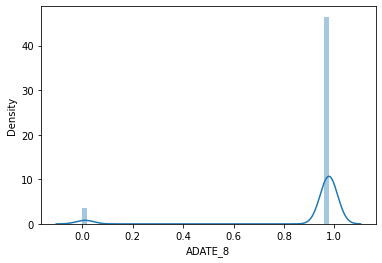

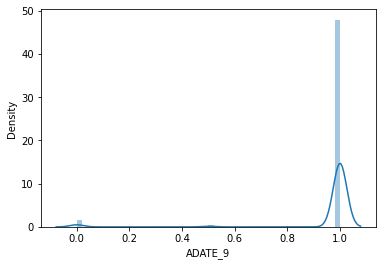

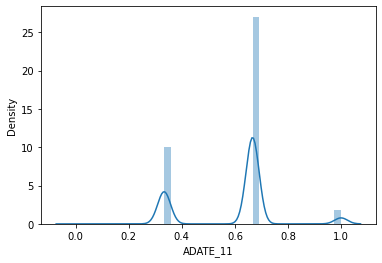

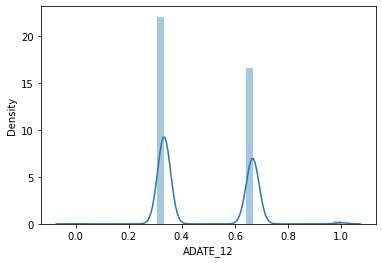

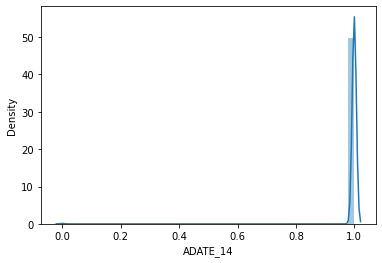

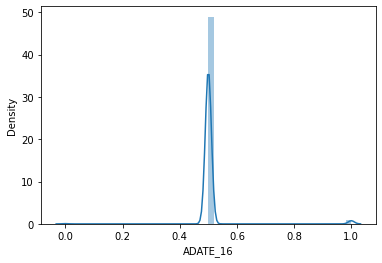

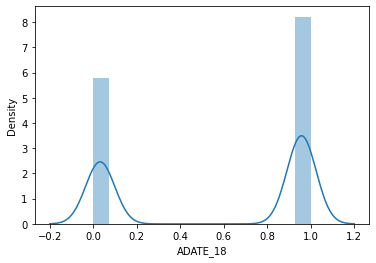

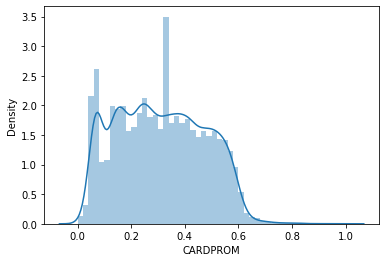

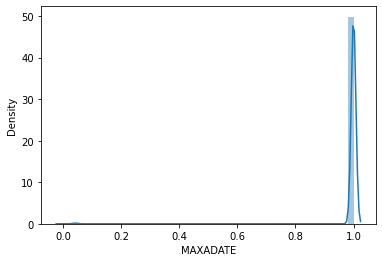

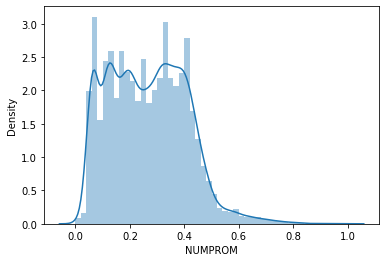

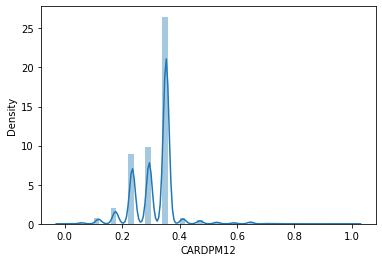

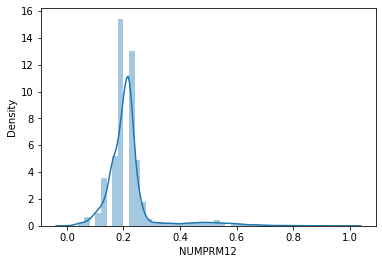

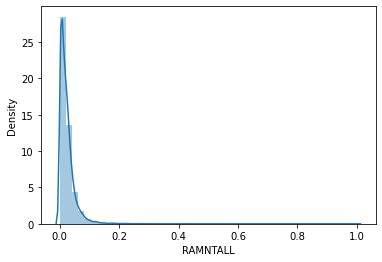

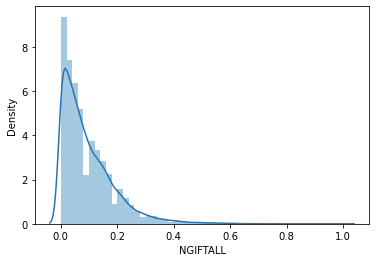

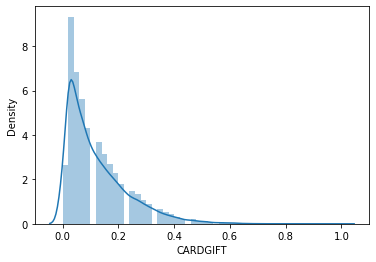

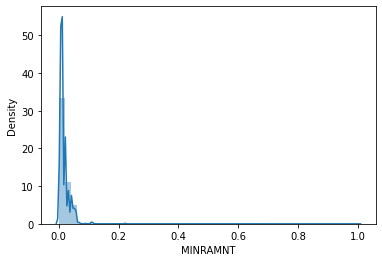

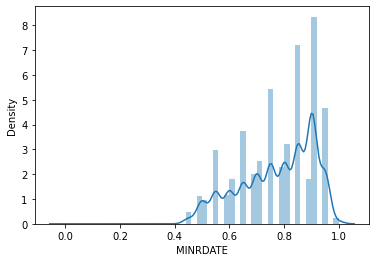

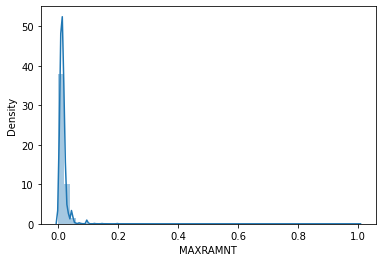

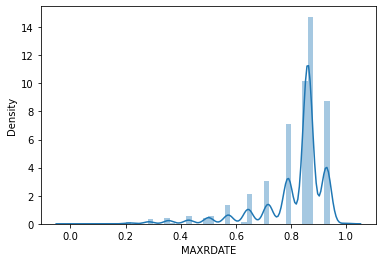

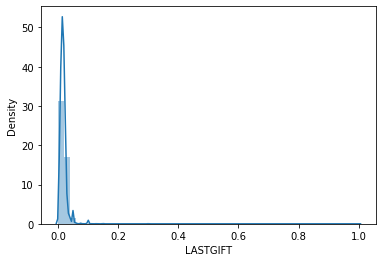

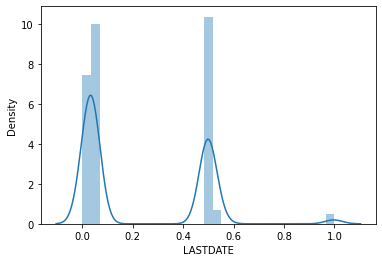

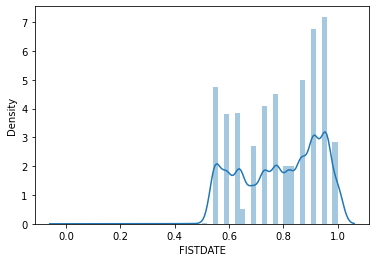

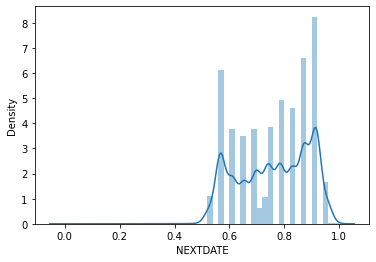

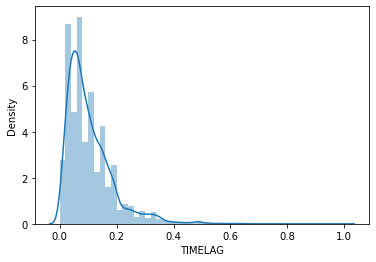

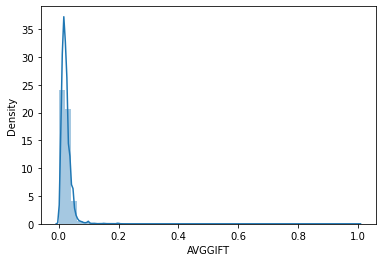

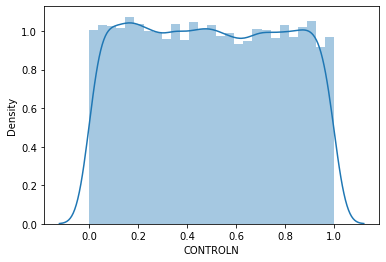

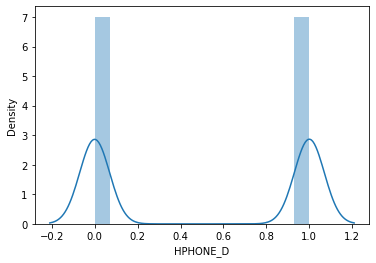

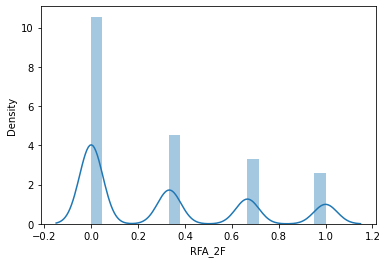

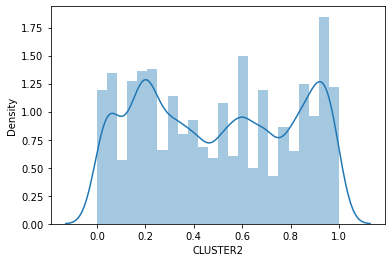

In [12]:
# normalization for test_num data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(test_num)
normalized_data = pd.DataFrame(normalized_data, columns=test_num.columns)

#plot to check 
for col in normalized_data.columns:
    sns.distplot(normalized_data[col])
    plt.show()

In [13]:
def frequent_values(df, n=3, replace_value='other'):

    for column in df.columns:
        value_counts = df[column].value_counts()
        top_n_values = value_counts.index[:n]

        # Replace values not in the top n with 'other'
        df[column] = df[column].apply(lambda x: x if x in top_n_values else replace_value)

    return df

In [14]:
train_cat = frequent_values(train_cat, n=3, replace_value='other')
test_cat = frequent_values(test_cat, n=3, replace_value='other')

In [15]:
#  I will use a function to only do one hot enconding on the features that have 3 diferent values 
def one_hot_encode(df):
  
    for column in df:
        unique_values = df[column].unique()
        
        if len(unique_values):
            df = pd.get_dummies(df, columns=[column], drop_first=False, dtype=int)
              
    return df

In [16]:
# call the function and save it as a dataframe with the same name 
train_cat = one_hot_encode(train_cat)
test_cat = one_hot_encode(test_cat)
train_cat

OSOURCE_AML  OSOURCE_MBC  OSOURCE_SYN  OSOURCE_other  STATE_CA  \
85225            0            0            0              1         0   
70004            0            0            0              1         0   
88133            0            0            0              1         0   
79106            0            0            0              1         0   
35476            0            0            0              1         0   
...            ...          ...          ...            ...       ...   
6265             0            0            0              1         1   
54886            0            0            1              0         0   
76820            0            0            0              1         0   
860              0            0            0              1         0   
15795            0            0            0              1         0   

       STATE_FL  STATE_TX  STATE_other  MAILCODE_   MAILCODE_B  ...  \
85225         0         0            1           1           0  ...   
70004         0         1            0           1           0  ...   
88133         0         0            1           1           0  ...   
79106         0         0            1           1           0  ...   
35476         0         0            1           1           0  ...   
...         ...       ...          ...         ...         ...  ...   
6265          0         0            0           1           0  ...   
54886         0         0            1           1           0  ...   
76820         0         0            1           1           0  ...   
860           0         0            1           1           0  ...   
15795         0         0            1           1           0  ...   

       MDMAUD_F_X  MDMAUD_F_other  MDMAUD_A_C  MDMAUD_A_L  MDMAUD_A_X  \
85225           1               0           0           0           1   
70004           1               0           0           0           1   
88133           1               0           0           0           1   
79106           1               0           0           0           1   
35476           1               0           0           0           1   
...           ...             ...         ...         ...         ...   
6265            1               0           0           0           1   
54886           1               0           0           0           1   
76820           1               0           0           0           1   
860             1               0           0           0           1   
15795           1               0           0           0           1   

       MDMAUD_A_other  GEOCODE2_A  GEOCODE2_B  GEOCODE2_D  GEOCODE2_other  
85225               0           1           0           0               0  
70004               0           0           0           1               0  
88133               0           0           0           1               0  
79106               0           1           0           0               0  
35476               0           0           1           0               0  
...               ...         ...         ...         ...             ...  
6265                0           1           0           0               0  
54886               0           0           1           0               0  
76820               0           0           1           0               0  
860                 0           0           0           1               0  
15795               0           1           0           0               0  

[76329 rows x 236 columns]

In [17]:
X_train = pd.concat([train_num, train_cat], axis=1)
X_train
X_test = pd.concat([test_num, test_cat], axis=1)
X_test

ODATEDW  TCODE      ZIP   DOB   AGE  INCOME  HIT  MALEMILI  MALEVET  \
84155     9601      1  83703.0  5801  40.0     6.0   11         0       28   
75272     9101      0  91723.0  2303  75.0     NaN    0         1       20   
39719     9401      0  48203.0  4601  52.0     7.0    8         0       39   
44288     9301      0  91006.0  4401  54.0     7.0    0         0       26   
35420     9101      1  85076.0  4201  56.0     5.0    2         0       52   
...        ...    ...      ...   ...   ...     ...  ...       ...      ...   
38584     9401      2  35747.0     0   NaN     NaN    0         0       33   
54025     9401      1  77029.0  3201  66.0     5.0    0         0        8   
76819     9401      0  70114.0  4701  51.0     6.0    0         4       35   
2549      9601      0      NaN  5901  39.0     4.0    1         1       29   
63732     8601      2  29127.0  3305  65.0     3.0    1         0       35   

       VIETVETS  ...  MDMAUD_F_X  MDMAUD_F_other  MDMAUD_A_C  MDMAUD_A_M  \
84155        33  ...           1               0           0           0   
75272        33  ...           1               0           0           0   
39719        19  ...           1               0           0           0   
44288        20  ...           1               0           0           0   
35420         8  ...           1               0           0           0   
...         ...  ...         ...             ...         ...         ...   
38584        30  ...           1               0           0           0   
54025         0  ...           1               0           0           0   
76819        34  ...           1               0           0           0   
2549         31  ...           1               0           0           0   
63732        19  ...           1               0           0           0   

       MDMAUD_A_X  MDMAUD_A_other  GEOCODE2_A  GEOCODE2_B  GEOCODE2_D  \
84155           1               0           0           0           0   
75272           1               0           1           0           0   
39719           1               0           1           0           0   
44288           1               0           1           0           0   
35420           1               0           1           0           0   
...           ...             ...         ...         ...         ...   
38584           1               0           0           0           0   
54025           1               0           1           0           0   
76819           1               0           0           1           0   
2549            1               0           0           1           0   
63732           1               0           0           0           1   

       GEOCODE2_other  
84155               1  
75272               0  
39719               0  
44288               0  
35420               0  
...               ...  
38584               1  
54025               0  
76819               0  
2549                0  
63732               0  

[19083 rows x 569 columns]

In [18]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

# predictions
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 

prediction = LR.predict(X_test)
prediction
print('Precision is:', precision_score(y_test, prediction))
print('Recall is:' , recall_score(y_test, prediction))
print('F1 is:' , f1_score(y_test, prediction))

print(classification_report(y_test, prediction))

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediction)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# OVERSAMPLING

In [21]:
donors['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [22]:
numerical = donors.select_dtypes(include=np.number)
numerical = numerical.dropna(axis = 1)
numerical

ODATEDW  TCODE   DOB  HIT  MALEMILI  MALEVET  VIETVETS  WWIIVETS  \
0         8901      0  3712    0         0       39        34        18   
1         9401      1  5202   16         0       15        55        11   
2         9001      1     0    2         0       20        29        33   
3         8701      0  2801    2         0       23        14        31   
4         8601      0  2001   60         1       28         9        53   
...        ...    ...   ...  ...       ...      ...       ...       ...   
95407     9601      1     0    0        14       36        47        11   
95408     9601      1  5001    1         0       31        43        19   
95409     9501      1  3801    0         0       18        46        20   
95410     8601      0  4005    0         0       28        35        20   
95411     8801      2  1801    3         1       33        22        27   

       LOCALGOV  STATEGOV  ...  MAXRDATE  LASTGIFT  LASTDATE  FISTDATE  \
0            10         2  ...      9402      10.0      9512      8911   
1             6         2  ...      9512      25.0      9512      9310   
2             6         8  ...      9207       5.0      9512      9001   
3             3         0  ...      9411      10.0      9512      8702   
4            26         3  ...      9601      15.0      9601      7903   
...         ...       ...  ...       ...       ...       ...       ...   
95407         7         8  ...      9602      25.0      9602      9602   
95408         4         1  ...      9603      20.0      9603      9603   
95409         7        23  ...      9501      10.0      9610      9410   
95410         9         1  ...      9608      18.0      9701      8612   
95411         8        10  ...      9312     100.0      9612      8803   

         AVGGIFT  CONTROLN  TARGET_B  TARGET_D  HPHONE_D  RFA_2F  
0       7.741935     95515         0       0.0         0       4  
1      15.666667    148535         0       0.0         0       2  
2       7.481481     15078         0       0.0         1       4  
3       6.812500    172556         0       0.0         1       4  
4       6.864865      7112         0       0.0         1       2  
...          ...       ...       ...       ...       ...     ...  
95407  25.000000    184568         0       0.0         0       1  
95408  20.000000    122706         0       0.0         1       1  
95409   8.285714    189641         0       0.0         1       3  
95410  12.146341      4693         1      18.0         1       4  
95411  96.794872    185114         0       0.0         1       1  

[95412 rows x 316 columns]

   # SMOTE 

In [25]:
smote = SMOTE()
X = numerical.drop("TARGET_B", axis = 1)
y = numerical["TARGET_B"]
x_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    90569
1    90569
Name: TARGET_B, dtype: int64

 # Logistic Regression

In [27]:
data_smote = pd.concat([x_sm, y_sm], axis = 1)
data_smote

ODATEDW  TCODE   DOB  HIT  MALEMILI  MALEVET  VIETVETS  WWIIVETS  \
0          8901      0  3712    0         0       39        34        18   
1          9401      1  5202   16         0       15        55        11   
2          9001      1     0    2         0       20        29        33   
3          8701      0  2801    2         0       23        14        31   
4          8601      0  2001   60         1       28         9        53   
...         ...    ...   ...  ...       ...      ...       ...       ...   
181133     8684      2  2008   10         0       20        26        30   
181134     8913      0     0    0         2       37        32        35   
181135     9425      2  5424    0         0       33        13        39   
181136     9085      0  5228    0         0       37        37        27   
181137     9207      0     0    0         1       25        24        11   

        LOCALGOV  STATEGOV  ...  MAXRDATE   LASTGIFT  LASTDATE  FISTDATE  \
0             10         2  ...      9402  10.000000      9512      8911   
1              6         2  ...      9512  25.000000      9512      9310   
2              6         8  ...      9207   5.000000      9512      9001   
3              3         0  ...      9411  10.000000      9512      8702   
4             26         3  ...      9601  15.000000      9601      7903   
...          ...       ...  ...       ...        ...       ...       ...   
181133         6         0  ...      9273   4.441451      9673      8691   
181134         5         6  ...      9468  15.005741      9511      8921   
181135         6         9  ...      9510  18.799388      9533      9407   
181136         7         2  ...      9401   8.206385      9521      9064   
181137         6         1  ...      9535  19.890332      9539      9149   

          AVGGIFT  CONTROLN   TARGET_D  HPHONE_D  RFA_2F  TARGET_B  
0        7.741935     95515   0.000000         0       4         0  
1       15.666667    148535   0.000000         0       2         0  
2        7.481481     15078   0.000000         1       4         0  
3        6.812500    172556   0.000000         1       4         0  
4        6.864865      7112   0.000000         1       2         0  
...           ...       ...        ...       ...     ...       ...  
181133   4.005513      7724   5.162177         0       4         1  
181134  10.532993    111840  16.878588         0       2         1  
181135  10.880449     82700  24.039510         0       1         1  
181136   6.710345     12269   5.257982         0       4         1  
181137  12.430138     28636  29.890332         1       1         1  

[181138 rows x 316 columns]

In [28]:
X = data_smote.drop("TARGET_B",axis = 1)
y = data_smote["TARGET_B"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62     18054
           1       0.61      0.50      0.55     18174

    accuracy                           0.59     36228
   macro avg       0.59      0.59      0.58     36228
weighted avg       0.59      0.59      0.58     36228



# Downsampling

# TOMEK

In [29]:
category_0 = numerical[numerical['TARGET_B']==0]
category_1 = numerical[numerical['TARGET_B']==1]

from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X = numerical.drop('TARGET_B', axis=1)
y = numerical['TARGET_B']

X_tl, y_tl = tl.fit_resample(X,y)
y_tl.value_counts()


0    88286
1     4843
Name: TARGET_B, dtype: int64

# Logistic Regression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18105
           1       0.00      0.00      0.00       978

    accuracy                           0.95     19083
   macro avg       0.47      0.50      0.49     19083
weighted avg       0.90      0.95      0.92     19083

